## Bank GoodCredit wants to predict cred score for current credit card customers.

## Business_Case -
* Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness 
and help the bank in reducing credit default risk.

# Domain Analysis

### Domain Analysis of Features in "Bank GoodCredit" Dataset
* The dataset appears to be related to credit risk analysis and loan performance monitoring. Below is a breakdown of the features into logical categories:

#### Customer and Account Information

* customer_no: Unique identifier for each customer.
* acct_type: Type of account (e.g., savings, credit card, loan).
* owner_indic: Indicates whether the customer is the primary owner or joint holder.
* dt_opened_x, dt_opened_y: Dates when the account was opened.
* upload_dt: Date when data was uploaded.
* entry_time: Timestamp of entry creation.
* opened_dt: Alternative account opening date.
> Purpose: Identifies customer details, account ownership, and history.

#### Payment & Transaction History

* last_paymt_dt: Date of the last payment.
* closed_dt: Date when the account was closed.
* reporting_dt: Date of reporting.
* high_credit_amt: Highest credit amount used.
* cur_balance_amt: Current balance.
* amt_past_due: Amount past due.
* actualpaymentamount: Payment amount made.
* creditlimit: Credit limit assigned.
* cashlimit: Cash withdrawal limit.
* rateofinterest: Interest rate applied to the account.
* paymentfrequency: Frequency of payments (monthly, quarterly, etc.).
* paymenthistory1, paymenthistory2: Coded representation of past payments.
> Purpose: Monitors payment behaviors, overdue amounts, and credit utilization.

#### Feature Engineering Variables (Feature_1 to Feature_79)

> These engineered features might be derived from transaction history, behavioral analytics, and financial metrics. Some possible categories:

#### Credit & Risk Indicators
* feature_1 to feature_10: Possibly related to credit utilization, account longevity, or repayment patterns.
* feature_11 to feature_20: Indicators for late payments, defaults, or delinquencies.

#### Customer Behavior & Transactional Data
* feature_21 to feature_40: May include spending patterns, account activity, and savings habits.
* feature_41 to feature_60: Could represent transaction frequency, cash withdrawals, and other financial interactions.

#### Derived Statistical Features
* feature_61 to feature_79: Likely involve computed risk scores, moving averages, or aggregated metrics based on historical data.
> Purpose: Helps in feature engineering for predictive modeling.

#### Target Variable
* Bad_label: Indicates whether the customer is classified as bad credit (1) or good credit (0).
> Purpose: This is the dependent variable used for classification models in credit risk prediction.

### Conclusion
* The dataset is structured for credit risk analysis, potentially for predicting loan defaults or assessing customer creditworthiness. The presence of engineered features suggests machine learning models are being used to classify customers into "Good Credit" or "Bad Credit."

In [1]:
# Imports the all libraries for this project in python code
import os # used for stystem version
import mysql.connector # useed for load the dataset
import pandas as pd # used for data cleaning or data analysis
import numpy as np  # used for numeical function
import matplotlib.pyplot as plt # used for data visulization
import seaborn as sns # used for data visulization
import scipy.stats as stats # Import stats module
import warnings # used for ignore the warnings
warnings.filterwarnings("ignore") # call the warnings

In [2]:
## making connections to database server
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = "dm_team1",
                                    password = "DM!$Team&279@20!")

In [3]:
## Check the number of databases available on the server
cursor = connection.cursor()
cursor.execute("show databases")
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [4]:
## connecting the database
connection = mysql.connector.connect(host = "18.136.157.135",
                                    user = "dm_team1",
                                    password = "DM!$Team&279@20!",
                                    database = "project_banking")

In [5]:
# getting all tables of bank goodcredi
db_tables = pd.read_sql_query("show tables",connection)
db_tables

Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry

In [6]:
pd.set_option("display.max_columns",None) # showing all columns

In [7]:
Customer_Account = pd.read_sql_query("select * from Cust_Account",connection) # create variable for Cust_Account
Customer_Account

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0       10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1       10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2       10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3       20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4       20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...           ...         ...        ...       ...         ...        ...   
186324  11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325  11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326  11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327  11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328  11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0          30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1          06-Sep-15               03-Oct-15           16201           10390   
2          31-Aug-15               30-Sep-15           41028           34420   
3                     26-Jul-07    31-Jan-09           93473               0   
4          05-May-15               31-May-15           20250           13500   
...              ...        ...          ...             ...             ...   
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
0                    """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1                    """0000000000000000000000000000000000000000000...   
2                    """0000000000000000000000000000000000000000000...   
3                    """1200900600600600300000000000000000000000000...   
4                                                """000000000000000"""   
...             ...                                                ...   
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                            01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                            01-Jul-07   
4                                                            01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0         01-Jul-14                                                         
1         01-Nov-12       14000      1400                               3   
2         01-Oct-12                                                         
3         01-Feb-06                 

In [8]:
Cust_Demography = pd.read_sql_query("select * from Cust_Demographics",connection) # create variable for Cust_Demographics
Cust_Demography

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
0      18-Apr-15           1  13-Apr-15         Insignia  13-Apr-15       650   
1      21-Apr-15           2  21-Apr-15         Insignia  21-Apr-15       760   
2      22-Apr-15           3  21-Apr-15         Insignia  21-Apr-15       774   
3      25-Apr-15           4  15-Apr-15         Insignia  20-Apr-15       770   
4      06-May-15           5  30-Apr-15         Insignia                        
...          ...         ...        ...              ...        ...       ...   
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0             2  Card Setup        14    500000                       
1             1  Card Setup        14   1200000                       
2             1  Card Setup        14    700000                       
3             1  Card Setup        14    500000                       
4             3  Card Setup        14    500000                       
...         ...         ...       ...       ...       ...       ...   
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                         Y        IS1                     0        159   
1                         Y        IS1                     0         91   
2                         Y        IS1                     0         91   
3                         Y        IS1                     0        157   
4                         Y        IS1                     0        100   
...          ...        ...        ...        ...        ...        ...   
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0           4284       4284                     1  ADFPNXXXXX  03-Sep-65   
1           B001       4077                     1  AJWPRXXXXX  14-Jul-62   
2           B001       4077                     2  AFAPNXXXXX  10-Apr-66   
3           5107       5107                     1  AAAPDXXXXX  16-Apr-64   
4           D016       4564                     1  ABEPSXXXXX  03-Jan-54   
...          ...        ...        ...        ...         ...        ...   
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23         feature_24 feature_25 feature_26  \
0      98332XXXXX          N    @REDIFFMAIL.COM          1          2   
1      99455XXXXX          N         @GMAIL.COM          1          2   
2      98456XXXXX          N  @SHOBANARAYAN.COM          1          0   
3      98220XXXXX          N          @VSNL.COM          1          3   
4 

In [9]:
Cust_Enquiry = pd.read_sql_query("select * from Cust_Enquiry",connection) # create variable for Cust_Enquiry
Cust_Enquiry

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0       18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1       18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2       18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3       18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4       18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000
...           ...         ...        ...        ...         ...      ...
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5   200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10    50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10    50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1   330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2   682000

[413188 rows x 6 columns]

In [10]:
# Merge the Cust_Account and Cust_Cust_Demographics tables using inner join
df = pd.merge(Customer_Account,Cust_Demography,how="inner",on="customer_no")
df

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
0        10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1        10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2        10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3        20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4        20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...            ...         ...        ...       ...         ...        ...   
186324   11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325   11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326   11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327   11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328   11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0          30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1          06-Sep-15               03-Oct-15           16201           10390   
2          31-Aug-15               30-Sep-15           41028           34420   
3                     26-Jul-07    31-Jan-09           93473               0   
4          05-May-15               31-May-15           20250           13500   
...              ...        ...          ...             ...             ...   
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
0                    """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1                    """0000000000000000000000000000000000000000000...   
2                    """0000000000000000000000000000000000000000000...   
3                    """1200900600600600300000000000000000000000000...   
4                                                """000000000000000"""   
...             ...                                                ...   
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                            01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                            01-Jul-07   
4                                                            01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0         01-Jul-14                                                         
1         01-Nov-12       14000      1400                               3   
2         01-Oct-12                                                         
3         01-Feb-06    

In [11]:
df.columns

Index(['dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt',
       ...
       'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75',
       'feature_76', 'feature_77', 'feature_78', 'feature_79', 'Bad_label'],
      dtype='object', length=103)

## Basic check

In [26]:
df.head() # showmimg the first 5 rows

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
0   10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1   10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2   10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3   20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4   20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount dt_opened_y entry_time        feature_1  feature_2  \
0                       10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
1                5603   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
2                       10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
3                       20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   
4                       20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   

  feature_3 feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0       683         3  Card Setup        14     56000                       
1       683         3  Card Setup        14     56000                       
2       683         3  Card Setup        14     56000                       
3       687         3  Card Setup        14    125000                       
4       687         3  Card Setup        14    125000                       

  feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                     Y        PM1                             SA05   
1                     Y        PM1                             SA05   
2                     Y        PM1                             SA05   
3                     Y        PD1        PD3         12       SA35   
4                     Y        PD1        PD3         12       SA35   

  feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0       MA01                                1  ASWPKXXXXX  15-Jun-84   
1       MA01                                1  ASWPKXXXXX  15-Jun-84   
2       MA01                                1  ASWPKXXXXX  15-Jun-84   
3       S001                                1  AHRPMXXXXX  20-Jun-80   
4       S001                                1  AHRPMXXXXX  20-Jun-80   

   feature_22 feature_23  feature_24 feature_25 feature_26     featur

In [27]:
df.tail() # displays last five rows

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
186324   11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325   11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326   11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327   11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328   11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
186324     21-Apr-15               30-Apr-15           24228           24228   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584               0   
186326                12-Apr-12    31-Dec-13           50844               0   
186327                07-Mar-12    15-Apr-15           35587               0   
186328                31-Dec-08    11-Jun-10           26000               0   

       amt_past_due                                    paymenthistory1  \
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
186324    01-May-12                                                         
186325    01-Aug-09                                                     3   
186326    01-Dec-10                                                     3   
186327    01-Apr-09       15000      6000                               3   
186328    01-Oct-07                                                         

       actualpaymentamount dt_opened_y entry_time        feature_1  feature_2  \
186324                       11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186325                       11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186326                       11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186327                       11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186328                       11-Jun-15  21-May-15  Titanium Deligh  21-May-15   

       feature_3 feature_4   feature_5 feature_6 feature_7 feature_8  \
186324       746         3  Card Setup        14    138000             
186325       746         3  Card Setup        14    138000             
186326       746         3  Card Setup        14    138000             
186327       746         3  Card Setup        14    138000             
186328       746         3  Card Setup        14    138000             

       feature_9 feature_10 feature_11 feature_12 feature_13 feature_14  \
186324                               Y        TD1                     0   
186325                               Y        TD1                     0   
186326                               Y        TD1                     0   
186327                               Y        TD1                     0   
186328                               Y        TD1                     0   

       feature_15 feature_16 feature_17 feature_18 feature_19  feature_20  \
186324       BBOL       H004                                1  AOSPPXXXXX   
186325       BBOL       H004                                1  AOSPPXXXXX   
186326       BBOL       H004                                1  AOSPPXXXXX   
186327       BBOL       H

In [28]:
df.columns # checking columns names

Index(['dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt',
       ...
       'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75',
       'feature_76', 'feature_77', 'feature_78', 'feature_79', 'Bad_label'],
      dtype='object', length=103)

In [33]:
for i in df.columns: #show all columns
    print(i)

dt_opened_x
customer_no
upload_dt
acct_type
owner_indic
opened_dt
last_paymt_dt
closed_dt
reporting_dt
high_credit_amt
cur_balance_amt
amt_past_due
paymenthistory1
paymenthistory2
paymt_str_dt
paymt_end_dt
creditlimit
cashlimit
rateofinterest
paymentfrequency
actualpaymentamount
dt_opened_y
entry_time
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
feature_22
feature_23
feature_24
feature_25
feature_26
feature_27
feature_28
feature_29
feature_30
feature_31
feature_32
feature_33
feature_34
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_42
feature_43
feature_44
feature_45
feature_46
feature_47
feature_48
feature_49
feature_50
feature_51
feature_52
feature_53
feature_54
feature_55
feature_56
feature_57
feature_58
feature_59
feature_60
feature_61
feature_62
feature_63
feature_64
fe

In [29]:
df.shape # shape is an attribute of the dataframe

(186329, 103)

In [30]:
df.info() # to get information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: object(103)
memory usage: 146.4+ MB


In [31]:
df.describe() # describe give statistics of numerical variables

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
count       186329      186329     186329    186329      186329     186329   
unique         197       23896         75        31           4       6246   
top      16-Nov-15        8516  21-Apr-15        10           1  13-Apr-12   
freq          4643         120       5128    100239      177287        514   

       last_paymt_dt closed_dt reporting_dt high_credit_amt cur_balance_amt  \
count         186329    186329       186329          186329          186329   
unique          4511      4840         1877           67555           56425   
top                               31-Jul-15                               0   
freq           25487    109075        12654            8875           89872   

       amt_past_due                                    paymenthistory1  \
count        186329                                             186329   
unique          630                                              18311   
top                  """0000000000000000000000000000000000000000000...   
freq         185453                                              44979   

       paymenthistory2 paymt_str_dt paymt_end_dt creditlimit cashlimit  \
count           186329       186329       186329      186329    186329   
unique           11912          234          235        1380      1456   
top                       01-Jul-15    01-Jan-15                         
freq            107824        16747         5640      137477    151047   

       rateofinterest paymentfrequency actualpaymentamount dt_opened_y  \
count          186329           186329              186329      186329   
unique           1476                3               18300         197   
top                                                          16-Nov-15   
freq           161496           122436              145276        4643   

       entry_time        feature_1 feature_2 feature_3 feature_4   feature_5  \
count      186329           186329    186329    186329    186329      186329   
unique        297                8       282       263         4           2   
top     23-Oct-15  Platinum Maxima                             3  Card Setup   
freq         1478            76014     20401     20401    114716      186196   

       feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
count     186329    186329    186329    186329     186329     186329   
unique         2       485        20        20          8          3   
top           14    150000                                         Y   
freq      186196      5985    176212    176212     185958     177801   

       feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
count      186329     186329     186329     186329     186329     186329   
unique         17         15          3        365        523        303   
top           PM1                    12       SA03       AS03              
freq        74160     108074      78255      68912       9382     176325   

       feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
count      186329     186329      186329     186329      186329     186329   
unique         13          3       10610       8463        3251          3   
top                        1  AAIPKXXXXX  01-Jan-86  98100XXXXX          N   
freq       186121     178862         173        176        1672     164440   

        feature_24 feature_25 feature_26 feature_27 feature_28 feature_29  \
count       186329     186329     186329     186329     186329     186329   
unique         722          3         12         11         63        965   
top     @GMAIL.COM          1          0   Graduate  New Delhi     110059   
freq        112409     156610     109617     110025      87577       7498   

       feature_30 feature_31 feature_32 feature_33 feature_34 feature_35  \
count      186329     186329     186329     186329     186329     186329   
unique         53         14       

In [36]:
df.describe(include='O') # describe with 'O' statistics of categorical variables

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
count       186329      186329     186329    186329      186329     186329   
unique         197       23896         75        31           4       6246   
top      16-Nov-15        8516  21-Apr-15        10           1  13-Apr-12   
freq          4643         120       5128    100239      177287        514   

       last_paymt_dt closed_dt reporting_dt high_credit_amt cur_balance_amt  \
count         186329    186329       186329          186329          186329   
unique          4511      4840         1877           67555           56425   
top                               31-Jul-15                               0   
freq           25487    109075        12654            8875           89872   

       amt_past_due                                    paymenthistory1  \
count        186329                                             186329   
unique          630                                              18311   
top                  """0000000000000000000000000000000000000000000...   
freq         185453                                              44979   

       paymenthistory2 paymt_str_dt paymt_end_dt creditlimit cashlimit  \
count           186329       186329       186329      186329    186329   
unique           11912          234          235        1380      1456   
top                       01-Jul-15    01-Jan-15                         
freq            107824        16747         5640      137477    151047   

       rateofinterest paymentfrequency actualpaymentamount dt_opened_y  \
count          186329           186329              186329      186329   
unique           1476                3               18300         197   
top                                                          16-Nov-15   
freq           161496           122436              145276        4643   

       entry_time        feature_1 feature_2 feature_3 feature_4   feature_5  \
count      186329           186329    186329    186329    186329      186329   
unique        297                8       282       263         4           2   
top     23-Oct-15  Platinum Maxima                             3  Card Setup   
freq         1478            76014     20401     20401    114716      186196   

       feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
count     186329    186329    186329    186329     186329     186329   
unique         2       485        20        20          8          3   
top           14    150000                                         Y   
freq      186196      5985    176212    176212     185958     177801   

       feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
count      186329     186329     186329     186329     186329     186329   
unique         17         15          3        365        523        303   
top           PM1                    12       SA03       AS03              
freq        74160     108074      78255      68912       9382     176325   

       feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
count      186329     186329      186329     186329      186329     186329   
unique         13          3       10610       8463        3251          3   
top                        1  AAIPKXXXXX  01-Jan-86  98100XXXXX          N   
freq       186121     178862         173        176        1672     164440   

        feature_24 feature_25 feature_26 feature_27 feature_28 feature_29  \
count       186329     186329     186329     186329     186329     186329   
unique         722          3         12         11         63        965   
top     @GMAIL.COM          1          0   Graduate  New Delhi     110059   
freq        112409     156610     109617     110025      87577       7498   

       feature_30 feature_31 feature_32 feature_33 feature_34 feature_35  \
count      186329     186329     186329     186329     186329     186329   
unique         53         14       

In [37]:
df.isnull() # checking null values

dt_opened_x  customer_no  upload_dt  acct_type  owner_indic  \
0             False        False      False      False        False   
1             False        False      False      False        False   
2             False        False      False      False        False   
3             False        False      False      False        False   
4             False        False      False      False        False   
...             ...          ...        ...        ...          ...   
186324        False        False      False      False        False   
186325        False        False      False      False        False   
186326        False        False      False      False        False   
186327        False        False      False      False        False   
186328        False        False      False      False        False   

        opened_dt  last_paymt_dt  closed_dt  reporting_dt  high_credit_amt  \
0           False          False      False         False            False   
1           False          False      False         False            False   
2           False          False      False         False            False   
3           False          False      False         False            False   
4           False          False      False         False            False   
...           ...            ...        ...           ...              ...   
186324      False          False      False         False            False   
186325      False          False      False         False            False   
186326      False          False      False         False            False   
186327      False          False      False         False            False   
186328      False          False      False         False            False   

        cur_balance_amt  amt_past_due  paymenthistory1  paymenthistory2  \
0                 False         False            False            False   
1                 False         False            False            False   
2                 False         False            False            False   
3                 False         False            False            False   
4                 False         False            False            False   
...                 ...           ...              ...              ...   
186324            False         False            False            False   
186325            False         False            False            False   
186326            False         False            False            False   
186327            False         False            False            False   
186328            False         False            False            False   

        paymt_str_dt  paymt_end_dt  creditlimit  cashlimit  rateofinterest  \
0              False         False        False      False           False   
1              False         False        False      False           False   
2              False         False        False      False           False   
3              False         False        False      False           False   
4              False         False        False      False           False   
...              ...           ...          ...        ...             ...   
186324         False         False        False      False           False   
186325         False         False        False      False           False   
186326         False         False        False      False           False   
186327         False         False        False      False           False   
186328         False         False        False      False           False   

        paymentfrequency  actualpaymentamount  dt_opened_y  entry_time  \
0                  False                False        False       False   
1                  False                False        False       False   
2                  False                False        False       False   
3                  False                False        False       False   
4         

In [38]:
for i in df:
    # Check if the column has more than 20 unique values
    if (len(df[i].unique()) > 20):
        # Print the column name and its unique values
        print(i, ':', df[i].unique())
        # Print a separator line for better readability between columns
        print('===============================================')

dt_opened_x : ['10-Nov-15' '20-Jul-15' '02-Nov-15' '16-Nov-15' '27-Aug-15' '05-May-15'
 '29-Dec-15' '18-Dec-15' '07-May-15' '06-Nov-15' '05-Nov-15' '03-Oct-15'
 '21-May-15' '28-Nov-15' '26-Oct-15' '04-Aug-15' '09-Oct-15' '30-Nov-15'
 '27-Oct-15' '30-Jun-15' '29-Sep-15' '19-Oct-15' '21-Jul-15' '14-Jul-15'
 '27-Jul-15' '04-Nov-15' '06-Jun-15' '22-Jul-15' '16-Sep-15' '15-Sep-15'
 '24-Sep-15' '28-Jul-15' '26-Nov-15' '26-Dec-15' '15-Jul-15' '14-Sep-15'
 '15-Oct-15' '30-Dec-15' '24-Dec-15' '25-Sep-15' '26-Aug-15' '10-Dec-15'
 '25-Aug-15' '25-Jul-15' '25-May-15' '21-Oct-15' '17-Dec-15' '05-Aug-15'
 '01-Oct-15' '29-Oct-15' '03-Sep-15' '13-May-15' '11-Aug-15' '07-Sep-15'
 '08-Sep-15' '03-Nov-15' '20-May-15' '28-May-15' '07-Jul-15' '02-Jun-15'
 '29-Jul-15' '07-Dec-15' '15-May-15' '06-Jul-15' '17-Jul-15' '08-Jun-15'
 '17-Oct-15' '21-Nov-15' '03-Aug-15' '26-Jun-15' '21-Dec-15' '17-Nov-15'
 '24-Nov-15' '27-May-15' '24-Apr-15' '13-Oct-15' '12-Oct-15' '23-Jun-15'
 '18-Nov-15' '22-Sep-15' '10-Sep-15' 

In [39]:
for i in df:
    # Check if the column is of type 'object' (likely categorical or string data)
    # and if it contains fewer than 20 unique values
    if (df[i].dtype == 'object') and (len(df[i].unique()) < 20):
         # Print the column name and its unique values
        print(i, ':', df[i].unique())
         # Print a separator line for better readability between columns
        print('===============================================')

owner_indic : ['1' '4' '2' '3']
paymentfrequency : ['' '3' '1']
feature_1 : ['Platinum Maxima' 'Platinum Deligh' 'Titanium Deligh' 'RBL Bank Fun+'
 'Insignia' 'Golf Card' 'Platinum Cricke' '']
feature_4 : ['3' '1' '2' '']
feature_5 : ['Card Setup' '']
feature_6 : ['14' '']
feature_10 : ['' '3.09E+11' '5.54E+15' '1.01E+15' '1.00E+15' 'C' '3.07E+11'
 '30900114539']
feature_11 : ['Y' 'N' '']
feature_12 : ['PM1' 'PD1' 'TD1' 'PM2' 'PB1' 'TD2' 'IS1' 'GO1' 'PD3' 'DD2' '' 'IS2'
 'DD1' 'PD2' 'PM4' 'PB2' 'PM3']
feature_13 : ['' 'PD3' 'TD3' 'PM2' 'PM1' 'PM3' 'PD1' 'IS2' 'TD1' 'DD3' 'PD2' 'GO1'
 'TD4' 'TD5' 'PM4']
feature_14 : ['' '12' '0']
feature_18 : ['' '180' '3665' 'q' '4539' 'MA03' '3344' '113' '3452' '91' '2219' '6380'
 'TD3']
feature_19 : ['1' '2' '']
feature_23 : ['N' 'Y' '']
feature_25 : ['1' '2' '']
feature_26 : ['0' '2' '1' '3' '4' '5' '' '7' '6' '9' '8' '10']
feature_27 : ['MBA/MMS' 'Post-Graduate' 'Graduate' 'Diploma' '' 'Doctor' 'Others'
 'Engineer' 'Professional' 'CA' 'Architect']


In [11]:
def find_columns_with_nulls(df, threshold=0.4):
    drop_column = []
    df = df.replace("", float("NaN"))  # Treat empty strings as NaN
    
    for column in df.columns:
        if df[column].isnull().mean() > threshold:  # Check if nulls > 40%
            drop_column.append(column)
    
    return drop_column

# Example usage
columns_to_drop = find_columns_with_nulls(df, 0.4)
print("Columns to drop:", columns_to_drop)

Columns to drop: ['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [12]:
print(len(columns_to_drop)) #show length 

23


In [13]:
#drop columns
data1 = df.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74'],axis=1)
data1

dt_opened_x customer_no  upload_dt acct_type owner_indic  opened_dt  \
0        10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1        10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2        10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3        20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4        20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...            ...         ...        ...       ...         ...        ...   
186324   11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325   11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326   11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327   11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328   11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt reporting_dt high_credit_amt cur_balance_amt  \
0          30-Jun-14    30-Sep-15           20900               0   
1          06-Sep-15    03-Oct-15           16201           10390   
2          31-Aug-15    30-Sep-15           41028           34420   
3                       31-Jan-09           93473               0   
4          05-May-15    31-May-15           20250           13500   
...              ...          ...             ...             ...   
186324     21-Apr-15    30-Apr-15           24228           24228   
186325     22-Jun-09    30-Apr-15           19584               0   
186326                  31-Dec-13           50844               0   
186327                  15-Apr-15           35587               0   
186328                  11-Jun-10           26000               0   

                                          paymenthistory1 paymt_str_dt  \
0       """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...    01-Sep-15   
1       """0000000000000000000000000000000000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3       """1200900600600600300000000000000000000000000...    01-Jul-07   
4                                   """000000000000000"""    01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                  """000179146119089058029000XXX"""    01-Apr-10   
186326  """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Apr-12   
186327  """000010000000000000000000000000000XXXXXXXXXX...    01-Mar-12   
186328  """000000000000000000000000000XXXXXXXXXXXXXXX0...    01-Dec-08   

       paymt_end_dt dt_opened_y entry_time        feature_1  feature_2  \
0         01-Jul-14   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
1         01-Nov-12   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
2         01-Oct-12   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15   
3         01-Feb-06   20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   
4         01-Jan-15   20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15   
...             ...         ...        ...              ...        ...   
186324    01-May-12   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186325    01-Aug-09   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186326    01-Dec-10   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186327    01-Apr-09   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   
186328    01-Oct-07   11-Jun-15  21-May-15  Titanium Deligh  21-May-15   

       feature_3 feature_4   feature_5 feature_6 feature_7 feature_11  \
0            683         3  Card Setup        14     56000          Y   
1            683         3  Card Setup        14     56000          Y   
2            683         3  Card Setup        14     56000          Y   
3            687         3  Card Setup        14    125000          Y   
4            687         3  Card Setup        14    125000          Y   
...          ...       ..

In [14]:
#getting less variations columns
def find_low_variation_columns(data1, threshold=0.3):
    low_variation_columns = []
    
    # Check each column for variation
    for column in data1:
        top_value_percentage = data1[column].value_counts(normalize=True).iloc[0]
        
        # If the top value appears more than (1 - threshold) times, consider low variation
        if top_value_percentage > (1 - threshold):
            low_variation_columns.append(column)
    
    return low_variation_columns

# Usage example:
columns_with_low_variation = find_low_variation_columns(data1)
print("Columns with low variation:", columns_with_low_variation)

Columns with low variation: ['owner_indic', 'feature_5', 'feature_6', 'feature_11', 'feature_19', 'feature_23', 'feature_25', 'feature_31', 'feature_33', 'feature_34', 'feature_42', 'feature_46', 'feature_54', 'feature_55', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_68', 'feature_70', 'feature_75', 'feature_76', 'feature_78', 'feature_79', 'Bad_label']


In [15]:
print(len(columns_with_low_variation)) #show length

26


In [16]:
# drop the columns
df = data1.drop(["paymenthistory1",'owner_indic', 'feature_5', "feature_63",'feature_6', 'feature_11', 'feature_19', 'feature_23', 'feature_25', 'feature_31', 'feature_33', 'feature_34', 'feature_42', 'feature_46', 'feature_54', 'feature_55', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_68', 'feature_70', 'feature_75', 'feature_76', 'feature_78', 'feature_79'],axis=1)
df

dt_opened_x customer_no  upload_dt acct_type  opened_dt last_paymt_dt  \
0        10-Nov-15       12265  20-Oct-15         6  09-Jun-13     30-Jun-14   
1        10-Nov-15       12265  20-Oct-15        10  25-May-12     06-Sep-15   
2        10-Nov-15       12265  20-Oct-15        10  22-Mar-12     31-Aug-15   
3        20-Jul-15       15606  09-Jul-15        10  13-Jan-06                 
4        20-Jul-15       15606  09-Jul-15         6  18-Jan-15     05-May-15   
...            ...         ...        ...       ...        ...           ...   
186324   11-Jun-15        1611  25-May-15        10  02-May-07     21-Apr-15   
186325   11-Jun-15        1611  25-May-15        10  11-Apr-07     22-Jun-09   
186326   11-Jun-15        1611  25-May-15        10  20-Nov-06                 
186327   11-Jun-15        1611  25-May-15        10  17-Oct-06                 
186328   11-Jun-15        1611  25-May-15         6  29-Nov-05                 

       reporting_dt high_credit_amt cur_balance_amt paymt_str_dt paymt_end_dt  \
0         30-Sep-15           20900               0    01-Sep-15    01-Jul-14   
1         03-Oct-15           16201           10390    01-Oct-15    01-Nov-12   
2         30-Sep-15           41028           34420    01-Sep-15    01-Oct-12   
3         31-Jan-09           93473               0    01-Jul-07    01-Feb-06   
4         31-May-15           20250           13500    01-May-15    01-Jan-15   
...             ...             ...             ...          ...          ...   
186324    30-Apr-15           24228           24228    01-Apr-15    01-May-12   
186325    30-Apr-15           19584               0    01-Apr-10    01-Aug-09   
186326    31-Dec-13           50844               0    01-Apr-12    01-Dec-10   
186327    15-Apr-15           35587               0    01-Mar-12    01-Apr-09   
186328    11-Jun-10           26000               0    01-Dec-08    01-Oct-07   

       dt_opened_y entry_time        feature_1  feature_2 feature_3 feature_4  \
0        10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   
1        10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   
2        10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   
3        20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15       687         3   
4        20-Jul-15  06-Jul-15  Platinum Deligh  06-Jul-15       687         3   
...            ...        ...              ...        ...       ...       ...   
186324   11-Jun-15  21-May-15  Titanium Deligh  21-May-15       746         3   
186325   11-Jun-15  21-May-15  Titanium Deligh  21-May-15       746         3   
186326   11-Jun-15  21-May-15  Titanium Deligh  21-May-15       746         3   
186327   11-Jun-15  21-May-15  Titanium Deligh  21-May-15       746         3   
186328   11-Jun-15  21-May-15  Titanium Deligh  21-May-15       746         3   

       feature_7 feature_12 feature_14 feature_15 feature_16  feature_20  \
0          56000        PM1                  SA05       MA01  ASWPKXXXXX   
1          56000        PM1                  SA05       MA01  ASWPKXXXXX   
2          56000        PM1                  SA05       MA01  ASWPKXXXXX   
3         125000        PD1         12       SA35       S001  AHRPMXXXXX   
4         125000        PD1         12       SA35       S001  AHRPMXXXXX   
...          ...        ...        ...        ...        ...         ...   
186324    138000        TD1          0       BBOL       H004  AOSPPXXXXX   
186325    138000        TD1          0       BBOL       H004  AOSPPXXXXX   
186326    138000        TD1          0       BBOL       H004  AOSPPXXXXX   
186327    138000        TD1          0       BBOL       H004  AOSPPXXXXX   
186328    138000        TD1          0       BBOL       H004  AOSPPXXXXX   

       feature_21  feature_22  feature_24 feature_26     feature_27  \
0       15-Jun-84  88009XXXXX  @GMAIL.COM          0        MBA/MMS   
1       15-Jun-84  88009XXXXX  @GMAIL.COM    

In [61]:
# find the all column unique values
for columns_with_low_variation in df:
    print(f"Unique values in {columns_with_low_variation}:")
    print(df[columns_with_low_variation].value_counts())
    print("\n")
    print(len(df[columns_with_low_variation].value_counts()))
    print("_______________________________________________________________________________________________________")
    print("\n")  # Adds a newline for better readability

Unique values in dt_opened_x:
dt_opened_x
16-Nov-15    4643
21-Dec-15    2395
18-Aug-15    2158
13-Oct-15    2062
26-Oct-15    2004
             ... 
22-Apr-15      36
18-Apr-15      18
24-Oct-15       8
16-Apr-15       2
21-Apr-15       2
Name: count, Length: 197, dtype: int64


197
_______________________________________________________________________________________________________


Unique values in customer_no:
customer_no
8516     120
10076    112
6391      88
8872      77
8814      76
        ... 
20548      1
21356      1
6941       1
362        1
23434      1
Name: count, Length: 23896, dtype: int64


23896
_______________________________________________________________________________________________________


Unique values in upload_dt:
upload_dt
21-Apr-15    5128
23-Oct-15    3591
16-Jul-15    3512
28-Sep-15    3507
20-Oct-15    3486
             ... 
17-Dec-15    1154
24-Dec-15     334
28-Dec-15     106
31-Dec-15      53
29-Nov-15      36
Name: count, Length: 75, dtype: i

* Here High variance column is acct_type, high_credit_amt, cur_balance_amt, feature_2, feature_3, feature_4, feature_14, feature_15, feature_24, feature_27, feature_38, feature_39, feature_52,

In [48]:
# show all columns and it's unique values and unique value numbers
for columns_with_low_variation in df:
    print(f"Unique values in {columns_with_low_variation}:")
    print(df[columns_with_low_variation].unique())
    print("\n")
    print(len(df[columns_with_low_variation].unique()))
    print("_______________________________________________________________________________________________________")
    print("\n")  # Adds a newline for better readability

Unique values in dt_opened_x:
['10-Nov-15' '20-Jul-15' '02-Nov-15' '16-Nov-15' '27-Aug-15' '05-May-15'
 '29-Dec-15' '18-Dec-15' '07-May-15' '06-Nov-15' '05-Nov-15' '03-Oct-15'
 '21-May-15' '28-Nov-15' '26-Oct-15' '04-Aug-15' '09-Oct-15' '30-Nov-15'
 '27-Oct-15' '30-Jun-15' '29-Sep-15' '19-Oct-15' '21-Jul-15' '14-Jul-15'
 '27-Jul-15' '04-Nov-15' '06-Jun-15' '22-Jul-15' '16-Sep-15' '15-Sep-15'
 '24-Sep-15' '28-Jul-15' '26-Nov-15' '26-Dec-15' '15-Jul-15' '14-Sep-15'
 '15-Oct-15' '30-Dec-15' '24-Dec-15' '25-Sep-15' '26-Aug-15' '10-Dec-15'
 '25-Aug-15' '25-Jul-15' '25-May-15' '21-Oct-15' '17-Dec-15' '05-Aug-15'
 '01-Oct-15' '29-Oct-15' '03-Sep-15' '13-May-15' '11-Aug-15' '07-Sep-15'
 '08-Sep-15' '03-Nov-15' '20-May-15' '28-May-15' '07-Jul-15' '02-Jun-15'
 '29-Jul-15' '07-Dec-15' '15-May-15' '06-Jul-15' '17-Jul-15' '08-Jun-15'
 '17-Oct-15' '21-Nov-15' '03-Aug-15' '26-Jun-15' '21-Dec-15' '17-Nov-15'
 '24-Nov-15' '27-May-15' '24-Apr-15' '13-Oct-15' '12-Oct-15' '23-Jun-15'
 '18-Nov-15' '22-Sep-

In [49]:
df.info() #showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   dt_opened_x      186329 non-null  object
 1   customer_no      186329 non-null  object
 2   upload_dt        186329 non-null  object
 3   acct_type        186329 non-null  object
 4   opened_dt        186329 non-null  object
 5   last_paymt_dt    186329 non-null  object
 6   reporting_dt     186329 non-null  object
 7   high_credit_amt  186329 non-null  object
 8   cur_balance_amt  186329 non-null  object
 9   paymt_str_dt     186329 non-null  object
 10  paymt_end_dt     186329 non-null  object
 11  dt_opened_y      186329 non-null  object
 12  entry_time       186329 non-null  object
 13  feature_1        186329 non-null  object
 14  feature_2        186329 non-null  object
 15  feature_3        186329 non-null  object
 16  feature_4        186329 non-null  object
 17  feature_7 

In [50]:
df.head(3) #showing first 5 rows of data set

dt_opened_x customer_no  upload_dt acct_type  opened_dt last_paymt_dt  \
0   10-Nov-15       12265  20-Oct-15         6  09-Jun-13     30-Jun-14   
1   10-Nov-15       12265  20-Oct-15        10  25-May-12     06-Sep-15   
2   10-Nov-15       12265  20-Oct-15        10  22-Mar-12     31-Aug-15   

  reporting_dt high_credit_amt cur_balance_amt paymt_str_dt paymt_end_dt  \
0    30-Sep-15           20900               0    01-Sep-15    01-Jul-14   
1    03-Oct-15           16201           10390    01-Oct-15    01-Nov-12   
2    30-Sep-15           41028           34420    01-Sep-15    01-Oct-12   

  dt_opened_y entry_time        feature_1  feature_2 feature_3 feature_4  \
0   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   
1   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   
2   10-Nov-15  15-Oct-15  Platinum Maxima  15-Oct-15       683         3   

  feature_7 feature_12 feature_14 feature_15 feature_16  feature_20  \
0     56000        PM1                  SA05       MA01  ASWPKXXXXX   
1     56000        PM1                  SA05       MA01  ASWPKXXXXX   
2     56000        PM1                  SA05       MA01  ASWPKXXXXX   

  feature_21  feature_22  feature_24 feature_26 feature_27 feature_28  \
0  15-Jun-84  88009XXXXX  @GMAIL.COM          0    MBA/MMS  New Delhi   
1  15-Jun-84  88009XXXXX  @GMAIL.COM          0    MBA/MMS  New Delhi   
2  15-Jun-84  88009XXXXX  @GMAIL.COM          0    MBA/MMS  New Delhi   

  feature_29 feature_30 feature_32 feature_35        feature_36 feature_37  \
0     110059       2006      Paren      35000  Private Ltd. Co.     Others   
1     110059       2006      Paren      35000  Private Ltd. Co.     Others   
2     110059       2006      Paren      35000  Private Ltd. Co.     Others   

  feature_38 feature_39 feature_40 feature_41 feature_43 feature_44  \
0     SR EXE       2009          1          4    Gurgaon     122001   
1     SR EXE       2009          1          4    Gurgaon     122001   
2     SR EXE       2009          1          4    Gurgaon     122001   

   feature_47 feature_50 feature_52 feature_56 feature_64 feature_65  \
0  ASWPKXXXXX          N          0         10         10        157   
1  ASWPKXXXXX          N          0         10         10        157   
2  ASWPKXXXXX          N          0         10         10        157   

  feature_66 feature_69 feature_71 feature_72  feature_77 Bad_label  
0     110059      35000         13          R  88009XXXXX         1  
1     110059      35000         13          R  88009XXXXX         1  
2     110059      35000         13          R  88009XXXXX         1

In [17]:
# change the null value replace is nan
def replace_empty_with_nan(data, columns):
    # Replace empty strings with NaN for the specified columns
    data[columns] = data[columns].replace("", np.nan)

# Example usage:
columns_to_check = [
    'dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'opened_dt',
    'last_paymt_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt',
    'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time',
    'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
    'feature_12', 'feature_14', 'feature_15', 'feature_16', 'feature_20',
    'feature_21', 'feature_22', 'feature_24', 'feature_26', 'feature_27',
    'feature_28', 'feature_29', 'feature_30', 'feature_32', 'feature_35',
    'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
    'feature_41', 'feature_43', 'feature_44', 'feature_47', 'feature_50',
    'feature_52', 'feature_56','feature_64', 'feature_65',
    'feature_66', 'feature_69', 'feature_71', 'feature_72', 'feature_77',
]

# Assuming 'data2' is your DataFrame
replace_empty_with_nan(df, columns_to_check)

In [18]:
#change the data type of all columns

df["dt_opened_x"] = df["dt_opened_x"].astype("datetime64[ns]")
df["customer_no"] = df["customer_no"].astype("int64")
df["upload_dt"] = df["upload_dt"].astype("datetime64[ns]")
df["acct_type"] = df["acct_type"].astype("int64")
df["opened_dt"] = df["opened_dt"].astype("datetime64[ns]")
df["last_paymt_dt"] = df["last_paymt_dt"].astype("datetime64[ns]")
df["reporting_dt"] = df["reporting_dt"].astype("datetime64[ns]")
df["high_credit_amt"] = df["high_credit_amt"].astype("float")
df["cur_balance_amt"] = df["cur_balance_amt"].astype("int64")
df["paymt_str_dt"] = df["paymt_str_dt"].astype("datetime64[ns]")
df["paymt_end_dt"] = df["paymt_end_dt"].astype("datetime64[ns]")
df["dt_opened_y"] = df["dt_opened_y"].astype("datetime64[ns]")
df["entry_time"] = df["entry_time"].astype("datetime64[ns]")
df["feature_2"] = df["feature_2"].astype("datetime64[ns]")
df["feature_3"] = df["feature_3"].astype("float")
df["feature_4"] = df["feature_4"].astype("float")
df["feature_7"] = df["feature_7"].astype("float")
df["feature_21"] = df["feature_21"].astype("datetime64[ns]")
df["feature_26"] = df["feature_26"].astype("float")
df["feature_29"] = df["feature_29"].astype("float")
df["feature_30"] = df["feature_30"].astype("float")
df["feature_35"] = df["feature_35"].astype("float")
df["feature_39"] = df["feature_39"].astype("float")
df["feature_40"] = df["feature_40"].astype("float")
df["feature_41"] = df["feature_41"].astype("float")
df["feature_44"] = df["feature_44"].astype("float")
df["feature_52"] = df["feature_52"].astype("float")
df["feature_56"] = df["feature_56"].astype("float")
df["feature_64"] = df["feature_64"].astype("float")
df["feature_65"] = df["feature_65"].astype("float")
df["feature_66"] = df["feature_66"].astype("float")
df["feature_69"] = df["feature_69"].astype("float")
df["feature_71"] = df["feature_71"].astype("float")

## EDA:- Exploratory Data Analysis
* Exploratory Data Analysis (EDA) is the process of examining and visualizing data to understand its main characteristics, uncover patterns, detect anomalies, and check assumptions. EDA helps identify relationships between variables, evaluate distributions, and prepare data for modeling.

Types of EDA:

**1. Univariate Analysis:-** Examines individual variables, often using histograms, box plots, and summary statistics. \
**2. Bivariate Analysis:-** Explores relationships between two variables, using scatter plots, correlation coefficients, or cross-tabulations. \
**3. Multivariate Analysis:-** Analyzes interactions between three or more variables, often with heatmaps, pair plots, and dimensionality reduction techniques like PCA.

## Univariate Analysis

### Categorycal Column

In [21]:
list_cat1 = []
for i in df:
    # Check if the column is of type 'object' (likely categorical or string data)
    # and if it contains fewer than 20 unique values
    if (df[i].dtype == 'object') and (len(df[i].unique()) < 20):
        # If the conditions are met, append the column name to the list
        list_cat1.append(i)

In [22]:
df2=df[list_cat1]

In [23]:
list_cat = []
for i in df:
    # Check if the column has fewer than 20 unique values
    if len(df[i].unique()) < 20:
        # If the condition is met, append the column name to the list
        list_cat.append(i)

In [24]:
list_cat # Categorical columns

['feature_1',
 'feature_4',
 'feature_12',
 'feature_14',
 'feature_26',
 'feature_27',
 'feature_32',
 'feature_36',
 'feature_37',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_50',
 'feature_56',
 'feature_71',
 'feature_72',
 'Bad_label']

In [25]:
df1=df[list_cat]

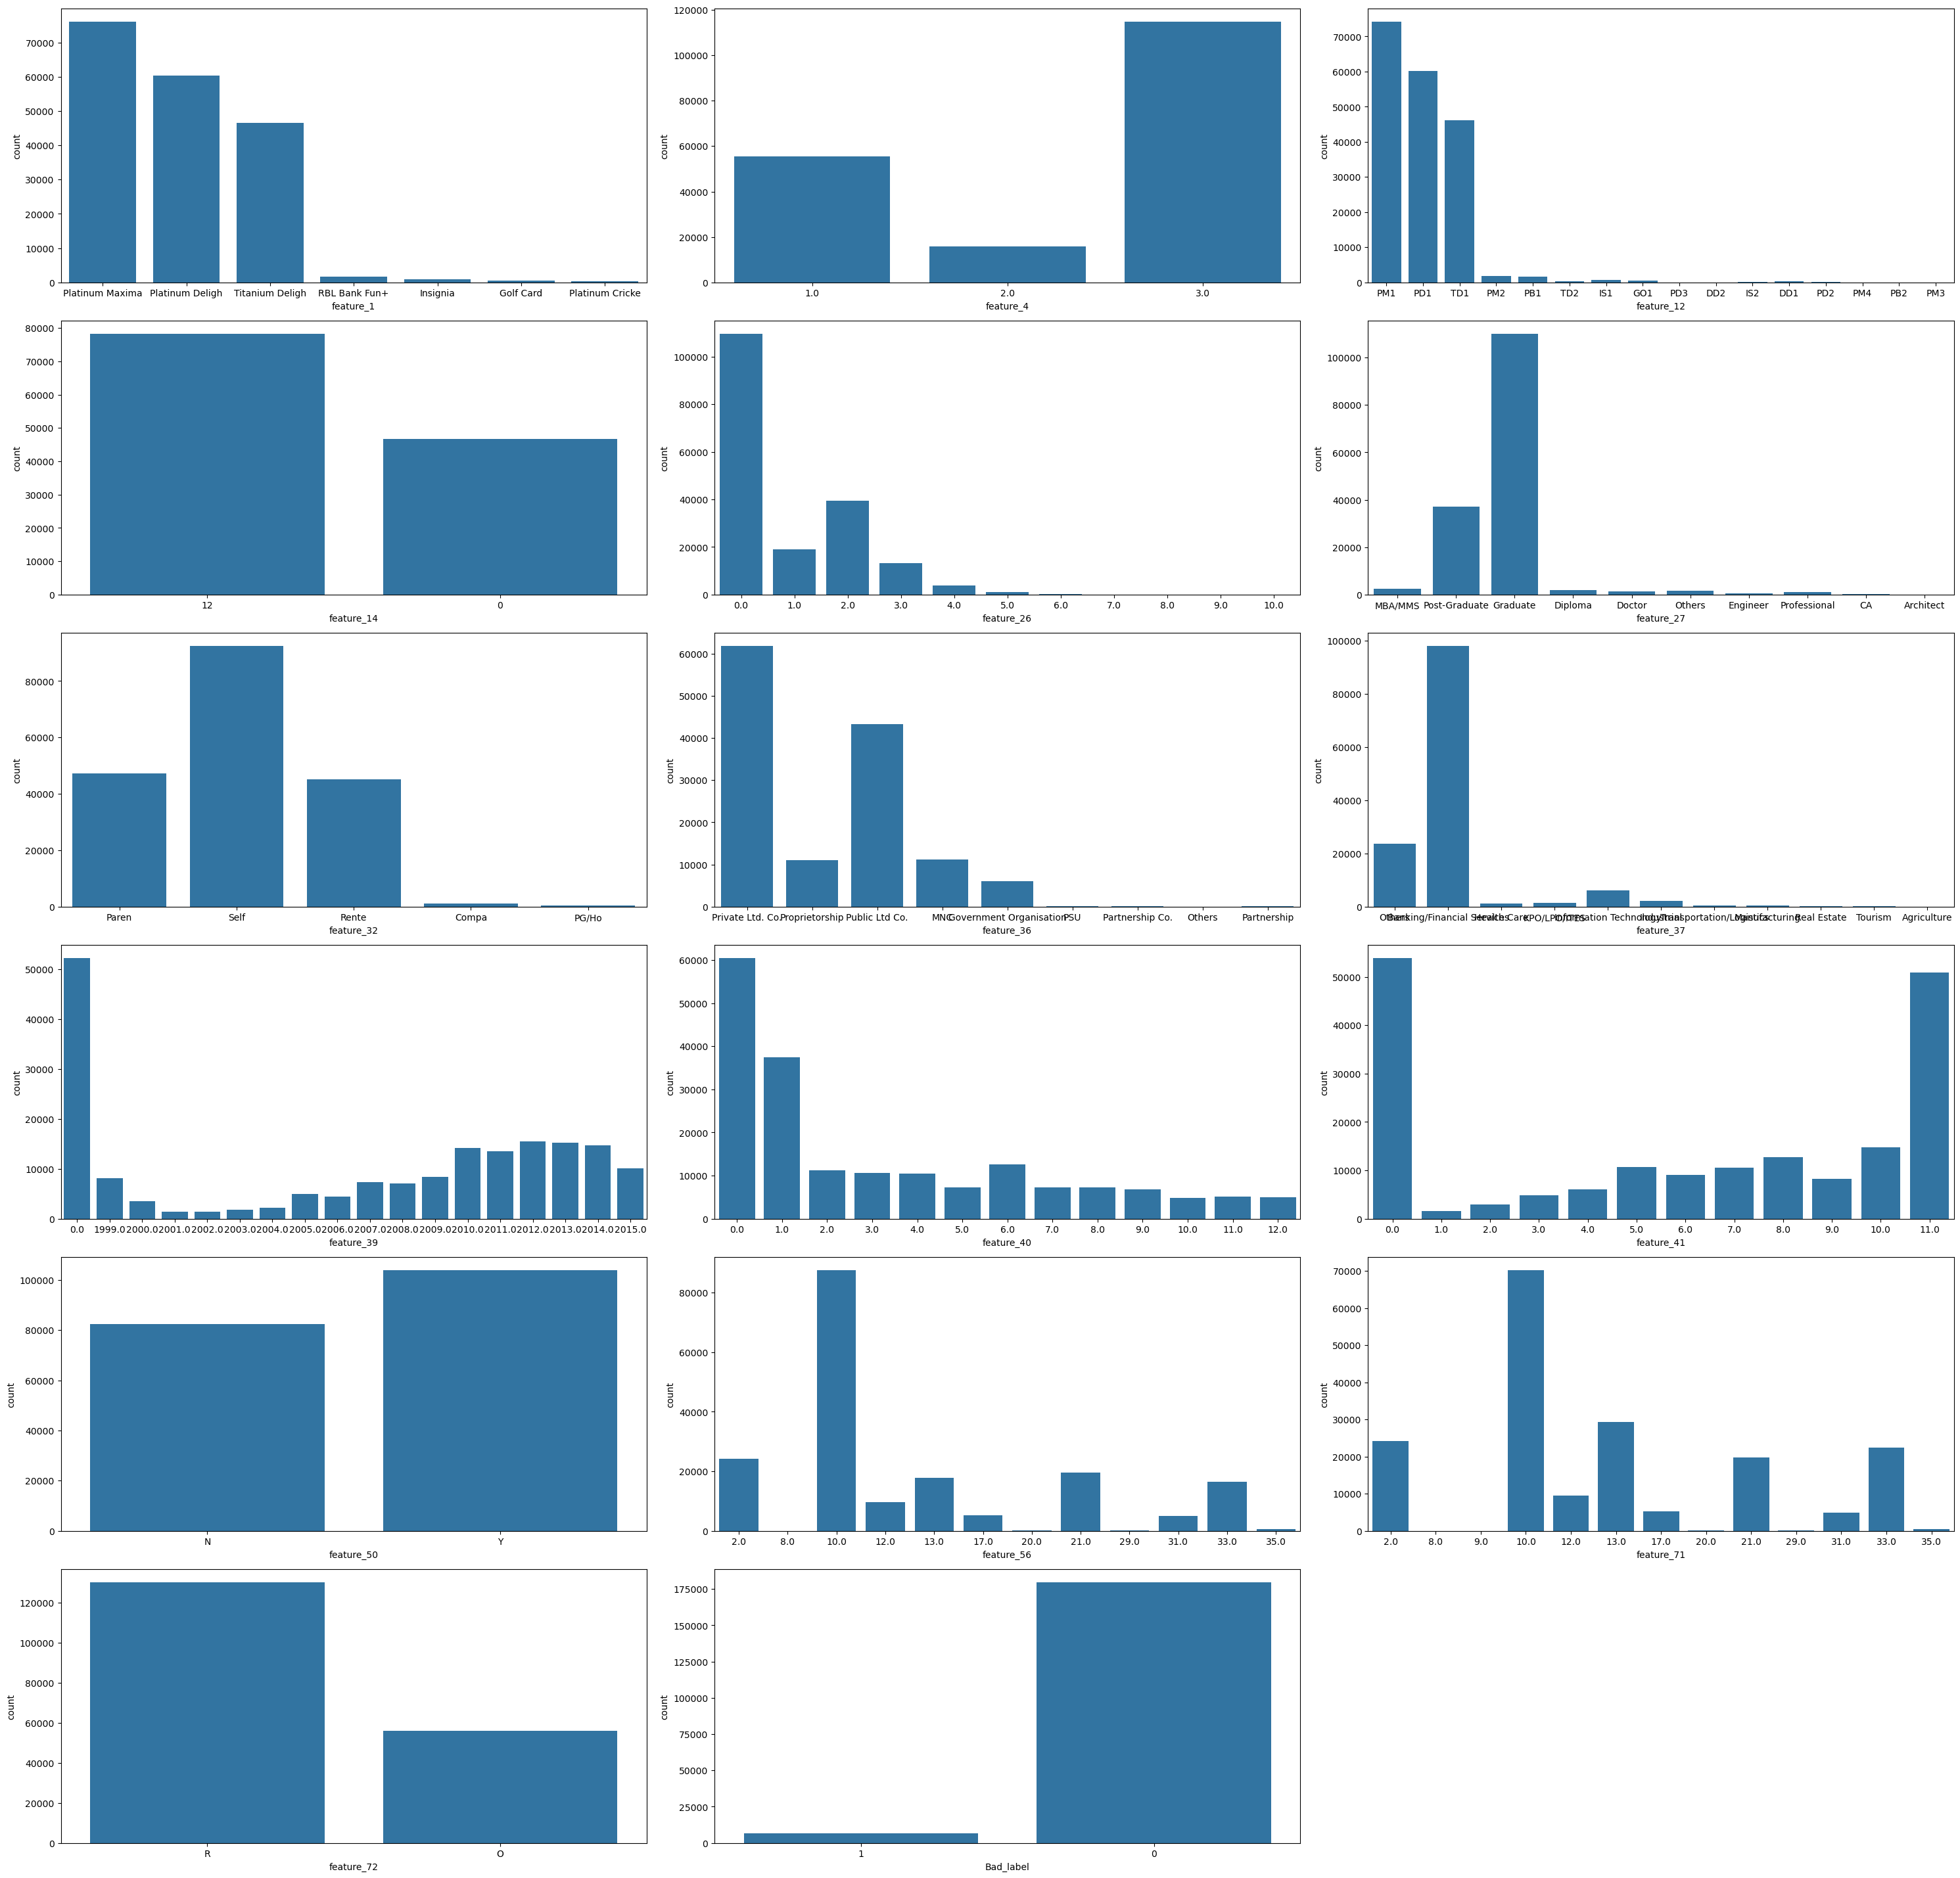

In [60]:
plt.figure(figsize=(30,90)) # Create a figure with a large size for the plots (30 inches wide and 90 inches tall)
plotnumber = 1 # Initialize a variable to track the subplot index
for i in df1:
    plt.subplot(19, 3, plotnumber) # Each subplot will show a count plot for the corresponding column
    sns.countplot(x=df1[i]) # Create a countplot for the current column in df1, visualizing the frequency of each unique value
    plotnumber = plotnumber + 1 # Increment the plot number for the next subplot
plt.tight_layout() # Adjust the layout of the plots to avoid overlap and ensure they fit within the figure

### Continues Columns

In [26]:
list_can = []
for i in df:
    # Check if the column has more than 20 unique values
    if len(df[i].unique()) > 20:
        # If the condition is met, append the column name to the list
        list_can.append(i)

In [27]:
list_can # Numerical Columns

['dt_opened_x',
 'customer_no',
 'upload_dt',
 'acct_type',
 'opened_dt',
 'last_paymt_dt',
 'reporting_dt',
 'high_credit_amt',
 'cur_balance_amt',
 'paymt_str_dt',
 'paymt_end_dt',
 'dt_opened_y',
 'entry_time',
 'feature_2',
 'feature_3',
 'feature_7',
 'feature_15',
 'feature_16',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_24',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_35',
 'feature_38',
 'feature_43',
 'feature_44',
 'feature_47',
 'feature_52',
 'feature_64',
 'feature_65',
 'feature_66',
 'feature_69',
 'feature_77']

In [28]:
df3=df[list_can]

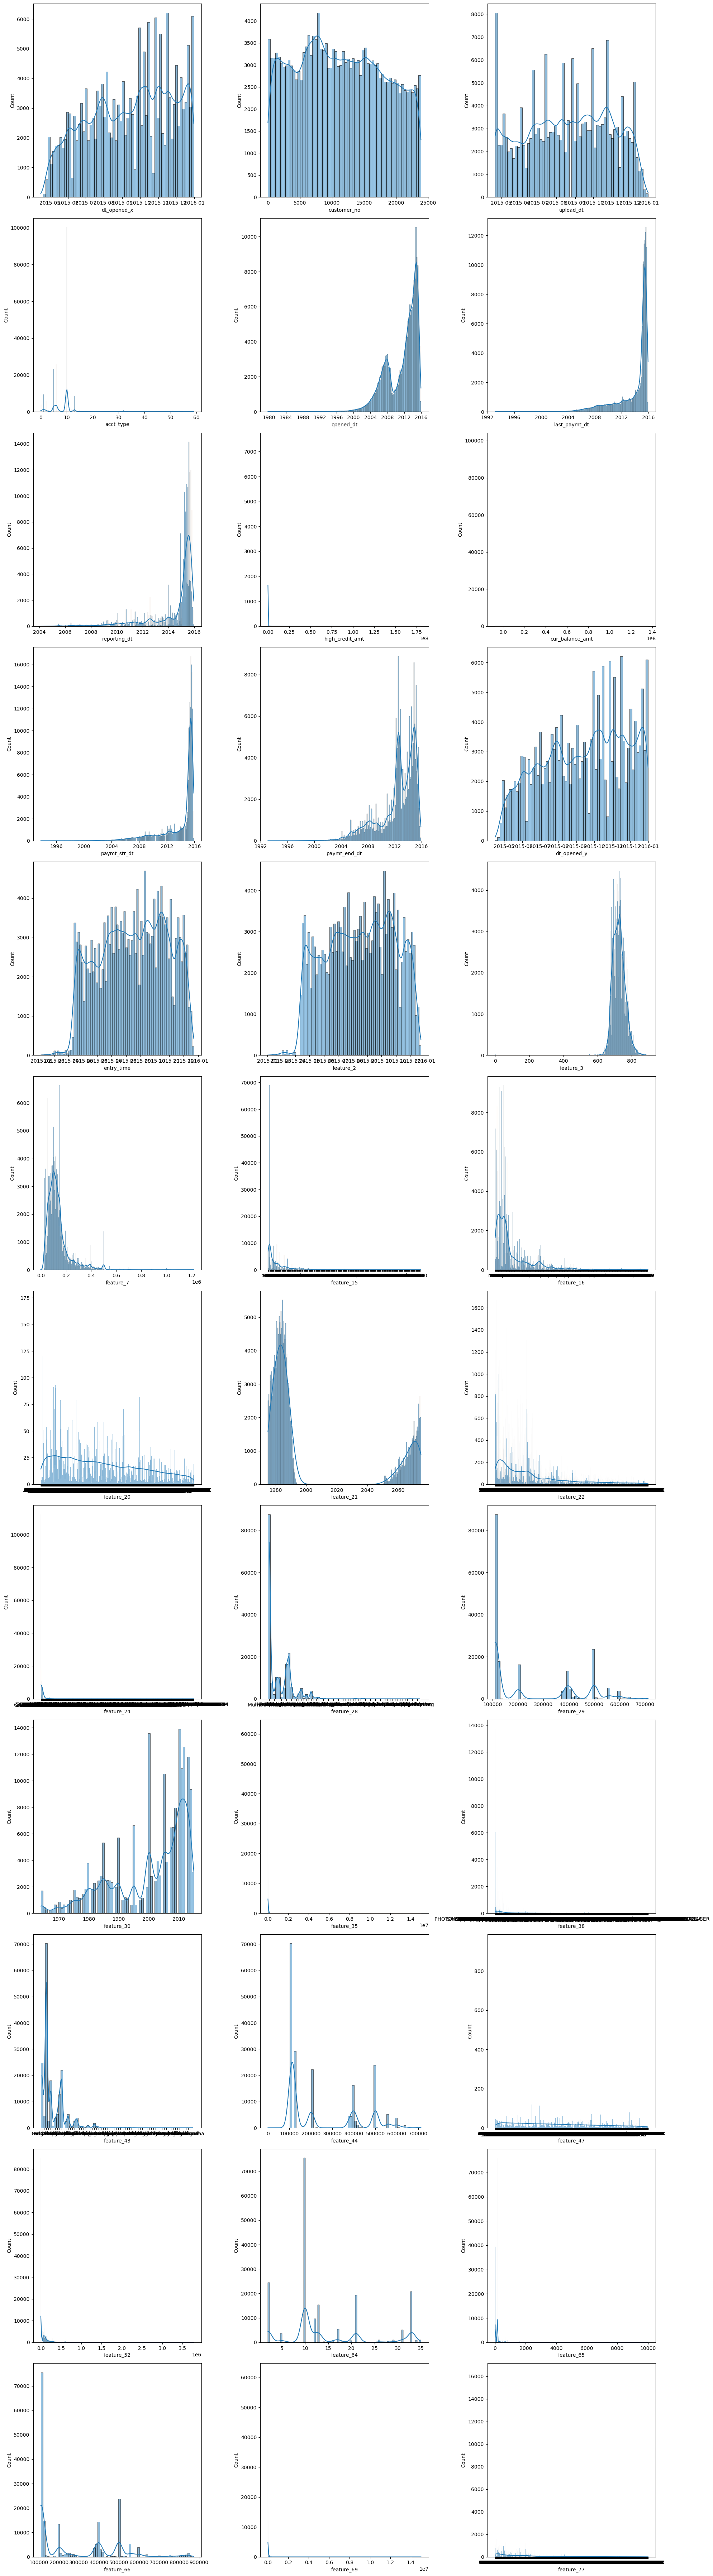

In [29]:
num_columns = len(df3.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate required rows
plt.figure(figsize=(20, rows * 6))  # Adjust figure height dynamically
plotnumber = 1
for i in df3:
    plt.subplot(rows, 3, plotnumber)  # Dynamically set the rows
    sns.histplot(df3[i], kde=True)
    plotnumber += 1
plt.tight_layout()
plt.show()

## Insights
##### Date Columns
* 'dt_opened_x', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time'
* Distribution of dates to check for trends over time.
* Identify missing values or unusual date patterns.
* Compute the time difference between relevant date pairs.

##### Numerical Columns
* 'high_credit_amt', 'cur_balance_amt'
* Summary statistics (mean, median, min, max, standard deviation).
* Detect skewness and outliers (box plots, histograms).
* Identify any unusual zero or negative values.

##### Categorical Columns
* 'acct_type'
* Frequency counts to determine dominant account types.
* Proportion of each category to check for imbalance.
* Feature Columns ('feature_X')
* These may be categorical or numerical, requiring different analysis techniques:

* If categorical:
* Frequency distribution to understand dominant categories.
* Potential encoding if needed for further analysis.
* If numerical:
* Distribution plots (histograms, KDE plots).
* Outlier detection using box plots.
* Correlation with target variables if available.

### 2. Biavrainat Analysis

### Categorycal Column

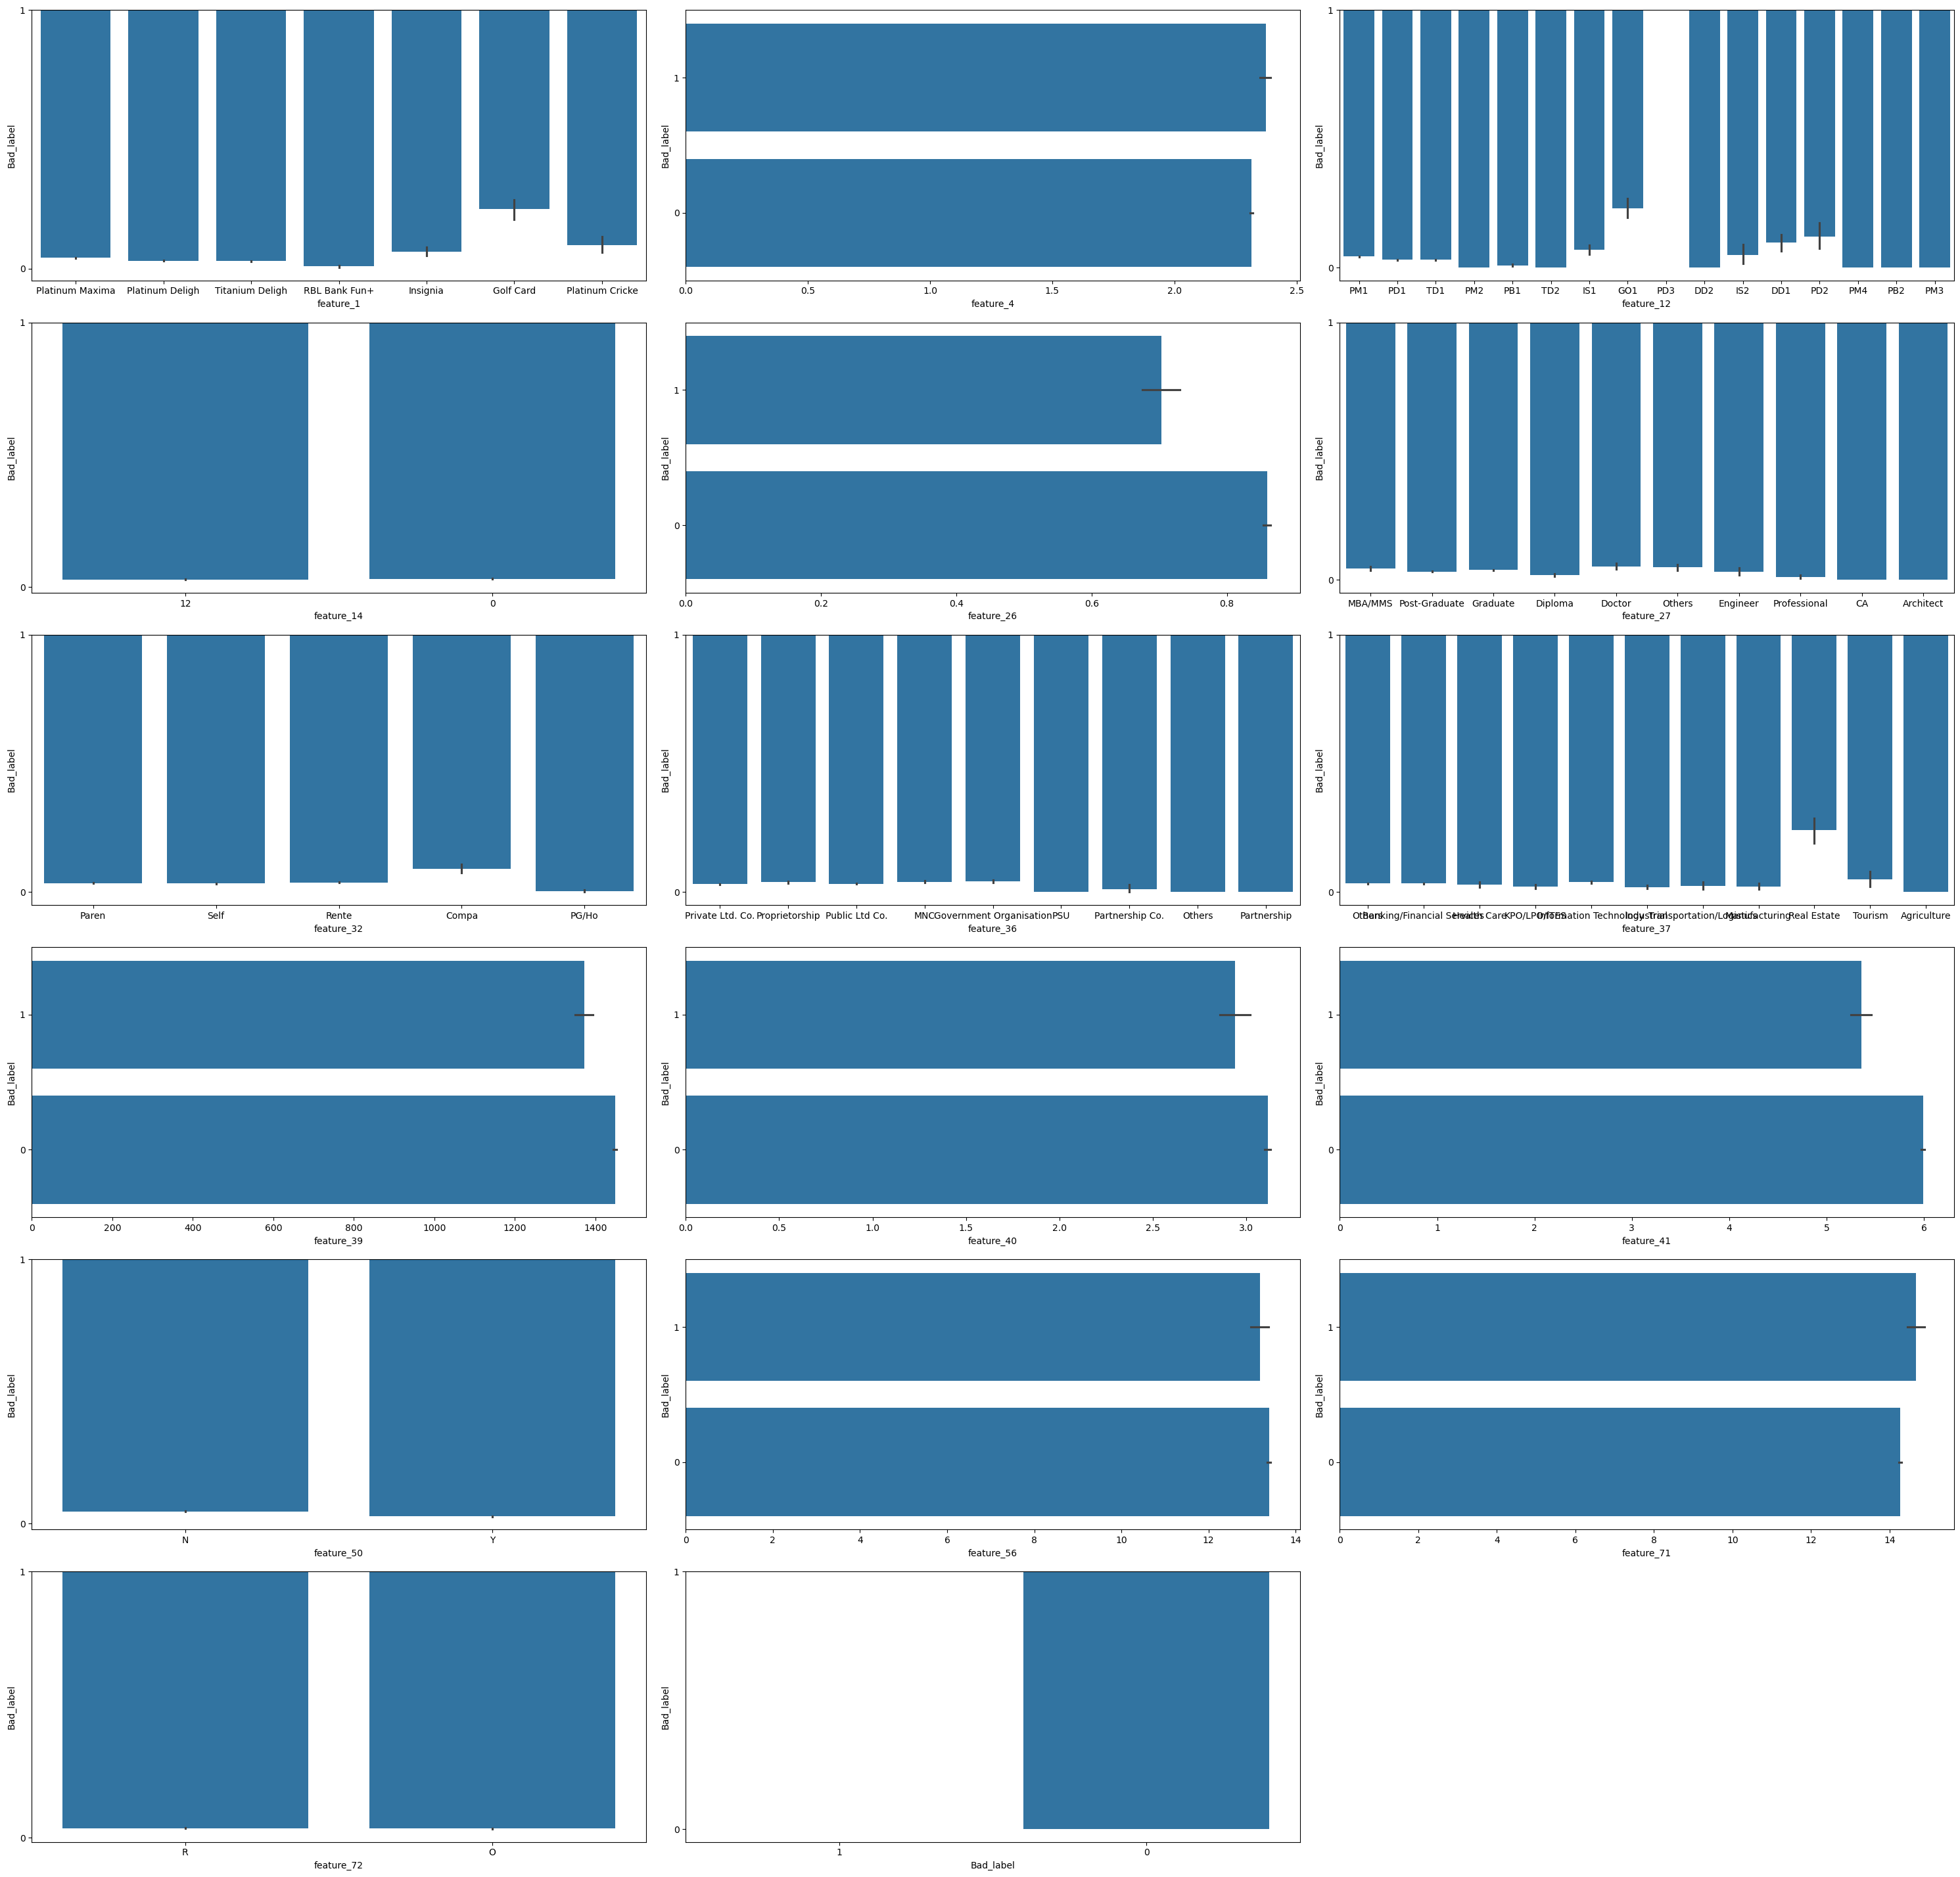

In [31]:
plt.figure(figsize=(30, 90))# Create a figure with a large size for the plots (30 inches wide and 90 inches tall)
plotnumber = 1# Initialize a variable to track the subplot index
for i in df1:
    plt.subplot(19, 3, plotnumber)# Create a subplot within a grid of 19 rows and 3 columns where Each subplot will show a barplot comparing the current column to the 'SalePrice' column
    sns.barplot(x=df1[i], y=df.Bad_label)# Create a barplot comparing the values in the current column of df1 (x-axis) with 'SalePrice' (y-axis)
    plotnumber = plotnumber + 1# Increment the plot number for the next subplot
plt.tight_layout()

# Insights

### Continues Columns

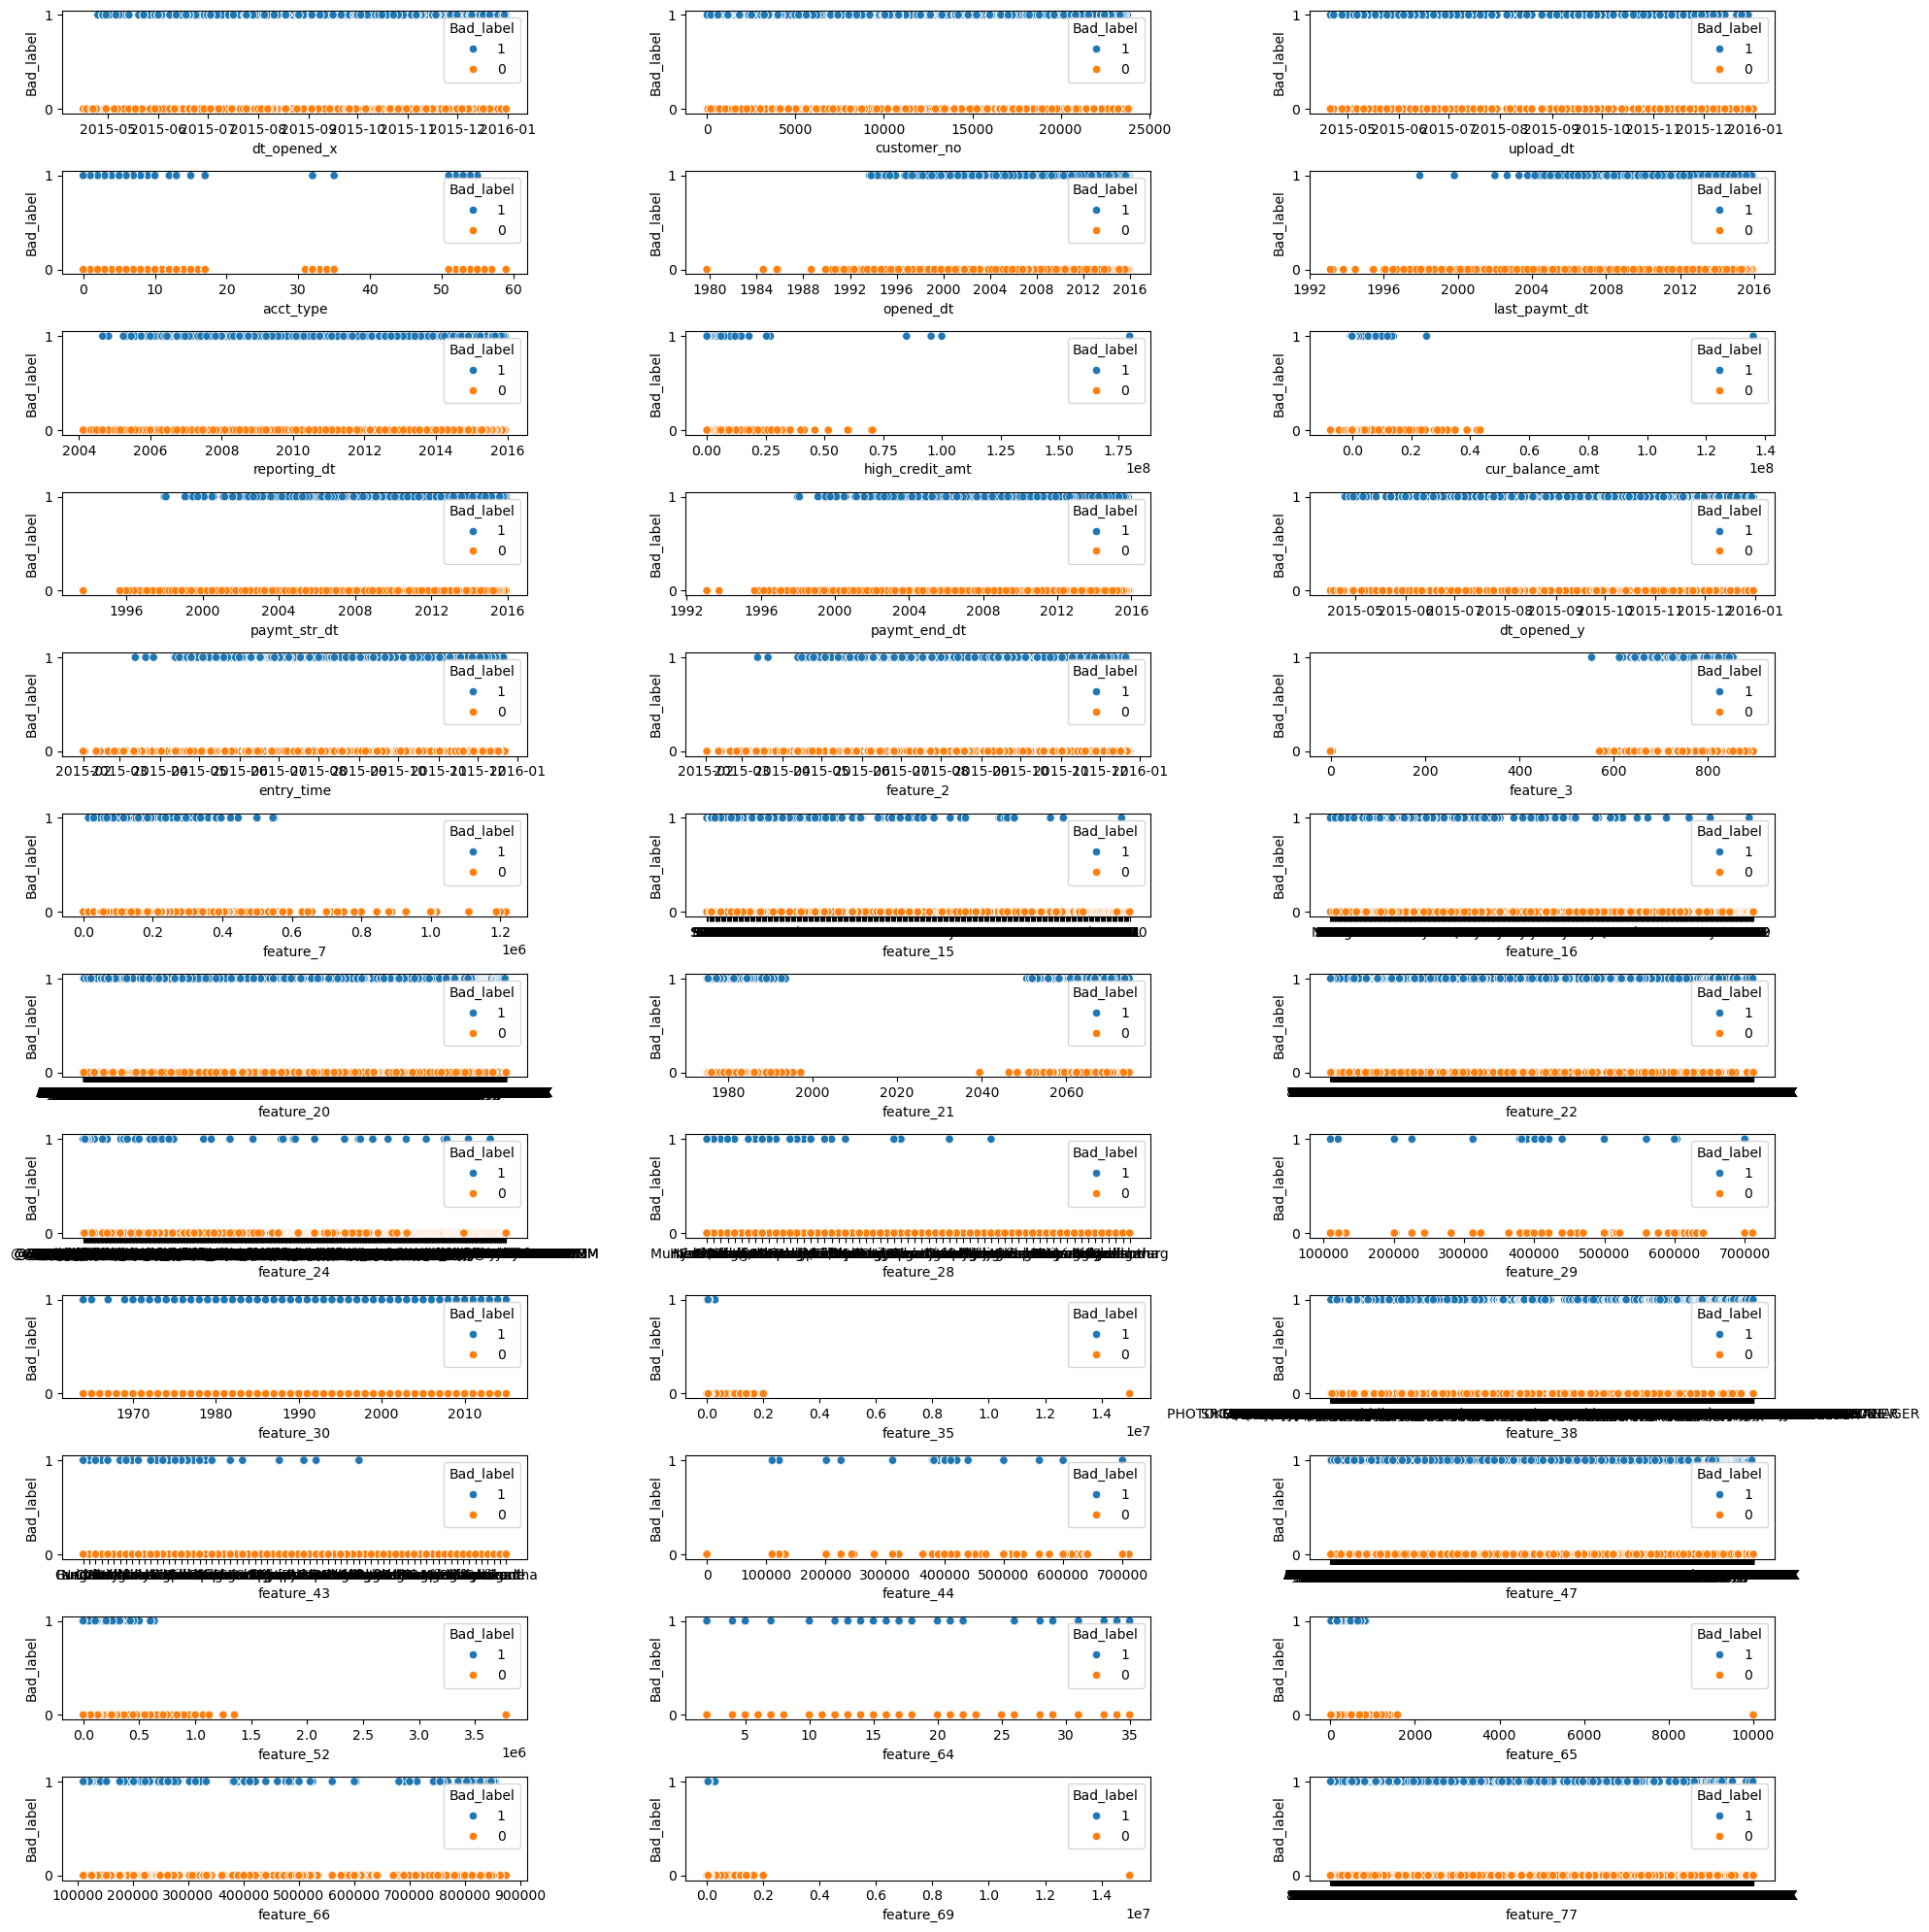

In [33]:
plt.figure(figsize=(20, 20))
rows = int(np.ceil(len(df3.columns) / 3))  # Dynamically determine rows based on df3 column count
cols = 3  # Keep 3 columns
plotnumber = 1
for i in df3.columns:
    if plotnumber > rows * cols:  # Prevent excess subplots
        break
    plt.subplot(rows, cols, plotnumber)
    sns.scatterplot(x=df3[i], y=df["Bad_label"], hue=df["Bad_label"])
    plotnumber += 1
plt.tight_layout()
plt.show()

## Insights

### Date Features vs. 'Bad_label'
##### Features:
> 'dt_opened_x', 'upload_dt', 'opened_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'entry_time'

* Accounts with older 'opened_dt' might have lower risk, while newer accounts might show higher bad rates.
* 'last_paymt_dt' closer to 'reporting_dt' could indicate good repayment behavior.
* 'paymt_end_dt' - paymt_str_dt' duration might indicate stability (short durations could correlate with higher risk).
* Checking for missing dates in bad cases can highlight non-payment patterns.
* Visuals:
> Box plots of time gaps vs. 'Bad_label' to identify trends.
> KDE plots to see the distribution of account age vs. bad accounts.

### Numerical Features vs. 'Bad_label'
##### Features:
> 'high_credit_amt', 'cur_balance_amt'

* Higher 'cur_balance_amt' might be associated with higher bad rates.
* Large gaps between 'high_credit_amt' and 'cur_balance_amt' could indicate high utilization, leading to risk.
* Correlation analysis can check if higher balances indicate a greater probability of being labeled "bad".
* Visuals:
> Box plots of 'cur_balance_amt' grouped by 'Bad_label'.
> Scatter plots of 'high_credit_amt' vs. 'cur_balance_amt' with color coding for * 'Bad_label'.
> Correlation heatmap to check direct relationships.

### Categorical Features vs. 'Bad_label'
##### Features:
> 'acct_type'

* Certain account types might have a higher percentage of bad cases.
* Checking bad rate per category helps assess risk levels.
* Visuals:
> Bar plots of 'acct_type' vs. 'Bad_label'.

### Feature Columns vs. 'Bad_label'
* Possible Feature Types:
* Categorical Features (e.g., 'feature_1', 'feature_4', 'feature_12', etc.)
* Compute bad rates per category to find risky categories.
* Chi-square tests for significance in categorical feature relationships.
* Numerical Features (e.g., 'feature_2', 'feature_3', 'feature_7', etc.)
* Compute mean/median values grouped by 'Bad_label'.
* Compare distributions of values between bad and good accounts.
* Visuals:
> Box plots & histograms for numerical features.
> Bar charts for categorical features.
> Correlation matrix with 'Bad_label' to identify key predictors.
##### Key Takeaways:
* Older accounts and recent payments may indicate lower risk.
* Higher balances & high credit utilization could correlate with bad accounts.
* Certain account types & categorical features may have higher bad rates.
* Strong feature correlation with 'Bad_label' can identify key risk drivers.

## Feature Engineering
* Feature engineering is the process of transforming raw data into meaningful features that improve a machine learning model's performance. It involves creating new input variables or modifying existing ones to capture the patterns in data better and make the model more accurate and robust.

### Data Preprocessing

* Data preprocessing prepares raw data for modeling by cleaning inaccuracies, handling missing values, and encoding categorical features. It also involves scaling numerical data and selecting relevant features. This process ensures data quality, enhancing model accuracy and performance.

*  **Data Cleaning:-** Removing or fixing inaccuracies like duplicates, inconsistencies, or irrelevant data.

*  **Handling Missing Values:-** Filling missing data with mean, median, mode, or a special value, or dropping rows/columns with missing values if appropriate.

*  **Encoding Categorical Variables:-** Converting categorical data (like "gender" or "region") into numerical formats, such as one-hot or label encoding.

*  **Scaling and Normalization:-** Adjusting numerical features to a similar scale (e.g., between 0 and 1) to improve model performance, especially for algorithms sensitive to feature scales.

*  **Feature Selection and Extraction:-** Identifying and keeping only the most relevant features, and sometimes creating new features that capture underlying patterns.

In [42]:
df.isnull().sum() # show null values

dt_opened_x            0
customer_no            0
upload_dt              0
acct_type              0
opened_dt              0
last_paymt_dt          0
reporting_dt           0
high_credit_amt        0
cur_balance_amt        0
paymt_str_dt           0
paymt_end_dt           0
dt_opened_y            0
entry_time             0
feature_1            133
feature_2              0
feature_3              0
feature_4              0
feature_7              0
feature_12           133
feature_14         61388
feature_15           212
feature_16           259
feature_20             0
feature_21             0
feature_22             0
feature_24          5524
feature_26             0
feature_27         30236
feature_28           133
feature_29             0
feature_30             0
feature_32           133
feature_35             0
feature_36         52349
feature_37         52349
feature_38         52349
feature_39             0
feature_40             0
feature_41             0
feature_43           133


In [19]:
df.loc[df["feature_1"].isnull(),"feature_1"] = "Platinum Maxima" # replace null value

In [20]:
df.loc[df["feature_12"].isnull(),"feature_12"] = "PM1" # replace null value

In [21]:
df.loc[df["feature_14"].isnull(),"feature_14"] = 12.0 # replace null value

In [22]:
df.loc[df["feature_15"].isnull(),"feature_15"] = "SA03" # replace null value

In [23]:
df.loc[df["feature_16"].isnull(),"feature_16"] = "AS03" # replace null value

In [24]:
df.loc[df["feature_24"].isnull(),"feature_24"] = "@GMAIL.COM" # replace null value

In [25]:
df.loc[df["feature_27"].isnull(),"feature_27"] = "Graduate" # replace null value

In [26]:
df.loc[df["feature_28"].isnull(),"feature_28"] = "New Delhi" # replace null value

In [27]:
df.loc[df["feature_32"].isnull(),"feature_32"] = "Self" # replace null value

In [28]:
df.loc[df["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co." # replace null value

In [29]:
df.loc[df["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services" # replace null value

In [30]:
df.loc[df["feature_38"].isnull(),"feature_38"] = "MANAGER" # replace null value

In [31]:
df.loc[df["feature_43"].isnull(),"feature_43"] = "New Delhi" # replace null value

In [32]:
df.loc[df["feature_50"].isnull(),"feature_50"] = "Y" # replace null value

In [33]:
df.loc[df["feature_72"].isnull(),"feature_72"] = "R" # replace null value

In [60]:
df.isnull().sum() # show null values

dt_opened_x        0
customer_no        0
upload_dt          0
acct_type          0
opened_dt          0
last_paymt_dt      0
reporting_dt       0
high_credit_amt    0
cur_balance_amt    0
paymt_str_dt       0
paymt_end_dt       0
dt_opened_y        0
entry_time         0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_20         0
feature_21         0
feature_22         0
feature_24         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_39         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_47         0
feature_50         0
feature_52         0
feature_56         0
feature_64         0
feature_65         0
feature_66   

In [61]:
df.info() #showing information about all columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   dt_opened_x      186329 non-null  datetime64[ns]
 1   customer_no      186329 non-null  int64         
 2   upload_dt        186329 non-null  datetime64[ns]
 3   acct_type        186329 non-null  int64         
 4   opened_dt        186329 non-null  datetime64[ns]
 5   last_paymt_dt    186329 non-null  datetime64[ns]
 6   reporting_dt     186329 non-null  datetime64[ns]
 7   high_credit_amt  186329 non-null  float64       
 8   cur_balance_amt  186329 non-null  int64         
 9   paymt_str_dt     186329 non-null  datetime64[ns]
 10  paymt_end_dt     186329 non-null  datetime64[ns]
 11  dt_opened_y      186329 non-null  datetime64[ns]
 12  entry_time       186329 non-null  datetime64[ns]
 13  feature_1        186329 non-null  object        
 14  feature_2        186

In [34]:
# Select continuous columns (both float and int)
continuous_columns = df.select_dtypes(include=["float64", "int64"])
continuous_columns

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_3  \
0             12265          6          20900.0                0      683.0   
1             12265         10          16201.0            10390      683.0   
2             12265         10          41028.0            34420      683.0   
3             15606         10          93473.0                0      687.0   
4             15606          6          20250.0            13500      687.0   
...             ...        ...              ...              ...        ...   
186324         1611         10          24228.0            24228      746.0   
186325         1611         10          19584.0                0      746.0   
186326         1611         10          50844.0                0      746.0   
186327         1611         10          35587.0                0      746.0   
186328         1611          6          26000.0                0      746.0   

        feature_4  feature_7  feature_26  feature_29  feature_30  feature_35  \
0             3.0    56000.0         0.0    110059.0      2006.0     35000.0   
1             3.0    56000.0         0.0    110059.0      2006.0     35000.0   
2             3.0    56000.0         0.0    110059.0      2006.0     35000.0   
3             3.0   125000.0         2.0    121003.0      2009.0    100000.0   
4             3.0   125000.0         2.0    121003.0      2009.0    100000.0   
...           ...        ...         ...         ...         ...         ...   
186324        3.0   138000.0         3.0    500017.0      1995.0     45800.0   
186325        3.0   138000.0         3.0    500017.0      1995.0     45800.0   
186326        3.0   138000.0         3.0    500017.0      1995.0     45800.0   
186327        3.0   138000.0         3.0    500017.0      1995.0     45800.0   
186328        3.0   138000.0         3.0    500017.0      1995.0     45800.0   

        feature_39  feature_40  feature_41  feature_44  feature_52  \
0           2009.0         1.0         4.0    122001.0         0.0   
1           2009.0         1.0         4.0    122001.0         0.0   
2           2009.0         1.0         4.0    122001.0         0.0   
3           2013.0         1.0         2.0    121003.0         0.0   
4           2013.0         1.0         2.0    121003.0         0.0   
...            ...         ...         ...         ...         ...   
186324      1999.0         0.0        11.0    500003.0         0.0   
186325      1999.0         0.0        11.0    500003.0         0.0   
186326      1999.0         0.0        11.0    500003.0         0.0   
186327      1999.0         0.0        11.0    500003.0         0.0   
186328      1999.0         0.0        11.0    500003.0         0.0   

        feature_56  feature_64  feature_65  feature_66  feature_69  feature_71  
0             10.0        10.0       157.0    110059.0     35000.0        13.0  
1             10.0        10.0       157.0    110059.0     35000.0        13.0  
2             10.0        10.0       157.0    110059.0     35000.0        13.0  
3             13.0        13.0        39.0    121003.0    100000.0        13.0  
4             13.0        13.0        39.0    121003.0    100000.0        13.0  
...            ...         ...         ...         ...         ...         ...  
186324         2.0         2.0        14.0    500017.0     45800.0         2.0  
186325         2.0         2.0        14.0    500017.0     45800.0         2.0  
186326         2.0         2.0        14.0    500017.0     45800.0         2.0  
186327         2.0         2.0        14.0    500017.0     45800.0         2.0  
186328         2.0         2.0        14.0    500017.0     45800.0         2.0  

[186329 rows x 22 columns]

In [63]:
continuous_columns.info() #showing information about continuous_columns of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      186329 non-null  int64  
 1   acct_type        186329 non-null  int64  
 2   high_credit_amt  186329 non-null  float64
 3   cur_balance_amt  186329 non-null  int64  
 4   feature_3        186329 non-null  float64
 5   feature_4        186329 non-null  float64
 6   feature_7        186329 non-null  float64
 7   feature_26       186329 non-null  float64
 8   feature_29       186329 non-null  float64
 9   feature_30       186329 non-null  float64
 10  feature_35       186329 non-null  float64
 11  feature_39       186329 non-null  float64
 12  feature_40       186329 non-null  float64
 13  feature_41       186329 non-null  float64
 14  feature_44       186329 non-null  float64
 15  feature_52       186329 non-null  float64
 16  feature_56       186329 non-null  floa

In [64]:
for columns in continuous_columns: # show columns
    print(columns)

customer_no
acct_type
high_credit_amt
cur_balance_amt
feature_3
feature_4
feature_7
feature_26
feature_29
feature_30
feature_35
feature_39
feature_40
feature_41
feature_44
feature_52
feature_56
feature_64
feature_65
feature_66
feature_69
feature_71


#### Ouliers Handling
* Outliers are data points that significantly differ from the majority of the data, often lying far from the mean or median. They can result from measurement errors, variability in the data, or rare events. Outliers can skew statistical analyses and model performance, so they’re typically identified and either removed or treated to improve data reliability.

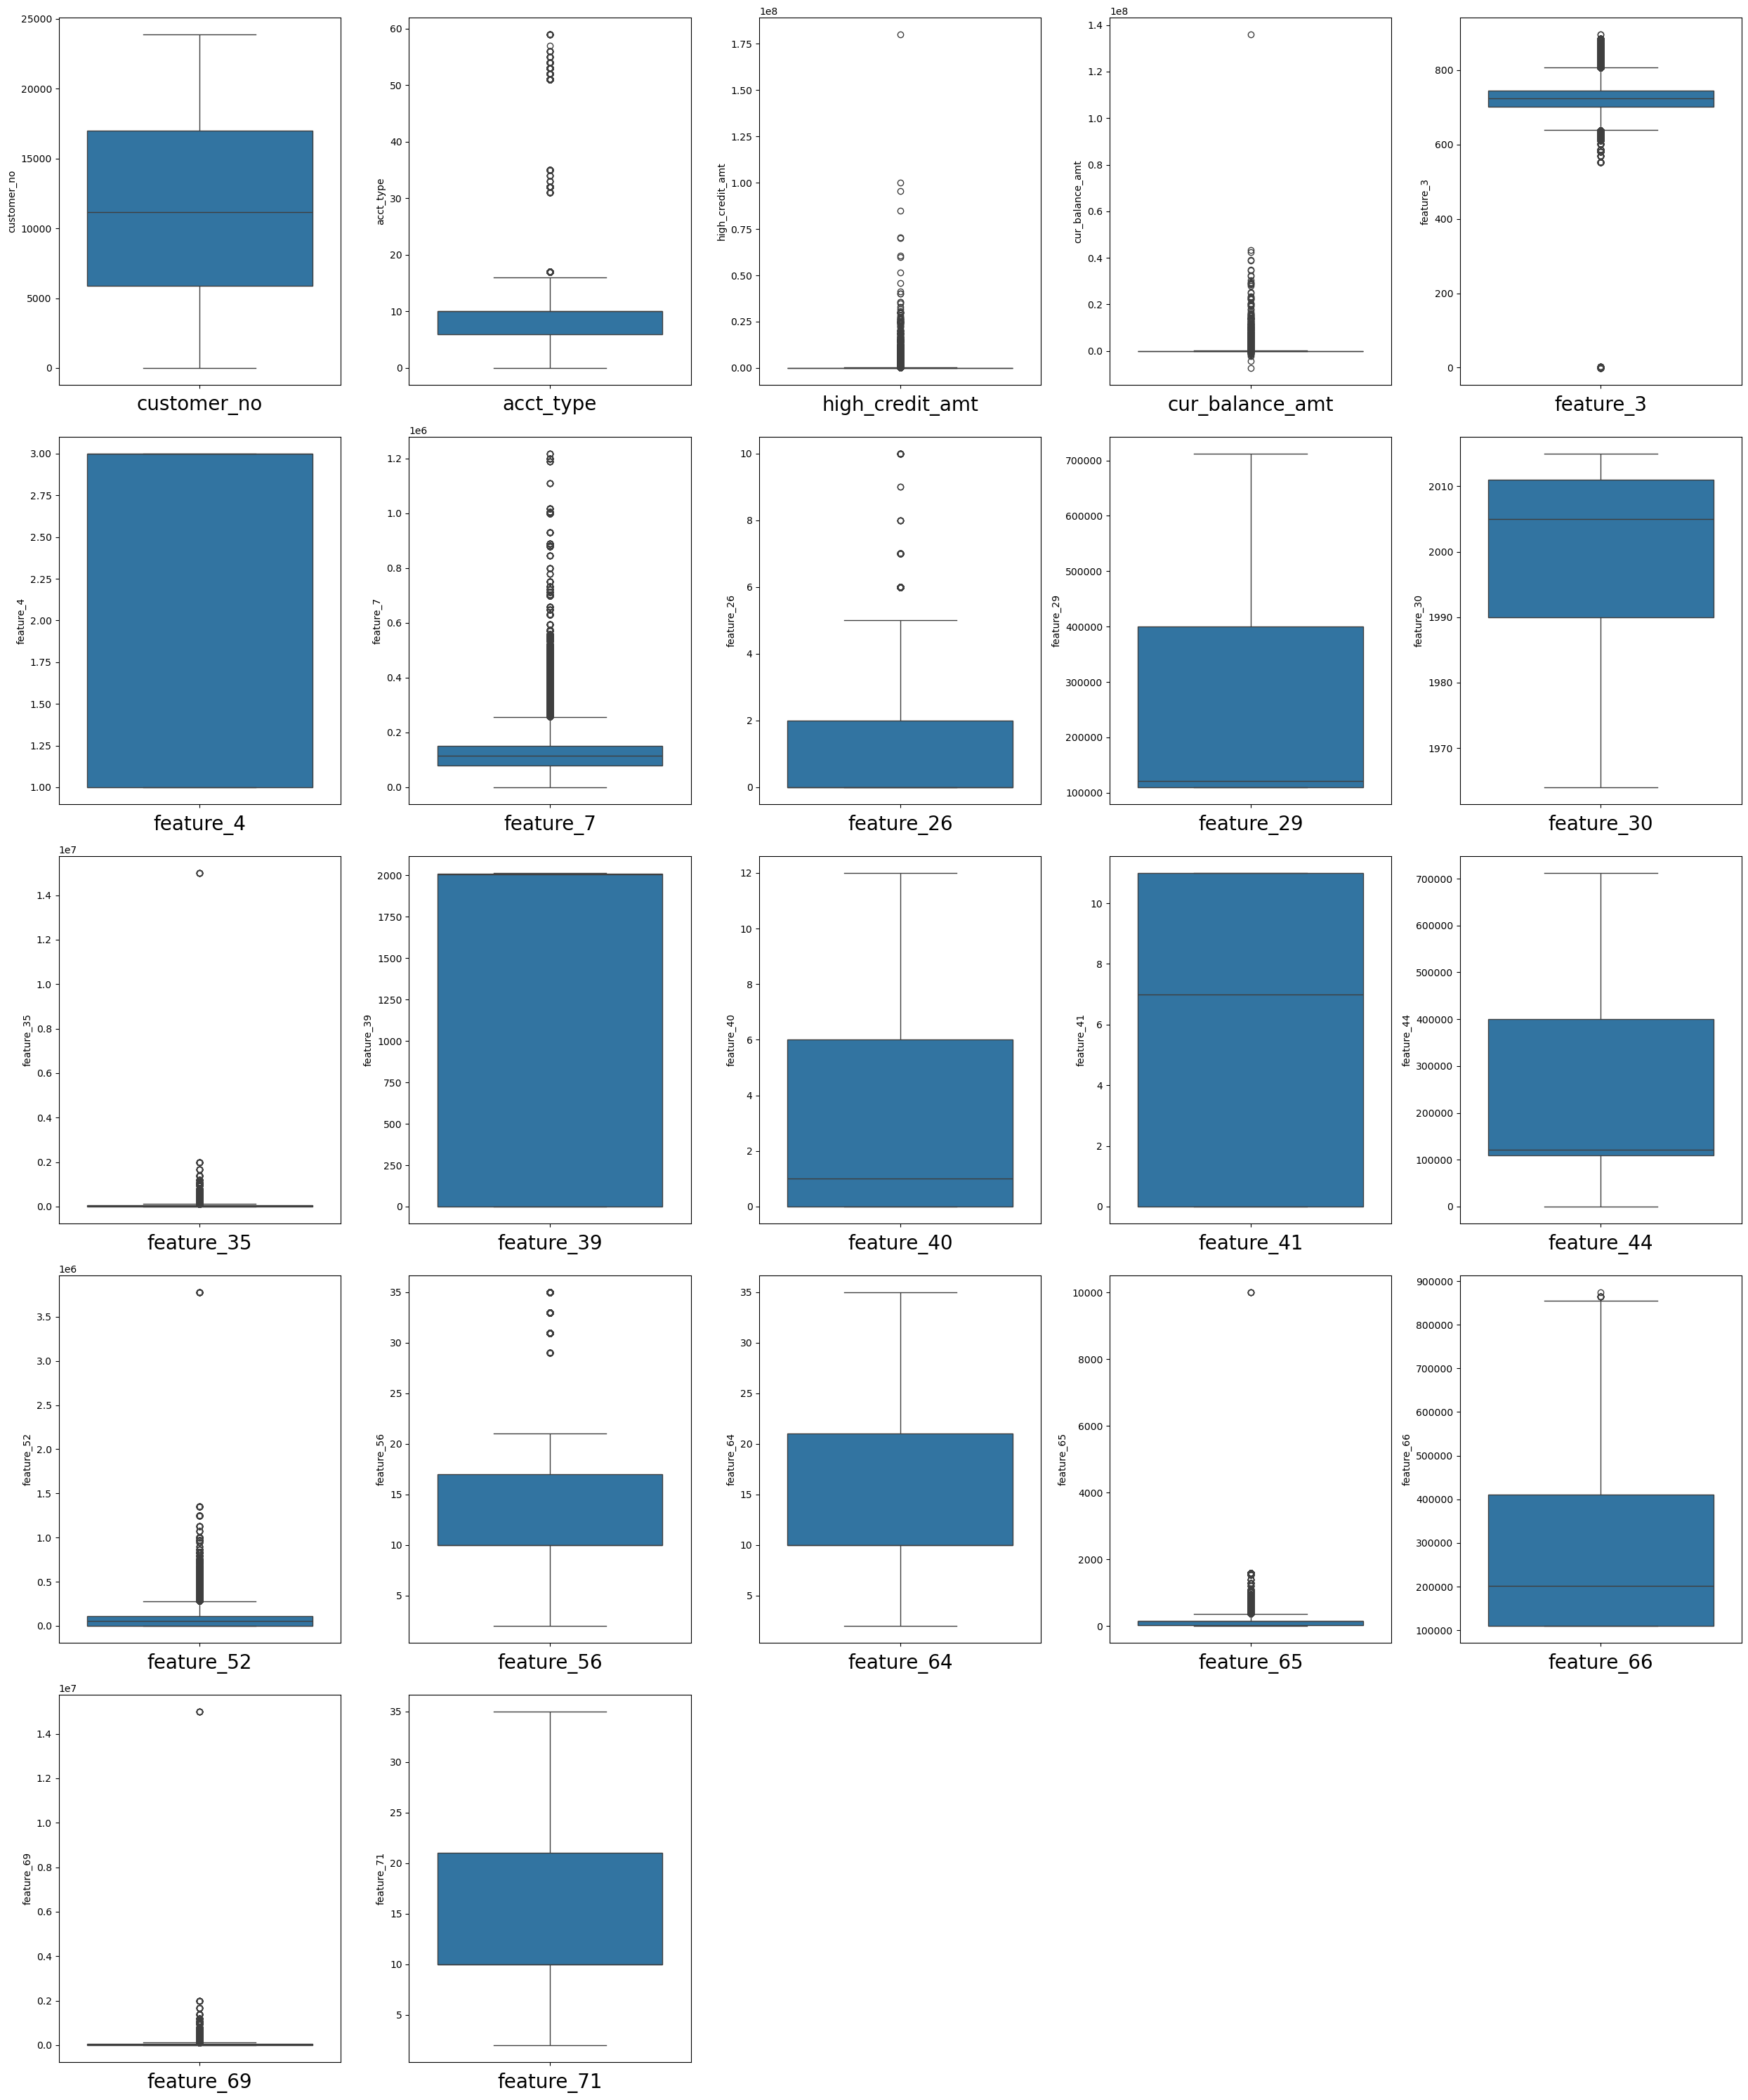

In [65]:
# checking outliers of continous columns
plt.figure(figsize=(25,30))
plt_num  = 1
for columns in continuous_columns:
    if plt_num <= 22:
        plt.subplot(5,5,plt_num)
        sns.boxplot(continuous_columns[columns]) # call the boxplot graph
        plt.xlabel(columns,fontsize = 20)
    plt_num += 1
plt.tight_layout()

### IQR values

In [35]:
IQR=[]
for i in continuous_columns:
    a=stats.iqr(df[i], interpolation='midpoint')
    IQR.append(a)
    print(i,':',a)
print(IQR)

customer_no : 11103.0
acct_type : 4.0
high_credit_amt : nan
cur_balance_amt : 20998.0
feature_3 : nan
feature_4 : nan
feature_7 : nan
feature_26 : nan
feature_29 : nan
feature_30 : nan
feature_35 : nan
feature_39 : nan
feature_40 : nan
feature_41 : nan
feature_44 : nan
feature_52 : nan
feature_56 : nan
feature_64 : nan
feature_65 : nan
feature_66 : nan
feature_69 : nan
feature_71 : nan
[11103.0, 4.0, nan, 20998.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


### Q1_values

In [36]:
Q1_values = []
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    Q1_values.append(q1)
    print(col, ':', q1)

customer_no : 5879.0
acct_type : 6.0
high_credit_amt : 22975.0
cur_balance_amt : 0.0
feature_3 : 699.0
feature_4 : 1.0
feature_7 : 80000.0
feature_26 : 0.0
feature_29 : 110056.0
feature_30 : 1990.0
feature_35 : 1.0
feature_39 : 0.0
feature_40 : 0.0
feature_41 : 0.0
feature_44 : 110051.0
feature_52 : 0.0
feature_56 : 10.0
feature_64 : 10.0
feature_65 : 15.0
feature_66 : 110059.0
feature_69 : 1.0
feature_71 : 10.0


### Q3_values

In [37]:
Q3_values = []
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  
for col in numeric_cols:
    q3 = df[col].quantile(0.75)
    Q3_values.append(q3)
    print(col, ':', q3)

customer_no : 16982.0
acct_type : 10.0
high_credit_amt : 106000.0
cur_balance_amt : 20998.0
feature_3 : 748.0
feature_4 : 3.0
feature_7 : 151000.0
feature_26 : 2.0
feature_29 : 400090.0
feature_30 : 2011.0
feature_35 : 50000.0
feature_39 : 2012.0
feature_40 : 6.0
feature_41 : 11.0
feature_44 : 400064.0
feature_52 : 113000.0
feature_56 : 17.0
feature_64 : 21.0
feature_65 : 157.0
feature_66 : 411028.0
feature_69 : 50000.0
feature_71 : 21.0


In [38]:
def handle_outliers_iqr_with_median(df):
    # Loop through each numerical column
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
         # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
         # Calculate the median
        median_value = df[col].median()
        # Replace outliers with the median
        df[col] = df[col].where((df[col] >= lower_bound) & (df[col] <= upper_bound), other=median_value)
    return df

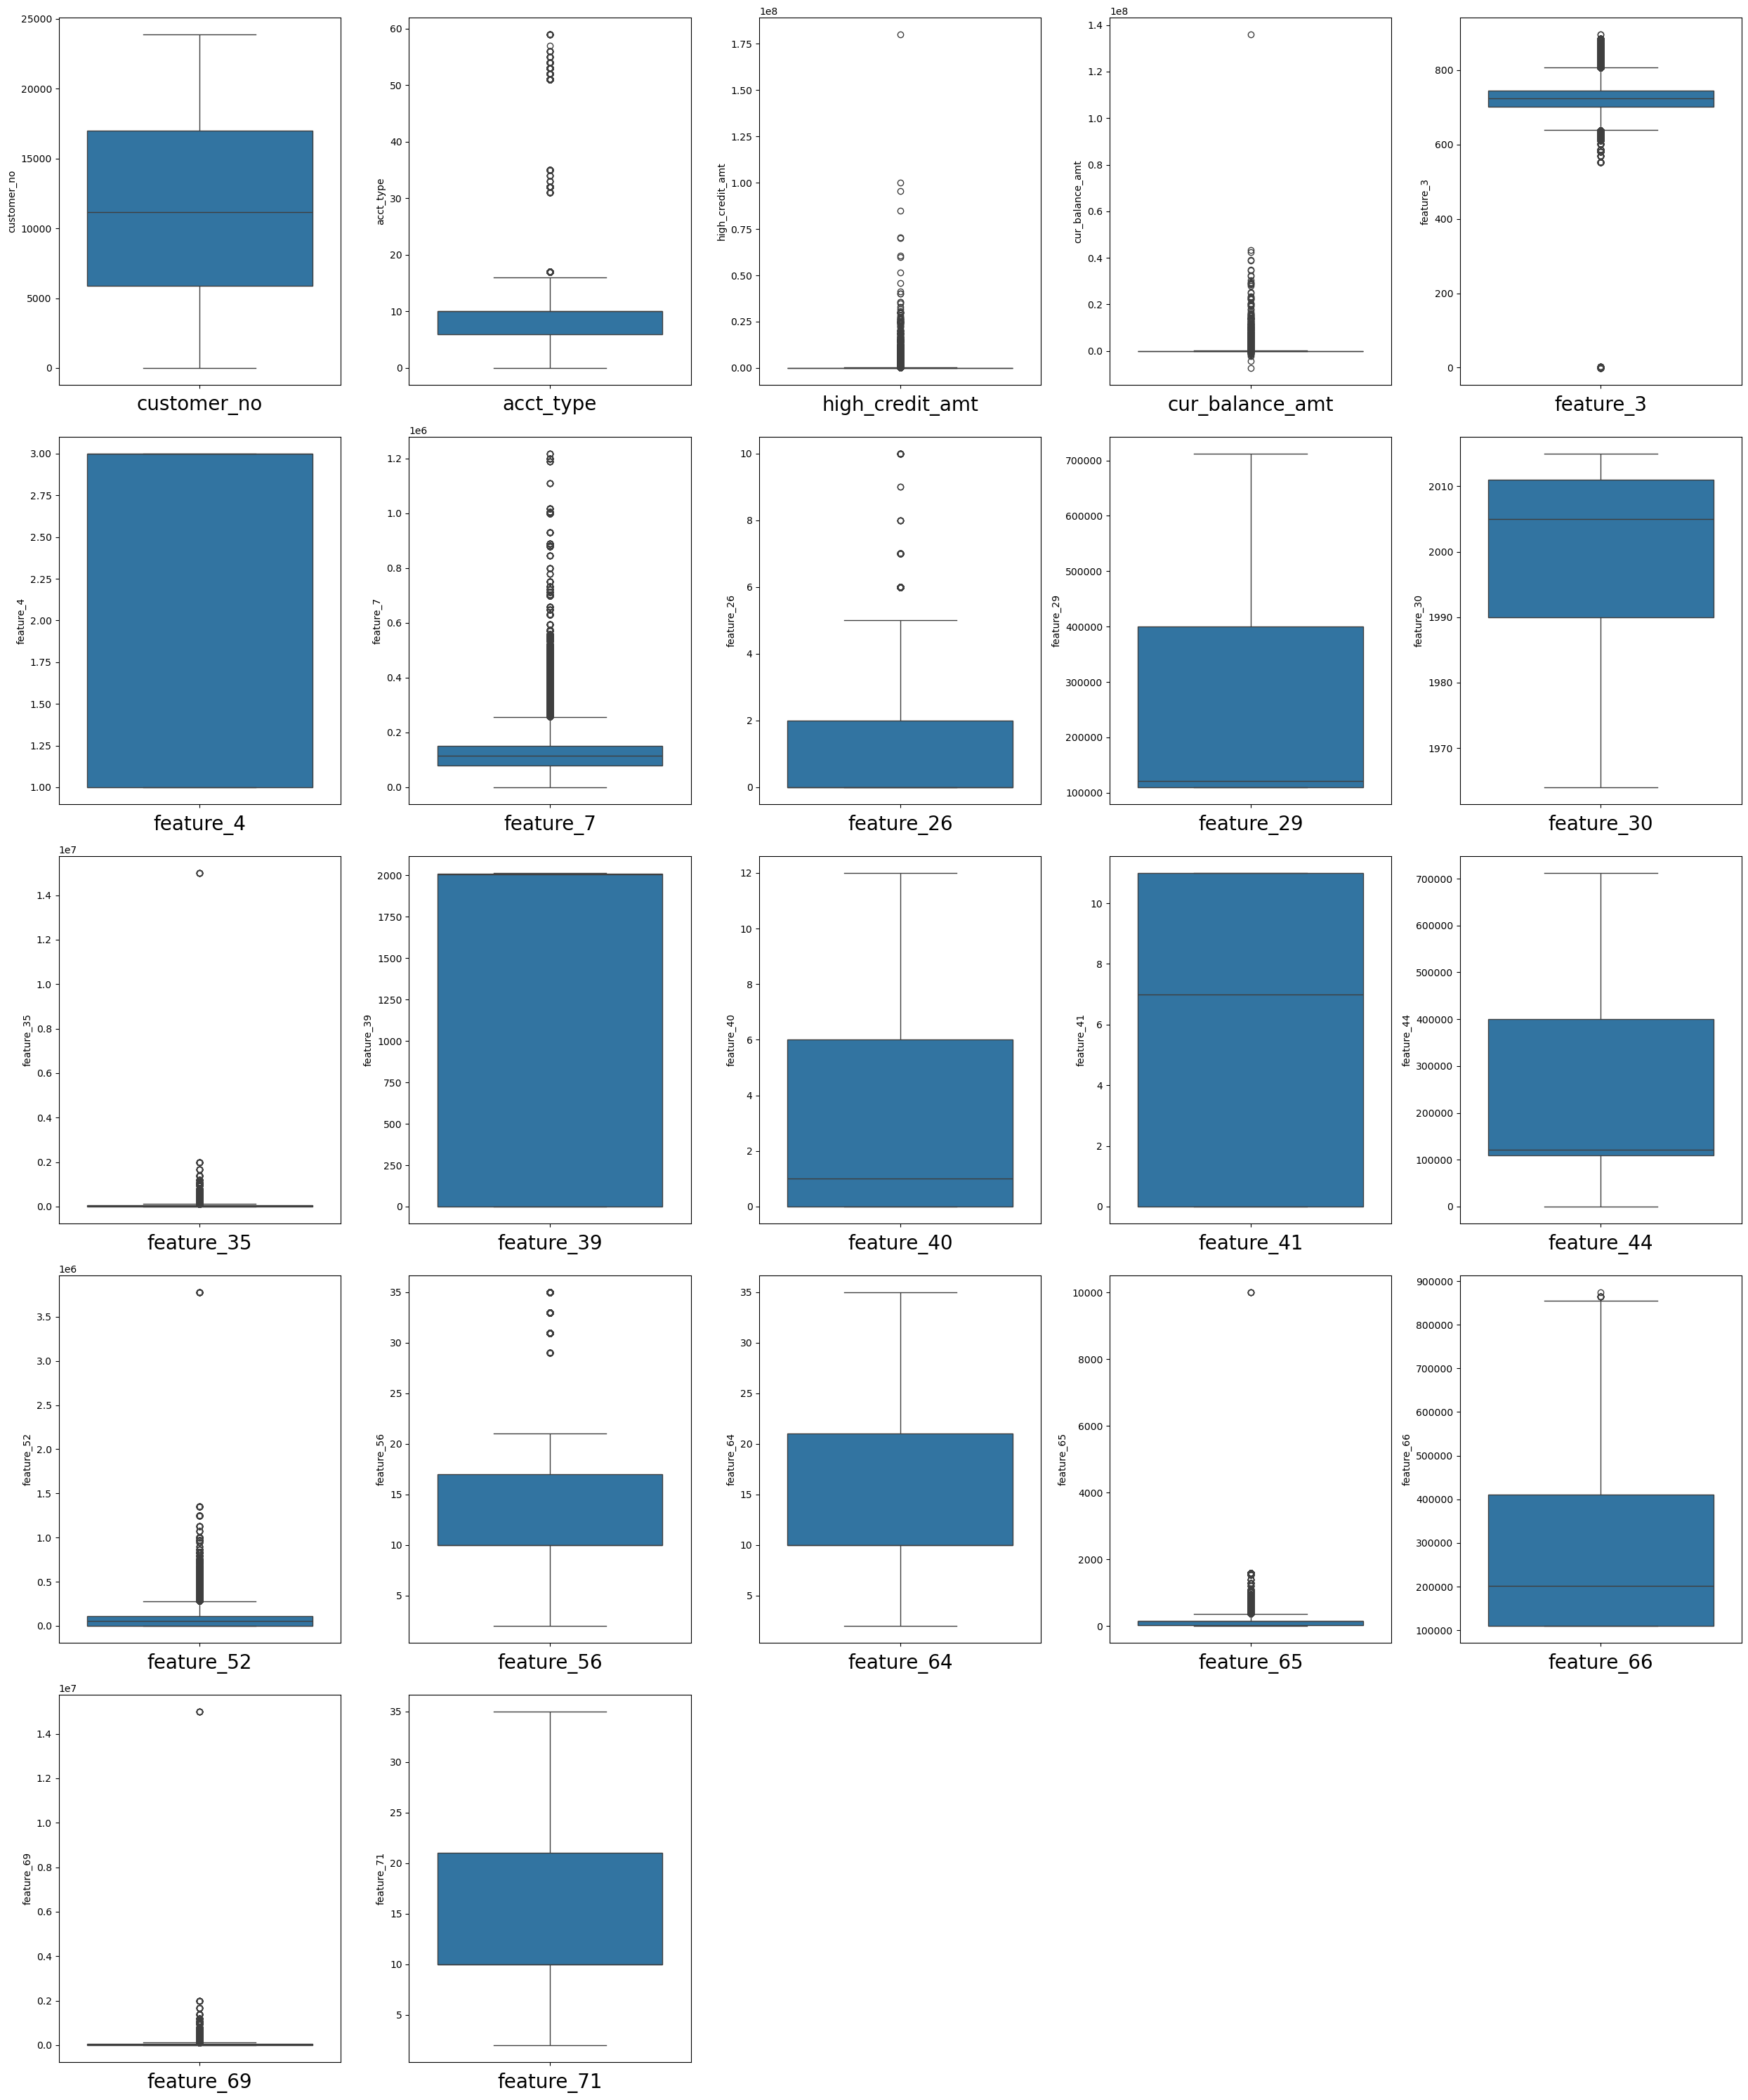

In [73]:
# checking outliers of continous columns
plt.figure(figsize=(25,30))
plt_num  = 1
for columns in continuous_columns:
    if plt_num <= 22:
        plt.subplot(5,5,plt_num)
        sns.boxplot(continuous_columns[columns]) # call the boxplot graph
        plt.xlabel(columns,fontsize = 20)
    plt_num += 1
plt.tight_layout()

In [74]:
df.head() #showing first 5 rows of data set

dt_opened_x  customer_no  upload_dt  acct_type  opened_dt last_paymt_dt  \
0  2015-11-10        12265 2015-10-20          6 2013-06-09    2014-06-30   
1  2015-11-10        12265 2015-10-20         10 2012-05-25    2015-09-06   
2  2015-11-10        12265 2015-10-20         10 2012-03-22    2015-08-31   
3  2015-07-20        15606 2015-07-09         10 2006-01-13    2015-03-09   
4  2015-07-20        15606 2015-07-09          6 2015-01-18    2015-05-05   

  reporting_dt  high_credit_amt  cur_balance_amt paymt_str_dt paymt_end_dt  \
0   2015-09-30          20900.0                0   2015-09-01   2014-07-01   
1   2015-10-03          16201.0            10390   2015-10-01   2012-11-01   
2   2015-09-30          41028.0            34420   2015-09-01   2012-10-01   
3   2009-01-31          93473.0                0   2007-07-01   2006-02-01   
4   2015-05-31          20250.0            13500   2015-05-01   2015-01-01   

  dt_opened_y entry_time        feature_1  feature_2  feature_3  feature_4  \
0  2015-11-10 2015-10-15  Platinum Maxima 2015-10-15      683.0        3.0   
1  2015-11-10 2015-10-15  Platinum Maxima 2015-10-15      683.0        3.0   
2  2015-11-10 2015-10-15  Platinum Maxima 2015-10-15      683.0        3.0   
3  2015-07-20 2015-07-06  Platinum Deligh 2015-07-06      687.0        3.0   
4  2015-07-20 2015-07-06  Platinum Deligh 2015-07-06      687.0        3.0   

   feature_7 feature_12 feature_14 feature_15 feature_16  feature_20  \
0    56000.0        PM1       12.0       SA05       MA01  ASWPKXXXXX   
1    56000.0        PM1       12.0       SA05       MA01  ASWPKXXXXX   
2    56000.0        PM1       12.0       SA05       MA01  ASWPKXXXXX   
3   125000.0        PD1         12       SA35       S001  AHRPMXXXXX   
4   125000.0        PD1         12       SA35       S001  AHRPMXXXXX   

  feature_21  feature_22  feature_24  feature_26     feature_27 feature_28  \
0 1984-06-15  88009XXXXX  @GMAIL.COM         0.0        MBA/MMS  New Delhi   
1 1984-06-15  88009XXXXX  @GMAIL.COM         0.0        MBA/MMS  New Delhi   
2 1984-06-15  88009XXXXX  @GMAIL.COM         0.0        MBA/MMS  New Delhi   
3 1980-06-20  88009XXXXX  @YAHOO.COM         2.0  Post-Graduate  Faridabad   
4 1980-06-20  88009XXXXX  @YAHOO.COM         2.0  Post-Graduate  Faridabad   

   feature_29  feature_30 feature_32  feature_35        feature_36  \
0    110059.0      2006.0      Paren     35000.0  Private Ltd. Co.   
1    110059.0      2006.0      Paren     35000.0  Private Ltd. Co.   
2    110059.0      2006.0      Paren     35000.0  Private Ltd. Co.   
3    121003.0      2009.0       Self    100000.0  Private Ltd. Co.   
4    121003.0      2009.0       Self    100000.0  Private Ltd. Co.   

                   feature_37                 feature_38  feature_39  \
0                      Others                     SR EXE      2009.0   
1                      Others                     SR EXE      2009.0   
2                      Others                     SR EXE      2009.0   
3  Banking/Financial Services  GENRAL MANAGER OPERATIONS      2013.0   
4  Banking/Financial Services  GENRAL MANAGER OPERATIONS      2013.0   

   feature_40  feature_41 feature_43  feature_44  feature_47 feature_50  \
0         1.0         4.0    Gurgaon    122001.0  ASWPKXXXXX          N   
1         1.0         4.0    Gurgaon    122001.0  ASWPKXXXXX          N   
2         1.0         4.0    Gurgaon    122001.0  ASWPKXXXXX          N   
3         1.0         2.0  Faridabad    121003.0  AHRPMXXXXX          N   
4         1.0         2.0  Faridabad    121003.0  AHRPMXXXXX          N   

   feature_52  feature_56  feature_64  feature_65  feature_66  feature_69  \
0         0.0        10.0        10.0       157.0    110059.0     35000.0   
1         0.0        10.0        10.0       157.0    110059.0     35000.0   
2         0.0        10.0        10.0       157.0    110059.0     35000.0   
3         0.0        13.0        13.0        39.0    121003.0    100000.0   
4        

In [39]:
#drop columns
df = df.drop(["dt_opened_x","customer_no","upload_dt","last_paymt_dt","reporting_dt","paymt_str_dt","paymt_end_dt","dt_opened_y","entry_time","feature_2","feature_20","feature_21","feature_22","feature_24","feature_47","feature_50","feature_72","feature_77","cur_balance_amt"],axis=1)
df

acct_type  opened_dt  high_credit_amt        feature_1  feature_3  \
0               6 2013-06-09          20900.0  Platinum Maxima      683.0   
1              10 2012-05-25          16201.0  Platinum Maxima      683.0   
2              10 2012-03-22          41028.0  Platinum Maxima      683.0   
3              10 2006-01-13          93473.0  Platinum Deligh      687.0   
4               6 2015-01-18          20250.0  Platinum Deligh      687.0   
...           ...        ...              ...              ...        ...   
186324         10 2007-05-02          24228.0  Titanium Deligh      746.0   
186325         10 2007-04-11          19584.0  Titanium Deligh      746.0   
186326         10 2006-11-20          50844.0  Titanium Deligh      746.0   
186327         10 2006-10-17          35587.0  Titanium Deligh      746.0   
186328          6 2005-11-29          26000.0  Titanium Deligh      746.0   

        feature_4  feature_7 feature_12 feature_14 feature_15 feature_16  \
0             3.0    56000.0        PM1       12.0       SA05       MA01   
1             3.0    56000.0        PM1       12.0       SA05       MA01   
2             3.0    56000.0        PM1       12.0       SA05       MA01   
3             3.0   125000.0        PD1         12       SA35       S001   
4             3.0   125000.0        PD1         12       SA35       S001   
...           ...        ...        ...        ...        ...        ...   
186324        3.0   138000.0        TD1          0       BBOL       H004   
186325        3.0   138000.0        TD1          0       BBOL       H004   
186326        3.0   138000.0        TD1          0       BBOL       H004   
186327        3.0   138000.0        TD1          0       BBOL       H004   
186328        3.0   138000.0        TD1          0       BBOL       H004   

        feature_26     feature_27                feature_28  feature_29  \
0              0.0        MBA/MMS                 New Delhi    110059.0   
1              0.0        MBA/MMS                 New Delhi    110059.0   
2              0.0        MBA/MMS                 New Delhi    110059.0   
3              2.0  Post-Graduate                 Faridabad    121003.0   
4              2.0  Post-Graduate                 Faridabad    121003.0   
...            ...            ...                       ...         ...   
186324         3.0  Post-Graduate  Hyderabad / Secunderabad    500017.0   
186325         3.0  Post-Graduate  Hyderabad / Secunderabad    500017.0   
186326         3.0  Post-Graduate  Hyderabad / Secunderabad    500017.0   
186327         3.0  Post-Graduate  Hyderabad / Secunderabad    500017.0   
186328         3.0  Post-Graduate  Hyderabad / Secunderabad    500017.0   

        feature_30 feature_32  feature_35        feature_36  \
0           2006.0      Paren     35000.0  Private Ltd. Co.   
1           2006.0      Paren     35000.0  Private Ltd. Co.   
2           2006.0      Paren     35000.0  Private Ltd. Co.   
3           2009.0       Self    100000.0  Private Ltd. Co.   
4           2009.0       Self    100000.0  Private Ltd. Co.   
...            ...        ...         ...               ...   
186324      1995.0       Self     45800.0  Private Ltd. Co.   
186325      1995.0       Self     45800.0  Private Ltd. Co.   
186326      1995.0       Self     45800.0  Private Ltd. Co.   
186327      1995.0       Self     45800.0  Private Ltd. Co.   
186328      1995.0       Self     45800.0  Private Ltd. Co.   

                        feature_37                 feature_38  feature_39  \
0                           Others                     SR EXE      2009.0   
1                           Others                     SR EXE      2009.0   
2                           Others                     SR EXE      2009.0   
3       Banking/Financial Services  GENRAL MANAGER OPERATIONS      2013.0   
4       Banking/Financial Services  GENRAL MANAGER OPERATIONS      2013.0   
...                            ...                

In [40]:
# change data into datatime
df["Year"] = pd.to_datetime(df["opened_dt"]).dt.year
df["Month"] = pd.to_datetime(df["opened_dt"]).dt.month
df["Day"] = pd.to_datetime(df["opened_dt"]).dt.day

In [78]:
df.head() # showning the top 5 data

acct_type  opened_dt  high_credit_amt        feature_1  feature_3  \
0          6 2013-06-09          20900.0  Platinum Maxima      683.0   
1         10 2012-05-25          16201.0  Platinum Maxima      683.0   
2         10 2012-03-22          41028.0  Platinum Maxima      683.0   
3         10 2006-01-13          93473.0  Platinum Deligh      687.0   
4          6 2015-01-18          20250.0  Platinum Deligh      687.0   

   feature_4  feature_7 feature_12 feature_14 feature_15 feature_16  \
0        3.0    56000.0        PM1       12.0       SA05       MA01   
1        3.0    56000.0        PM1       12.0       SA05       MA01   
2        3.0    56000.0        PM1       12.0       SA05       MA01   
3        3.0   125000.0        PD1         12       SA35       S001   
4        3.0   125000.0        PD1         12       SA35       S001   

   feature_26     feature_27 feature_28  feature_29  feature_30 feature_32  \
0         0.0        MBA/MMS  New Delhi    110059.0      2006.0      Paren   
1         0.0        MBA/MMS  New Delhi    110059.0      2006.0      Paren   
2         0.0        MBA/MMS  New Delhi    110059.0      2006.0      Paren   
3         2.0  Post-Graduate  Faridabad    121003.0      2009.0       Self   
4         2.0  Post-Graduate  Faridabad    121003.0      2009.0       Self   

   feature_35        feature_36                  feature_37  \
0     35000.0  Private Ltd. Co.                      Others   
1     35000.0  Private Ltd. Co.                      Others   
2     35000.0  Private Ltd. Co.                      Others   
3    100000.0  Private Ltd. Co.  Banking/Financial Services   
4    100000.0  Private Ltd. Co.  Banking/Financial Services   

                  feature_38  feature_39  feature_40  feature_41 feature_43  \
0                     SR EXE      2009.0         1.0         4.0    Gurgaon   
1                     SR EXE      2009.0         1.0         4.0    Gurgaon   
2                     SR EXE      2009.0         1.0         4.0    Gurgaon   
3  GENRAL MANAGER OPERATIONS      2013.0         1.0         2.0  Faridabad   
4  GENRAL MANAGER OPERATIONS      2013.0         1.0         2.0  Faridabad   

   feature_44  feature_52  feature_56  feature_64  feature_65  feature_66  \
0    122001.0         0.0        10.0        10.0       157.0    110059.0   
1    122001.0         0.0        10.0        10.0       157.0    110059.0   
2    122001.0         0.0        10.0        10.0       157.0    110059.0   
3    121003.0         0.0        13.0        13.0        39.0    121003.0   
4    121003.0         0.0        13.0        13.0        39.0    121003.0   

   feature_69  feature_71 Bad_label  Year  Month  Day  
0     35000.0        13.0         1  2013      6    9  
1     35000.0        13.0         1  2012      5   25  
2     35000.0        13.0         1  2012      3   22  
3    100000.0        13.0         1  2006      1   13  
4    100000.0        13.0         1  2015      1   18

In [41]:
from sklearn.preprocessing import LabelEncoder #import label encoder
LE = LabelEncoder() # call label encoder
# Apply label encoder
df["feature_12"] = LE.fit_transform(df["feature_12"])
df["feature_16"] = LE.fit_transform(df["feature_16"])
df["feature_15"] = LE.fit_transform(df["feature_15"])
df["feature_28"] = LE.fit_transform(df["feature_28"])
df["feature_32"] = LE.fit_transform(df["feature_32"])
df["feature_43"] = LE.fit_transform(df["feature_43"])
df["feature_36"] = LE.fit_transform(df["feature_36"])
df["feature_38"] = LE.fit_transform(df["feature_38"])
df["feature_37"] = LE.fit_transform(df["feature_37"])
df["feature_27"] = LE.fit_transform(df["feature_27"])

In [80]:
df.head() #showing first 5 rows of data set

acct_type  opened_dt  high_credit_amt        feature_1  feature_3  \
0          6 2013-06-09          20900.0  Platinum Maxima      683.0   
1         10 2012-05-25          16201.0  Platinum Maxima      683.0   
2         10 2012-03-22          41028.0  Platinum Maxima      683.0   
3         10 2006-01-13          93473.0  Platinum Deligh      687.0   
4          6 2015-01-18          20250.0  Platinum Deligh      687.0   

   feature_4  feature_7  feature_12 feature_14  feature_15  feature_16  \
0        3.0    56000.0          10       12.0         303         360   
1        3.0    56000.0          10       12.0         303         360   
2        3.0    56000.0          10       12.0         303         360   
3        3.0   125000.0           7         12         322         427   
4        3.0   125000.0           7         12         322         427   

   feature_26  feature_27  feature_28  feature_29  feature_30  feature_32  \
0         0.0           6          42    110059.0      2006.0           2   
1         0.0           6          42    110059.0      2006.0           2   
2         0.0           6          42    110059.0      2006.0           2   
3         2.0           8          18    121003.0      2009.0           4   
4         2.0           8          18    121003.0      2009.0           4   

   feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  \
0     35000.0           6           7        4509      2009.0         1.0   
1     35000.0           6           7        4509      2009.0         1.0   
2     35000.0           6           7        4509      2009.0         1.0   
3    100000.0           6           1        2019      2013.0         1.0   
4    100000.0           6           1        2019      2013.0         1.0   

   feature_41  feature_43  feature_44  feature_52  feature_56  feature_64  \
0         4.0          28    122001.0         0.0        10.0        10.0   
1         4.0          28    122001.0         0.0        10.0        10.0   
2         4.0          28    122001.0         0.0        10.0        10.0   
3         2.0          21    121003.0         0.0        13.0        13.0   
4         2.0          21    121003.0         0.0        13.0        13.0   

   feature_65  feature_66  feature_69  feature_71 Bad_label  Year  Month  Day  
0       157.0    110059.0     35000.0        13.0         1  2013      6    9  
1       157.0    110059.0     35000.0        13.0         1  2012      5   25  
2       157.0    110059.0     35000.0        13.0         1  2012      3   22  
3        39.0    121003.0    100000.0        13.0         1  2006      1   13  
4        39.0    121003.0    100000.0        13.0         1  2015      1   18

In [42]:
# get dummy values for feature 1
df1 = pd.get_dummies(df["feature_1"],dtype=int,prefix="feature_1")
df1

feature_1_Golf Card  feature_1_Insignia  feature_1_Platinum Cricke  \
0                         0                   0                          0   
1                         0                   0                          0   
2                         0                   0                          0   
3                         0                   0                          0   
4                         0                   0                          0   
...                     ...                 ...                        ...   
186324                    0                   0                          0   
186325                    0                   0                          0   
186326                    0                   0                          0   
186327                    0                   0                          0   
186328                    0                   0                          0   

        feature_1_Platinum Deligh  feature_1_Platinum Maxima  \
0                               0                          1   
1                               0                          1   
2                               0                          1   
3                               1                          0   
4                               1                          0   
...                           ...                        ...   
186324                          0                          0   
186325                          0                          0   
186326                          0                          0   
186327                          0                          0   
186328                          0                          0   

        feature_1_RBL Bank Fun+  feature_1_Titanium Deligh  
0                             0                          0  
1                             0                          0  
2                             0                          0  
3                             0                          0  
4                             0                          0  
...                         ...                        ...  
186324                        0                          1  
186325                        0                          1  
186326                        0                          1  
186327                        0                          1  
186328                        0                          1  

[186329 rows x 7 columns]

In [43]:
# concate the data
df = pd.concat([df,df1],axis=1)
df

acct_type  opened_dt  high_credit_amt        feature_1  feature_3  \
0               6 2013-06-09          20900.0  Platinum Maxima      683.0   
1              10 2012-05-25          16201.0  Platinum Maxima      683.0   
2              10 2012-03-22          41028.0  Platinum Maxima      683.0   
3              10 2006-01-13          93473.0  Platinum Deligh      687.0   
4               6 2015-01-18          20250.0  Platinum Deligh      687.0   
...           ...        ...              ...              ...        ...   
186324         10 2007-05-02          24228.0  Titanium Deligh      746.0   
186325         10 2007-04-11          19584.0  Titanium Deligh      746.0   
186326         10 2006-11-20          50844.0  Titanium Deligh      746.0   
186327         10 2006-10-17          35587.0  Titanium Deligh      746.0   
186328          6 2005-11-29          26000.0  Titanium Deligh      746.0   

        feature_4  feature_7  feature_12 feature_14  feature_15  feature_16  \
0             3.0    56000.0          10       12.0         303         360   
1             3.0    56000.0          10       12.0         303         360   
2             3.0    56000.0          10       12.0         303         360   
3             3.0   125000.0           7         12         322         427   
4             3.0   125000.0           7         12         322         427   
...           ...        ...         ...        ...         ...         ...   
186324        3.0   138000.0          14          0         119         287   
186325        3.0   138000.0          14          0         119         287   
186326        3.0   138000.0          14          0         119         287   
186327        3.0   138000.0          14          0         119         287   
186328        3.0   138000.0          14          0         119         287   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
0              0.0           6          42    110059.0      2006.0   
1              0.0           6          42    110059.0      2006.0   
2              0.0           6          42    110059.0      2006.0   
3              2.0           8          18    121003.0      2009.0   
4              2.0           8          18    121003.0      2009.0   
...            ...         ...         ...         ...         ...   
186324         3.0           8          25    500017.0      1995.0   
186325         3.0           8          25    500017.0      1995.0   
186326         3.0           8          25    500017.0      1995.0   
186327         3.0           8          25    500017.0      1995.0   
186328         3.0           8          25    500017.0      1995.0   

        feature_32  feature_35  feature_36  feature_37  feature_38  \
0                2     35000.0           6           7        4509   
1                2     35000.0           6           7        4509   
2                2     35000.0           6           7        4509   
3                4    100000.0           6           1        2019   
4                4    100000.0           6           1        2019   
...            ...         ...         ...         ...         ...   
186324           4     45800.0           6           1        2629   
186325           4     45800.0           6           1        2629   
186326           4     45800.0           6           1        2629   
186327           4     45800.0           6           1        2629   
186328           4     45800.0           6           1        2629   

        feature_39  feature_40  feature_41  feature_43  feature_44  \
0           2009.0         1.0         4.0          28    122001.0   
1           2009.0         1.0         4.0          28    122001.0   
2           2009.0         1.0         4.0          28    122001.0   
3           2013.0         1.0         2.0          21    121003.0   
4           2013.0         1.0         2.0          21    121003.0   
...            ...         ...  

In [44]:
df = df.drop(["opened_dt","feature_1"],axis=1) # drop the columns
df

acct_type  high_credit_amt  feature_3  feature_4  feature_7  \
0               6          20900.0      683.0        3.0    56000.0   
1              10          16201.0      683.0        3.0    56000.0   
2              10          41028.0      683.0        3.0    56000.0   
3              10          93473.0      687.0        3.0   125000.0   
4               6          20250.0      687.0        3.0   125000.0   
...           ...              ...        ...        ...        ...   
186324         10          24228.0      746.0        3.0   138000.0   
186325         10          19584.0      746.0        3.0   138000.0   
186326         10          50844.0      746.0        3.0   138000.0   
186327         10          35587.0      746.0        3.0   138000.0   
186328          6          26000.0      746.0        3.0   138000.0   

        feature_12 feature_14  feature_15  feature_16  feature_26  feature_27  \
0               10       12.0         303         360         0.0           6   
1               10       12.0         303         360         0.0           6   
2               10       12.0         303         360         0.0           6   
3                7         12         322         427         2.0           8   
4                7         12         322         427         2.0           8   
...            ...        ...         ...         ...         ...         ...   
186324          14          0         119         287         3.0           8   
186325          14          0         119         287         3.0           8   
186326          14          0         119         287         3.0           8   
186327          14          0         119         287         3.0           8   
186328          14          0         119         287         3.0           8   

        feature_28  feature_29  feature_30  feature_32  feature_35  \
0               42    110059.0      2006.0           2     35000.0   
1               42    110059.0      2006.0           2     35000.0   
2               42    110059.0      2006.0           2     35000.0   
3               18    121003.0      2009.0           4    100000.0   
4               18    121003.0      2009.0           4    100000.0   
...            ...         ...         ...         ...         ...   
186324          25    500017.0      1995.0           4     45800.0   
186325          25    500017.0      1995.0           4     45800.0   
186326          25    500017.0      1995.0           4     45800.0   
186327          25    500017.0      1995.0           4     45800.0   
186328          25    500017.0      1995.0           4     45800.0   

        feature_36  feature_37  feature_38  feature_39  feature_40  \
0                6           7        4509      2009.0         1.0   
1                6           7        4509      2009.0         1.0   
2                6           7        4509      2009.0         1.0   
3                6           1        2019      2013.0         1.0   
4                6           1        2019      2013.0         1.0   
...            ...         ...         ...         ...         ...   
186324           6           1        2629      1999.0         0.0   
186325           6           1        2629      1999.0         0.0   
186326           6           1        2629      1999.0         0.0   
186327           6           1        2629      1999.0         0.0   
186328           6           1        2629      1999.0         0.0   

        feature_41  feature_43  feature_44  feature_52  feature_56  \
0              4.0          28    122001.0         0.0        10.0   
1              4.0          28    122001.0         0.0        10.0   
2              4.0          28    122001.0         0.0        10.0   
3              2.0          21    121003.0         0.0        13.0   
4              2.0          21    121003.0         0.0        13.0   
...            ...         ...         ...         ...         ...   
186324    

In [87]:
for column in df: # show  all columns
    print(column)

acct_type
high_credit_amt
feature_3
feature_4
feature_7
feature_12
feature_14
feature_15
feature_16
feature_26
feature_27
feature_28
feature_29
feature_30
feature_32
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_43
feature_44
feature_52
feature_56
feature_64
feature_65
feature_66
feature_69
feature_71
Bad_label
Year
Month
Day
feature_1_Golf Card
feature_1_Insignia
feature_1_Platinum Cricke
feature_1_Platinum Deligh
feature_1_Platinum Maxima
feature_1_RBL Bank Fun+
feature_1_Titanium Deligh


### 2. Feature Selection
* Feature selection is the process of choosing the most relevant variables from a dataset that contribute significantly to a model’s predictive power. By reducing the number of features, it simplifies the model, improves training efficiency, and can enhance accuracy by removing noise or irrelevant data. Common techniques include correlation analysis, mutual information, and advanced methods like recursive feature elimination (RFE) and Lasso regularization.

In [90]:
df.drop('Bad_label',axis=1).corr()

acct_type  high_credit_amt  feature_3  feature_4  \
acct_type                   1.000000        -0.072739  -0.037218   0.006543   
high_credit_amt            -0.072739         1.000000   0.048088  -0.001256   
feature_3                  -0.037218         0.048088   1.000000  -0.228492   
feature_4                   0.006543        -0.001256  -0.228492   1.000000   
feature_7                  -0.003868         0.029620   0.301346  -0.066009   
feature_12                  0.000842        -0.020323  -0.047457   0.115468   
feature_14                 -0.002168        -0.020194   0.021854   0.092292   
feature_15                 -0.008394        -0.025959   0.026461   0.151446   
feature_16                  0.000395        -0.008976  -0.065640  -0.157246   
feature_26                 -0.010184         0.010370   0.030750   0.216625   
feature_27                 -0.012818         0.000667   0.021307   0.089684   
feature_28                 -0.008472        -0.007833   0.021385   0.025678   
feature_29                  0.011336         0.004475  -0.045193  -0.152672   
feature_30                 -0.009961        -0.009095  -0.051493   0.024860   
feature_32                 -0.000648         0.020084   0.036626   0.157006   
feature_35                 -0.004825         0.026253   0.055208   0.016186   
feature_36                  0.007601        -0.002686  -0.033447  -0.069692   
feature_37                 -0.006793        -0.012587  -0.028832  -0.090416   
feature_38                 -0.002016        -0.003356  -0.016754   0.009306   
feature_39                 -0.026354        -0.043477  -0.083723   0.063240   
feature_40                 -0.011430        -0.025330  -0.073124  -0.006239   
feature_41                 -0.035187        -0.024638   0.008202   0.033959   
feature_43                 -0.010315         0.003945   0.045169  -0.027047   
feature_44                  0.012253         0.003082  -0.049499  -0.151222   
feature_52                  0.027996         0.022560   0.060636   0.068597   
feature_56                  0.001765         0.028585   0.067013   0.020299   
feature_64                  0.003263         0.020089   0.044767   0.043333   
feature_65                  0.003467        -0.017473  -0.033446   0.084240   
feature_66                  0.013333        -0.005564  -0.077522  -0.096257   
feature_69                 -0.004825         0.026253   0.055208   0.016186   
feature_71                  0.007099         0.021117   0.046907   0.036075   
Year                       -0.048615         0.027413  -0.240569   0.011334   
Month                      -0.006829        -0.001145   0.009587  -0.002238   
Day                        -0.031513         0.028552  -0.007307  -0.001211   
feature_1_Golf Card         0.004269         0.027640  -0.006128  -0.021333   
feature_1_Insignia         -0.007072         0.077443   0.004496  -0.038573   
feature_1_Platinum Cricke   0.003013         0.000886   0.011685  -0.011347   
feature_1_Platinum Deligh   0.001715        -0.011761   0.052771  -0.034345   
feature_1_Platinum Maxima  -0.005184         0.009690  -0.031416  -0.042326   
feature_1_RBL Bank Fun+     0.003372         0.003787   0.022130  -0.102300   
feature_1_Titanium Deligh   0.003640        -0.014603  -0.027264   0.116909   

                           feature_7  feature_12  feature_14  feature_15  \
acct_type                  -0.003868    0.000842   -0.002168   -0.008394   
high_credit_amt             0.029620   -0.020323   -0.020194   -0.025959   
feature_3                   0.301346   -0.047457    0.021854    0.026461   
feature_4                  -0.066009    0.115468    0.092292    0.151446   
feature_7                   1.000000   -0.074682   -0.019448   -0.055269   
feature_12                 -0.074682    1.000000   -0.416147   -0.139362   
feature_14                 -0.019448   -0.416147    1.000000    0.370180   
feature_15                 -0.055269   -0.139362    0.370180    1.000000   
feature_16              

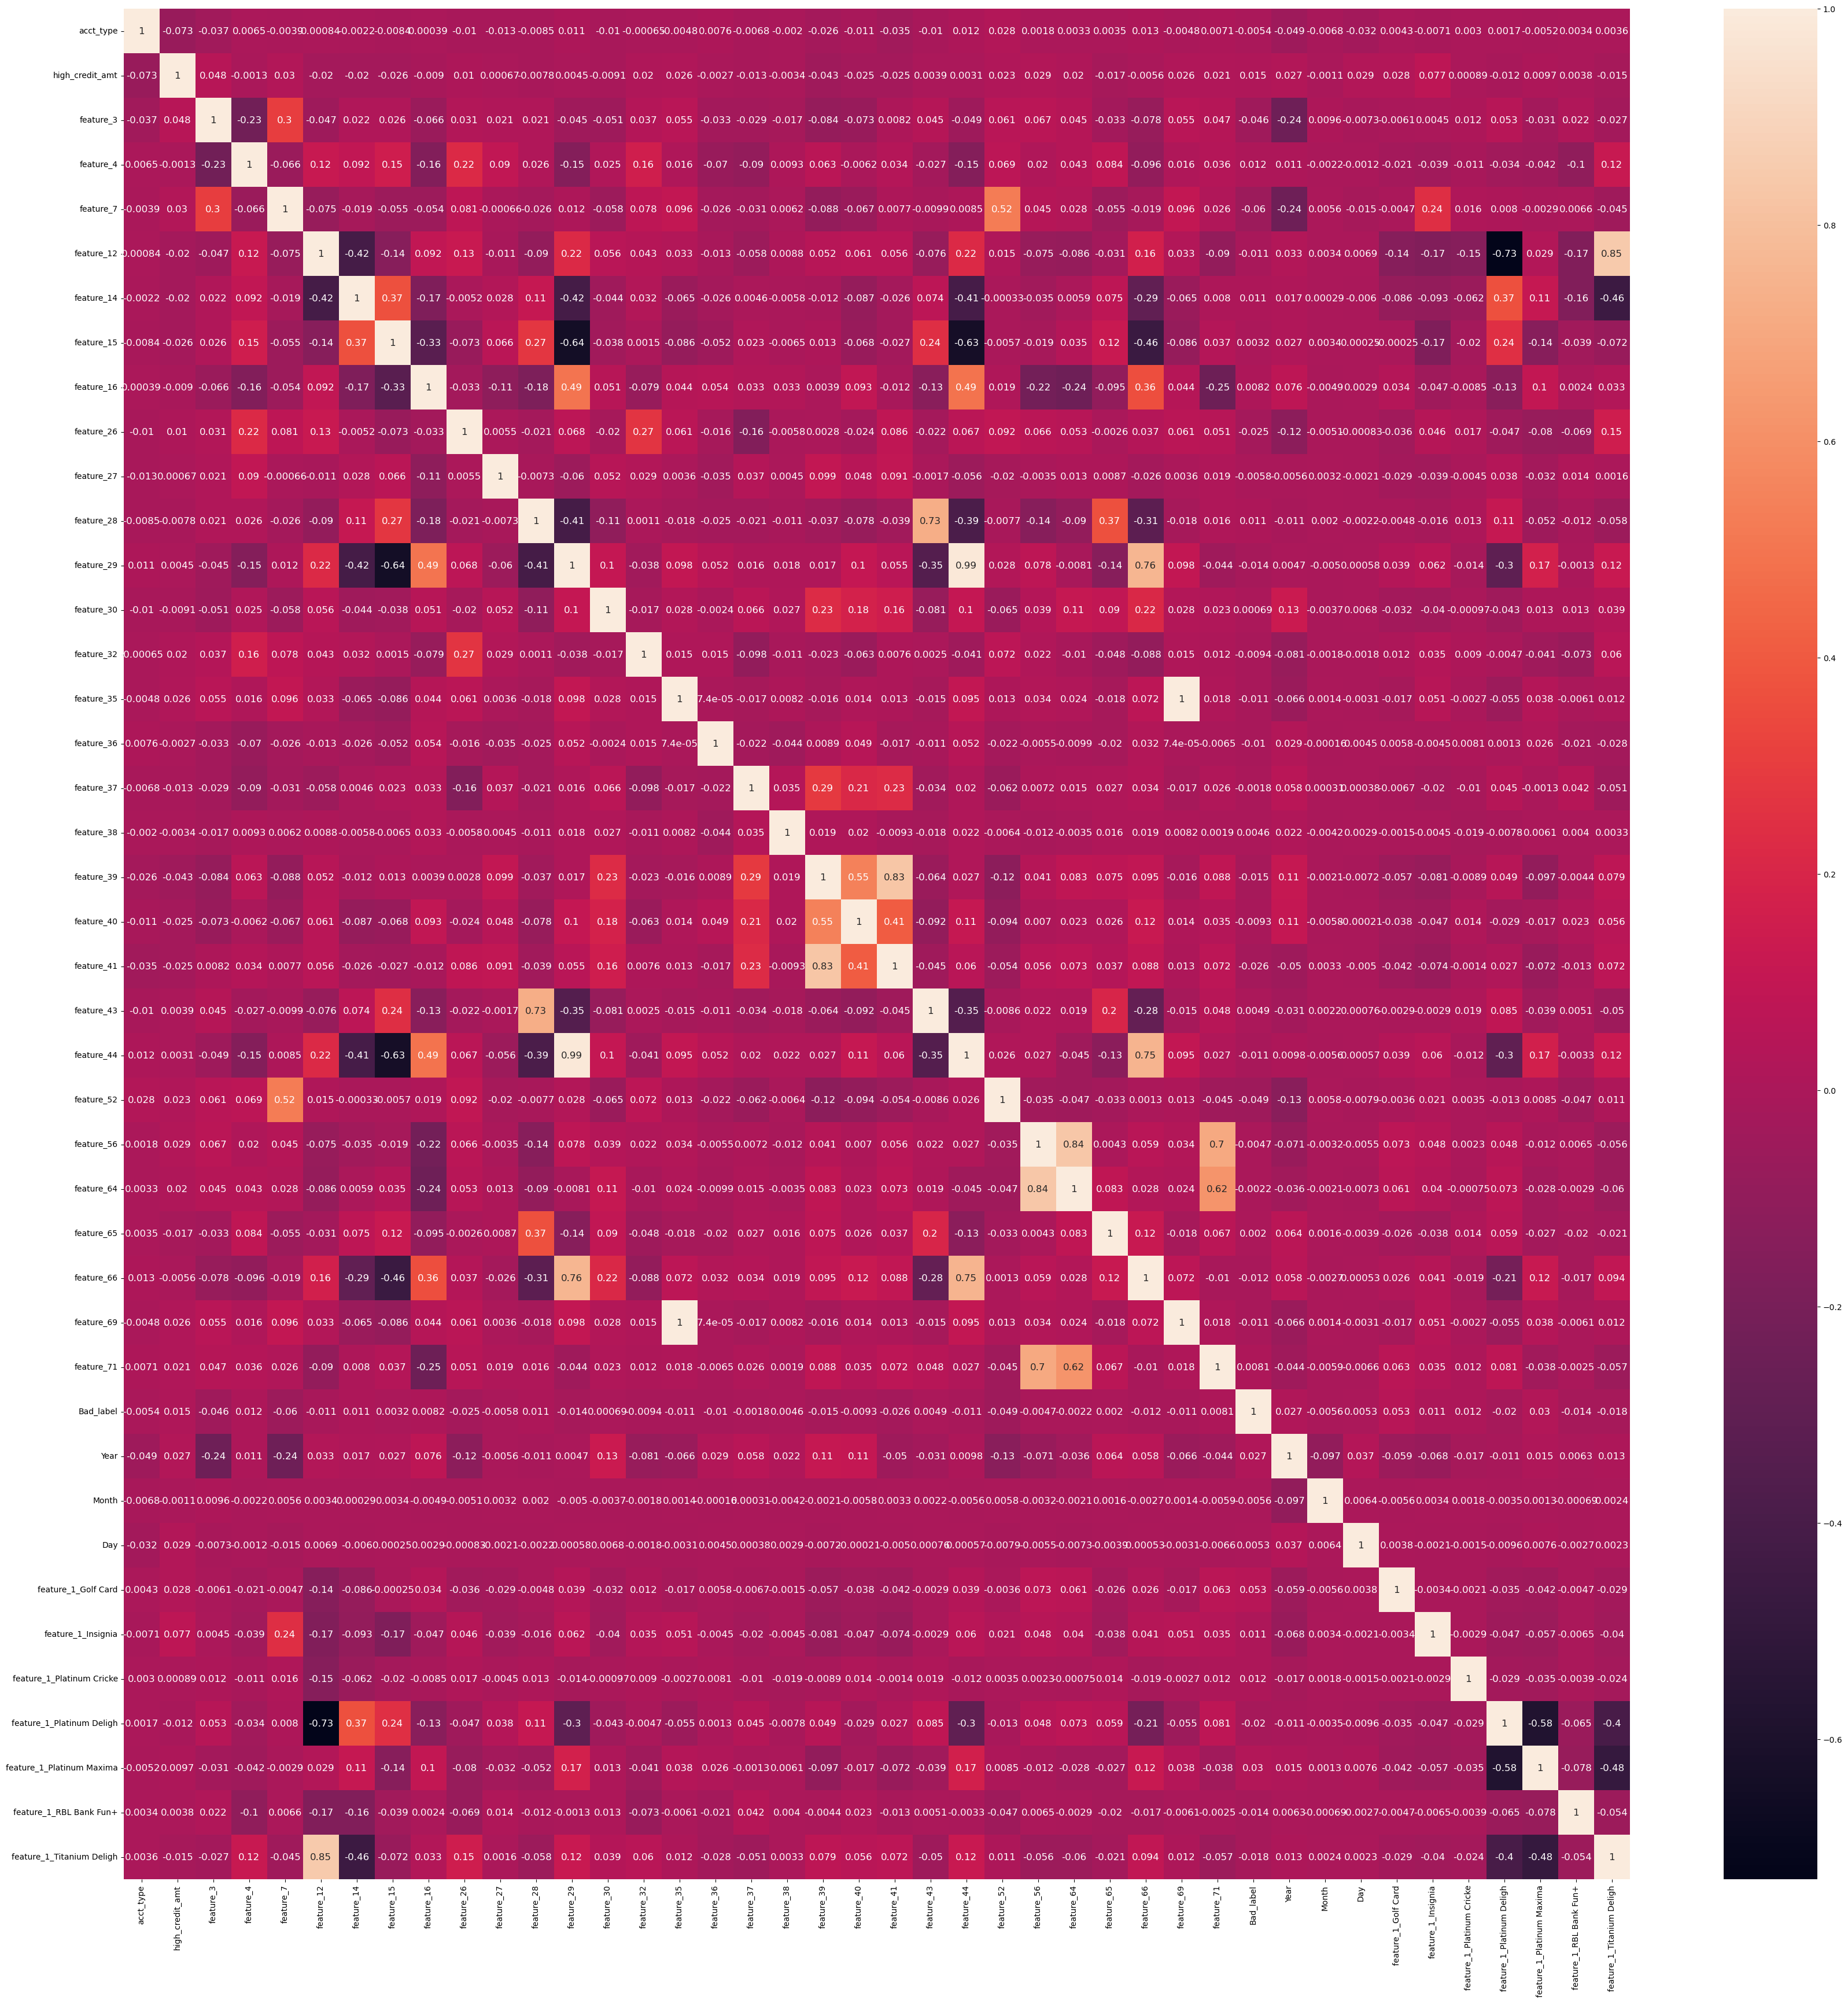

In [89]:
# Adjust figure size based on the number of columns (42 columns)
plt.figure(figsize=(42, 42))  # You can adjust the size based on your preference
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12})
plt.show()

In [45]:
correlation_matrix=df.corr() # calculation correlation matrix

In [46]:
for i in range(len(correlation_matrix.columns)):   # iterate over the correlation matrix and print coluns with correlation >0.50
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.90:
            col1=correlation_matrix.columns[i]
            col2=correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i,j]
            print(f"Correlation between {col1} and {col2} : {corr_value:.2f}")

Correlation between feature_44 and feature_29 : 0.99
Correlation between feature_69 and feature_35 : 1.00


In [47]:
df = df.drop(["feature_35","feature_29","feature_44","feature_69"],axis=1) # drop columns
df

acct_type  high_credit_amt  feature_3  feature_4  feature_7  \
0               6          20900.0      683.0        3.0    56000.0   
1              10          16201.0      683.0        3.0    56000.0   
2              10          41028.0      683.0        3.0    56000.0   
3              10          93473.0      687.0        3.0   125000.0   
4               6          20250.0      687.0        3.0   125000.0   
...           ...              ...        ...        ...        ...   
186324         10          24228.0      746.0        3.0   138000.0   
186325         10          19584.0      746.0        3.0   138000.0   
186326         10          50844.0      746.0        3.0   138000.0   
186327         10          35587.0      746.0        3.0   138000.0   
186328          6          26000.0      746.0        3.0   138000.0   

        feature_12 feature_14  feature_15  feature_16  feature_26  feature_27  \
0               10       12.0         303         360         0.0           6   
1               10       12.0         303         360         0.0           6   
2               10       12.0         303         360         0.0           6   
3                7         12         322         427         2.0           8   
4                7         12         322         427         2.0           8   
...            ...        ...         ...         ...         ...         ...   
186324          14          0         119         287         3.0           8   
186325          14          0         119         287         3.0           8   
186326          14          0         119         287         3.0           8   
186327          14          0         119         287         3.0           8   
186328          14          0         119         287         3.0           8   

        feature_28  feature_30  feature_32  feature_36  feature_37  \
0               42      2006.0           2           6           7   
1               42      2006.0           2           6           7   
2               42      2006.0           2           6           7   
3               18      2009.0           4           6           1   
4               18      2009.0           4           6           1   
...            ...         ...         ...         ...         ...   
186324          25      1995.0           4           6           1   
186325          25      1995.0           4           6           1   
186326          25      1995.0           4           6           1   
186327          25      1995.0           4           6           1   
186328          25      1995.0           4           6           1   

        feature_38  feature_39  feature_40  feature_41  feature_43  \
0             4509      2009.0         1.0         4.0          28   
1             4509      2009.0         1.0         4.0          28   
2             4509      2009.0         1.0         4.0          28   
3             2019      2013.0         1.0         2.0          21   
4             2019      2013.0         1.0         2.0          21   
...            ...         ...         ...         ...         ...   
186324        2629      1999.0         0.0        11.0          31   
186325        2629      1999.0         0.0        11.0          31   
186326        2629      1999.0         0.0        11.0          31   
186327        2629      1999.0         0.0        11.0          31   
186328        2629      1999.0         0.0        11.0          31   

        feature_52  feature_56  feature_64  feature_65  feature_66  \
0              0.0        10.0        10.0       157.0    110059.0   
1              0.0        10.0        10.0       157.0    110059.0   
2              0.0        10.0        10.0       157.0    110059.0   
3              0.0        13.0        13.0        39.0    121003.0   
4              0.0        13.0        13.0        39.0    121003.0   
...            ...         ...         ...         ...         ...   
186324    

## Model Creation Process

In [48]:
x = df.drop("Bad_label",axis=1)    # create variable for independent variable
y = df.Bad_label  # create variable for dependent variable

In [49]:
x

acct_type  high_credit_amt  feature_3  feature_4  feature_7  \
0               6          20900.0      683.0        3.0    56000.0   
1              10          16201.0      683.0        3.0    56000.0   
2              10          41028.0      683.0        3.0    56000.0   
3              10          93473.0      687.0        3.0   125000.0   
4               6          20250.0      687.0        3.0   125000.0   
...           ...              ...        ...        ...        ...   
186324         10          24228.0      746.0        3.0   138000.0   
186325         10          19584.0      746.0        3.0   138000.0   
186326         10          50844.0      746.0        3.0   138000.0   
186327         10          35587.0      746.0        3.0   138000.0   
186328          6          26000.0      746.0        3.0   138000.0   

        feature_12 feature_14  feature_15  feature_16  feature_26  feature_27  \
0               10       12.0         303         360         0.0           6   
1               10       12.0         303         360         0.0           6   
2               10       12.0         303         360         0.0           6   
3                7         12         322         427         2.0           8   
4                7         12         322         427         2.0           8   
...            ...        ...         ...         ...         ...         ...   
186324          14          0         119         287         3.0           8   
186325          14          0         119         287         3.0           8   
186326          14          0         119         287         3.0           8   
186327          14          0         119         287         3.0           8   
186328          14          0         119         287         3.0           8   

        feature_28  feature_30  feature_32  feature_36  feature_37  \
0               42      2006.0           2           6           7   
1               42      2006.0           2           6           7   
2               42      2006.0           2           6           7   
3               18      2009.0           4           6           1   
4               18      2009.0           4           6           1   
...            ...         ...         ...         ...         ...   
186324          25      1995.0           4           6           1   
186325          25      1995.0           4           6           1   
186326          25      1995.0           4           6           1   
186327          25      1995.0           4           6           1   
186328          25      1995.0           4           6           1   

        feature_38  feature_39  feature_40  feature_41  feature_43  \
0             4509      2009.0         1.0         4.0          28   
1             4509      2009.0         1.0         4.0          28   
2             4509      2009.0         1.0         4.0          28   
3             2019      2013.0         1.0         2.0          21   
4             2019      2013.0         1.0         2.0          21   
...            ...         ...         ...         ...         ...   
186324        2629      1999.0         0.0        11.0          31   
186325        2629      1999.0         0.0        11.0          31   
186326        2629      1999.0         0.0        11.0          31   
186327        2629      1999.0         0.0        11.0          31   
186328        2629      1999.0         0.0        11.0          31   

        feature_52  feature_56  feature_64  feature_65  feature_66  \
0              0.0        10.0        10.0       157.0    110059.0   
1              0.0        10.0        10.0       157.0    110059.0   
2              0.0        10.0        10.0       157.0    110059.0   
3              0.0        13.0        13.0        39.0    121003.0   
4              0.0        13.0        13.0        39.0    121003.0   
...            ...         ...         ...         ...         ...   
186324    

In [50]:
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 186329, dtype: object

## PCA:- Principle Components Analysis
* Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a smaller set of uncorrelated variables called principal components. These components capture the most variance in the data, making it possible to reduce complexity while retaining important information. PCA is useful for visualizing data in lower dimensions and improving model performance by removing noise and redundancy.

In [55]:
print(x.isna().sum())  # Count NaN values per column
print(x.isna().sum().sum())  # Total number of NaNs in the dataset

acct_type                        0
high_credit_amt               8875
feature_3                    20401
feature_4                      133
feature_7                      133
feature_12                       0
feature_14                       0
feature_15                       0
feature_16                       0
feature_26                     133
feature_27                       0
feature_28                       0
feature_30                     133
feature_32                       0
feature_36                       0
feature_37                       0
feature_38                       0
feature_39                     133
feature_40                     133
feature_41                     133
feature_43                       0
feature_52                     133
feature_56                     133
feature_64                     133
feature_65                     133
feature_66                     133
feature_71                     133
Year                           455
Month               

In [57]:
x = x.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, setting non-numeric values to NaN
print(x.isna().sum())  # Check NaN values again

acct_type                        0
high_credit_amt               8875
feature_3                    20401
feature_4                      133
feature_7                      133
feature_12                       0
feature_14                       0
feature_15                       0
feature_16                       0
feature_26                     133
feature_27                       0
feature_28                       0
feature_30                     133
feature_32                       0
feature_36                       0
feature_37                       0
feature_38                       0
feature_39                     133
feature_40                     133
feature_41                     133
feature_43                       0
feature_52                     133
feature_56                     133
feature_64                     133
feature_65                     133
feature_66                     133
feature_71                     133
Year                           455
Month               

In [58]:
x = x.dropna()

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)  # Keep column names

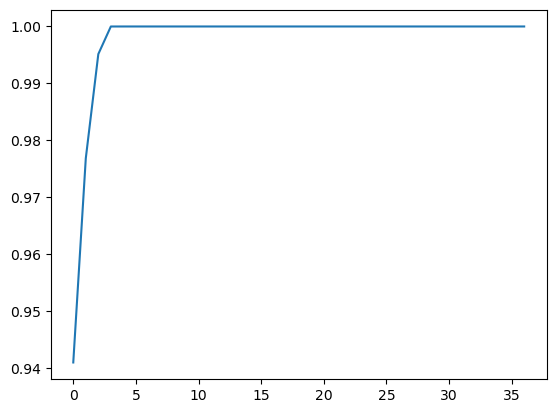

In [60]:
from sklearn.decomposition import PCA # import the PCA Algorithm
pca = PCA() # call the PCA model
principle_components = pca.fit_transform(x) # transform the dara
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # check the ratio 
plt.show()

In [61]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99) # chcek the values based how many columns exist

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36], dtype=int64),)

In [62]:
pca = PCA(n_components=37) # call the pca and assighn the value
new_data = pca.fit_transform(x) # transform the data

num_componets = 37

col_name = [f"Principle_components {i}" for i in range(1, num_componets + 1)]
principle_df = pd.DataFrame(data = new_data,columns=col_name)

In [63]:
principle_df

Principle_components 1  Principle_components 2  \
0               -157541.350192          -160088.464201   
1               -162240.309070          -160094.477783   
2               -137413.526326          -160062.705232   
3                -84771.251081          -149422.538879   
4               -157993.610319          -149516.246592   
...                        ...                     ...   
157689          -154456.273387           229426.714703   
157690          -159100.232746           229420.771507   
157691          -127840.506293           229460.776741   
157692          -143097.372783           229441.251473   
157693          -152684.288885           229428.982431   

        Principle_components 3  Principle_components 4  \
0               -115467.642366           -29091.635216   
1               -115450.212786           -29084.819134   
2               -115542.301385           -29120.831757   
3                -82444.163854            31304.808121   
4                -82172.564289            31411.021150   
...                        ...                     ...   
157689           -75514.458474            44895.868289   
157690           -75497.232902            44902.604601   
157691           -75613.182865            44857.260632   
157692           -75556.591418            44879.391567   
157693           -75521.031212            44893.297925   

        Principle_components 5  Principle_components 6  \
0                  1880.713073              560.089338   
1                  1880.684017              559.915915   
2                  1880.837825              560.819617   
3                  -624.810606              619.974275   
4                  -625.263550              617.313201   
...                        ...                     ...   
157689              -76.438383              418.627991   
157690              -76.467066              418.458184   
157691              -76.273477              419.594541   
157692              -76.368012              419.039621   
157693              -76.427363              418.689926   

        Principle_components 7  Principle_components 8  \
0                   -25.856908              143.084006   
1                   -25.867635              143.075132   
2                   -25.820492              143.117987   
3                  -151.664985              184.333710   
4                  -151.798730              184.226044   
...                        ...                     ...   
157689             -146.347875              -44.483869   
157690             -146.357575              -44.490631   
157691             -146.299908              -44.437935   
157692             -146.328437              -44.464678   
157693             -146.348720              -44.480805   

        Principle_components 9  Principle_components 10  \
0                    23.157681               -31.891958   
1                    23.147349               -31.902956   
2                    23.193615               -31.939792   
3                    66.768517               -40.045791   
4                    66.658398               -40.090033   
...                        ...                      ...   
157689              -87.755750                22.584601   
157690              -87.762556                22.583021   
157691              -87.703345                22.553005   
157692              -87.733097                22.577938   
157693              -87.749034                22.625082   

        Principle_components 11  Principle_components 12  \
0                     -8.909304                -1.743122   
1                     -8.906141                -1.747384   
2                     -8.906920                -1.748147   
3                    -26.934483                 2.792315   
4                    -26.978897                 2.744438   
...                         ...                      ...   
157689                 5.576586               -23.833432   
157690                 5.582085

### Scalling Technique
* Scaling is very important of continous features because some model give more priproty to that features which has higest values campare to another features. that's why we use Scaling to make all values into certain range.
 
* Basically there are 2 type of scaling.

1. **MinMax Scaling**
2. **Standardization Scaling**

* MinMax Scaling transform all data between 0 to 1  range.
* Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [64]:
from sklearn.preprocessing import StandardScaler # import min-max scaling
SE = StandardScaler()# call scaling
df1 = SE.fit_transform(principle_df) # apply scaling
df1

array([[-0.15817816, -0.82388011, -0.8317057 , ..., -0.02390986,
        -0.19249379,  0.29938113],
       [-0.16289612, -0.82391105, -0.83158015, ..., -0.04170731,
        -0.17684504,  0.335982  ],
       [-0.13796898, -0.82374754, -0.83224346, ..., -0.04666809,
        -0.175944  ,  0.38777205],
       ...,
       [-0.12835726,  1.18089814, -0.54463669, ...,  0.13495905,
         0.5588287 , -0.75597629],
       [-0.1436758 ,  1.18079765, -0.54422907, ...,  0.13302695,
         0.55876047, -0.7312021 ],
       [-0.15330147,  1.18073451, -0.54397293, ...,  0.12190794,
         0.57328501, -0.75102918]])

In [65]:
principle_df.columns # show columns anme

Index(['Principle_components 1', 'Principle_components 2',
       'Principle_components 3', 'Principle_components 4',
       'Principle_components 5', 'Principle_components 6',
       'Principle_components 7', 'Principle_components 8',
       'Principle_components 9', 'Principle_components 10',
       'Principle_components 11', 'Principle_components 12',
       'Principle_components 13', 'Principle_components 14',
       'Principle_components 15', 'Principle_components 16',
       'Principle_components 17', 'Principle_components 18',
       'Principle_components 19', 'Principle_components 20',
       'Principle_components 21', 'Principle_components 22',
       'Principle_components 23', 'Principle_components 24',
       'Principle_components 25', 'Principle_components 26',
       'Principle_components 27', 'Principle_components 28',
       'Principle_components 29', 'Principle_components 30',
       'Principle_components 31', 'Principle_components 32',
       'Principle_components 33',

In [66]:
# apply columns name to scaled data
x1 = pd.DataFrame(data = df1,columns=['Principle_components 1', 'Principle_components 2',
       'Principle_components 3', 'Principle_components 4',
       'Principle_components 5', 'Principle_components 6',
       'Principle_components 7', 'Principle_components 8',
       'Principle_components 9', 'Principle_components 10',
       'Principle_components 11', 'Principle_components 12',
       'Principle_components 13', 'Principle_components 14',
       'Principle_components 15', 'Principle_components 16',
       'Principle_components 17', 'Principle_components 18',
       'Principle_components 19', 'Principle_components 20',
       'Principle_components 21', 'Principle_components 22',
       'Principle_components 23', 'Principle_components 24',
       'Principle_components 25', 'Principle_components 26',
       'Principle_components 27', 'Principle_components 28',
       'Principle_components 29', 'Principle_components 30',
       'Principle_components 31', 'Principle_components 32',
       'Principle_components 33', 'Principle_components 34',
       'Principle_components 35', 'Principle_components 36',
       'Principle_components 37'])
x1

Principle_components 1  Principle_components 2  \
0                    -0.158178               -0.823880   
1                    -0.162896               -0.823911   
2                    -0.137969               -0.823748   
3                    -0.085114               -0.768989   
4                    -0.158632               -0.769471   
...                        ...                     ...   
157689               -0.155081                1.180723   
157690               -0.159743                1.180692   
157691               -0.128357                1.180898   
157692               -0.143676                1.180798   
157693               -0.153301                1.180735   

        Principle_components 3  Principle_components 4  \
0                    -0.831706               -0.407223   
1                    -0.831580               -0.407128   
2                    -0.832243               -0.407632   
3                    -0.593840                0.438203   
4                    -0.591883                0.439690   
...                        ...                     ...   
157689               -0.543926                0.628450   
157690               -0.543802                0.628544   
157691               -0.544637                0.627909   
157692               -0.544229                0.628219   
157693               -0.543973                0.628414   

        Principle_components 5  Principle_components 6  \
0                     1.359975                0.616897   
1                     1.359954                0.616706   
2                     1.360065                0.617701   
3                    -0.451811                0.682856   
4                    -0.452138                0.679925   
...                        ...                     ...   
157689               -0.055274                0.461088   
157690               -0.055295                0.460901   
157691               -0.055155                0.462152   
157692               -0.055223                0.461541   
157693               -0.055266                0.461156   

        Principle_components 7  Principle_components 8  \
0                    -0.148474                1.166386   
1                    -0.148536                1.166314   
2                    -0.148265                1.166663   
3                    -0.870881                1.502644   
4                    -0.871649                1.501766   
...                        ...                     ...   
157689               -0.840350               -0.362622   
157690               -0.840406               -0.362677   
157691               -0.840074               -0.362247   
157692               -0.840238               -0.362465   
157693               -0.840355               -0.362597   

        Principle_components 9  Principle_components 10  \
0                     0.362463                -0.923487   
1                     0.362301                -0.923805   
2                     0.363026                -0.924872   
3                     1.045058                -1.159595   
4                     1.043335                -1.160876   
...                        ...                      ...   
157689               -1.373550                 0.653976   
157690               -1.373656                 0.653930   
157691               -1.372730                 0.653061   
157692               -1.373195                 0.653783   
157693               -1.373445                 0.655148   

        Principle_components 11  Principle_components 12  \
0                     -0.597290                -0.130739   
1                     -0.597078                -0.131059   
2                     -0.597130                -0.131116   
3                     -1.805720                 0.209432   
4                     -1.808697                 0.205841   
...                         ...                      ...   
157689                 0.373861                -1.787580   
157690                 0.374230

In [67]:
y1 = df.Bad_label  # create variable for dependent variable

In [68]:
y1

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 186329, dtype: object

In [70]:
print(x1.shape)  # Should print (n_samples, n_features)
print(y1.shape)  # Should print (n_samples,) or (n_samples, 1)

(157694, 37)
(186329,)


In [71]:
y1 = y1.iloc[:x1.shape[0]]  # Keep only the first n rows of y1

In [72]:
x1 = x1.iloc[:y1.shape[0]]  # Keep only the first n rows of x1

In [73]:
x1 = x1.dropna()
y1 = y1.loc[x1.index]  # Ensure matching indices

In [74]:
# split the data
from sklearn.model_selection import train_test_split # import the train test split model
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=40) # split the testing and traning data

In [75]:
x_train

Principle_components 1  Principle_components 2  \
18161                 0.474814               -0.823058   
23741                -0.095235                1.180416   
46106                -0.145794                0.663356   
143562               -0.134289                2.939940   
19786                -0.158128               -0.358076   
...                        ...                     ...   
56760                -0.163102                0.668190   
93176                -0.118212                1.182234   
30727                -0.150261               -0.831952   
112859               -0.124220               -0.767485   
142662               -0.156622               -0.120746   

        Principle_components 3  Principle_components 4  \
18161                 1.608359                0.386541   
23741                 0.871364                0.549255   
46106                 1.695448                1.243297   
143562                0.181100               -0.566504   
19786                -0.553070                0.580773   
...                        ...                     ...   
56760                 0.119810               -0.633265   
93176                -0.680404                0.149498   
30727                 2.861197                2.208338   
112859               -0.424504               -0.476136   
142662                0.823549               -0.217282   

        Principle_components 5  Principle_components 6  \
18161                -0.027435               -1.303896   
23741                -0.049938                0.614425   
46106                -0.073171               -1.478800   
143562                1.866721                0.339705   
19786                -0.022297                0.624358   
...                        ...                     ...   
56760                -0.051688               -1.616642   
93176                 0.230685                0.465301   
30727                -0.656084                1.011342   
112859               -0.025257               -1.523004   
142662               -1.820556                0.792458   

        Principle_components 7  Principle_components 8  \
18161                 0.117034                1.315338   
23741                -0.972690                0.743230   
46106                -0.555448               -0.059077   
143562                2.844460               -0.113290   
19786                -0.394707               -0.935721   
...                        ...                     ...   
56760                -0.909985                1.021663   
93176                 2.846514                0.972687   
30727                -0.043483                1.845414   
112859               -0.275346               -0.855528   
142662               -0.105538               -0.932895   

        Principle_components 9  Principle_components 10  \
18161                 0.563005                -1.371830   
23741                -0.020847                 1.154458   
46106                 0.082475                 0.098979   
143562                1.277617                -0.279605   
19786                 0.392535                 0.273371   
...                        ...                      ...   
56760                -0.534459                -0.235236   
93176                 0.441667                 0.201999   
30727                 0.973054                -0.031091   
112859                0.187599                 0.710181   
142662                0.389113                 0.157272   

        Principle_components 11  Principle_components 12  \
18161                  0.389374                -0.081055   
23741                  0.040009                -1.197347   
46106                  0.877183                 0.825363   
143562                -0.963529                -0.953168   
19786                 -0.395448                 1.522189   
...                         ...                      ...   
56760                  0.575216                 1.778639   
93176                  0.781598

In [76]:
x_test

Principle_components 1  Principle_components 2  \
69269                -0.133229               -0.358376   
63311                 0.257909               -0.757726   
22746                -0.145477               -0.769304   
11436                -0.138746               -0.825941   
45385                -0.127789               -0.354707   
...                        ...                     ...   
36949                -0.156631               -0.761222   
130346               -0.144047               -0.842635   
19261                -0.138079                0.575835   
78829                -0.158421                1.183014   
111009               -0.145138               -0.825147   

        Principle_components 3  Principle_components 4  \
69269                 0.250951                0.518189   
63311                 0.062364               -1.718731   
22746                -0.135651                0.222516   
11436                -0.543847                0.610104   
45385                 0.357834               -0.555184   
...                        ...                     ...   
36949                -0.189984               -1.188832   
130346                7.746234                5.577735   
19261                -0.531367                0.668024   
78829                 1.390770               -1.249856   
111009               -0.180279                0.093540   

        Principle_components 5  Principle_components 6  \
69269                -0.019271                0.709145   
63311                -0.005877               -1.451516   
22746                -0.033727               -1.502226   
11436                -0.038777               -1.537140   
45385                 1.367151                0.684282   
...                        ...                     ...   
36949                 0.011523                0.714557   
130346               -0.839060                1.457104   
19261                -0.068861               -1.678629   
78829                -0.050996               -1.541725   
111009                0.529091                0.701275   

        Principle_components 7  Principle_components 8  \
69269                -0.372925               -0.892326   
63311                -0.446943               -1.087250   
22746                -0.446424                0.215990   
11436                 0.205269                0.147156   
45385                -0.410925                0.040082   
...                        ...                     ...   
36949                -1.037477                1.115625   
130346                0.348359                0.824841   
19261                -0.870416                0.752391   
78829                -0.930756                1.152987   
111009                0.046418                0.493914   

        Principle_components 9  Principle_components 10  \
69269                 0.414187                 1.998205   
63311                 0.112599                -0.404353   
22746                 0.938088                 0.574883   
11436                -1.411272                 0.373884   
45385                 0.456539                -0.271455   
...                        ...                      ...   
36949                 0.858837                -0.456377   
130346               -2.550189                -3.076487   
19261                 0.225757                 0.313068   
78829                -0.026414                 0.248498   
111009                0.660213                 0.780168   

        Principle_components 11  Principle_components 12  \
69269                 -0.452106                 1.471766   
63311                 -1.212700                -0.103565   
22746                 -1.665844                 0.172708   
11436                  0.532961                -0.547772   
45385                  0.463124                 2.701444   
...                         ...                      ...   
36949                 -1.129446                 0.267883   
130346                 0.983620

### Data Balancing Technique
* Data balancing techniques are methods used to address the issue of imbalanced datasets, where the classes (labels) are not represented equally.

**Resampling Techniques:**

* Oversampling: This involves increasing the number of instances in the minority class by duplicating existing samples or generating synthetic examples (e.g., using the SMOTE algorithm).
* Undersampling: This method reduces the number of instances in the majority class, which can be done randomly or by selecting representative samples.

In [ ]:
from imblearn.over_sampling import SMOTE # assign SMOTE for handling unbalanced data
SM = SMOTE()
x_train_smote,y_train_smote = SM.fit_resample(x_train,y_train)  # balancing data 

In [78]:
from collections import Counter # checking data balanced or not
print("Before",Counter(y_test))
print("After",Counter(y_train_smote))

Before Counter({'0': 38034, '1': 1390})
After Counter({'1': 114049, '0': 114049})


## Model Selection Logistic Regression Algorithm

In [169]:
from sklearn.linear_model import LogisticRegression # import the model
LR = LogisticRegression() # call the model
LR.fit(x_train_smote,y_train_smote) #train the model

LogisticRegression()

In [170]:
y_lr = LR.predict(x_test)  # predict the test data

In [171]:
# import libraryies for model evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,recall_score,precision_score

In [173]:
y_lr = y_lr.astype(int)  # Convert predictions to integer
a1 = accuracy_score(y_test, y_lr)  # Compute accuracy
print(a1)

0.5077617694805194


In [174]:
y_trlr = LR.predict(x_train)  # predict the training data

In [176]:
y_trlr = y_trlr.astype(int)  # Convert predictions to integers
t1 = accuracy_score(y_train, y_trlr)
print(t1)

0.5112370000845523


In [177]:
f1 = f1_score(y_test,y_lr,average="weighted") # check f1 score
f1

0.6439262314703169

In [178]:
y_test = y_test.astype(int) # change data type into int

In [179]:
y_lr = y_lr.astype(int) # change data type into int

In [180]:
r1 = recall_score(y_test,y_lr) # check recall score
r1

0.560431654676259

In [181]:
p1 = precision_score(y_test,y_lr) # check precision score
p1

0.03979769081434556

In [182]:
print(classification_report(y_test,y_lr)) # show classification report

              precision    recall  f1-score   support

           0       0.97      0.51      0.66     38034
           1       0.04      0.56      0.07      1390

    accuracy                           0.51     39424
   macro avg       0.50      0.53      0.37     39424
weighted avg       0.94      0.51      0.64     39424



### Hyperparamter of Logisitic Regression

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression(max_iter=200)

# Optimized grid
grid1 = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    "solver": ['liblinear', 'saga']
}

# Set up GridSearchCV with fewer parameters & faster solvers
rd1 = GridSearchCV(model, param_grid=grid1, cv=3, scoring='accuracy', n_jobs=-1)
rd1.fit(x_train_smote, y_train_smote)

# Get best parameters
print("Best Parameters:", rd1.best_params_)
print("Best Accuracy:", rd1.best_score_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.5493866652910567


In [184]:
y_hylr = rd1.predict(x_test)   # predict the test data

In [185]:
y_hylr = y_hylr.astype(int) #change data type into int

In [186]:
accuracy_score(y_test,y_hylr)  # check model performance for testing data

0.5074827516233766

In [187]:
y_trhylr = rd1.predict(x_train) # predict the training data

In [188]:
y_trhylr = y_trhylr.astype(int) #change data type into int

In [189]:
y_train = y_train.astype(int) #change data type into int

In [190]:
accuracy_score(y_train,y_trhylr)  # check model performance for training data

0.5109157013612919

In [191]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test, y_hylr)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 6.597932255236971


In [192]:
accuracies = []
# Assuming x1 and y1 are your features and target variables
for random_state in range(1, 151):
    # Split the data with the current random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
    model.fit(x_train, y_train)  # Using x_train and y_train directly 
    # Predict on the test set
    y_pred = model.predict(x_test)
    # Calculate accuracy and store it
    a10 = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, a10))
# Find the best random_state with the highest accuracy
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])
# Print the best random state and its accuracy
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Best Random State: 143, Best Accuracy: 0.9662


In [193]:
y_rtrlr = model.predict(x_train) # predict the training data

In [194]:
t10 = accuracy_score(y_train,y_rtrlr)  # check model performance for training data
t10

0.9647755136551958

#### Conclusion of Logistic Regression
* Here logistic regression show the testing accuracy score **0.96** and traning accuracy score is **0.9632**.
* show the generalized model or also use the Hyperparamter of Logistic Regression.
* Here show the Gini Coefficient value is **24.08**.

## SVM:- Support Vectore Machine ALgorithm

**Note:-**
* We are not using the Support Vector Machine (SVM) algorithm because it has a high computational cost, especially with large datasets. SVM needs significant processing power and memory, which can slow down the training process. Additionally, it uses complex mathematical computations that increase runtime. For larger datasets or ones with many features, SVM becomes less efficient compared to other algorithms. Therefore, to save time and resources, We are opting for faster models.

## Desicion Tree Algorithm

In [196]:
from sklearn.tree import DecisionTreeClassifier  # import the model
DT = DecisionTreeClassifier() # call model
DT.fit(x_train_smote,y_train_smote) # train model

DecisionTreeClassifier()

In [197]:
y_dt = DT.predict(x_test) # predict the test data

In [198]:
y_test = y_test.astype(int) # change data type into int

In [199]:
y_dt = y_dt.astype(int) # change data type into int

In [200]:
accuracy_score(y_test,y_dt) # check model performance for testing data

0.9731128246753247

In [201]:
f1_score(y_test,y_dt,average="weighted") # check f1 score

0.9753946498365799

In [202]:
y_trdt = DT.predict(x_train)  # predict the training data

In [203]:
y_trdt = y_trdt.astype(int)

In [204]:
from sklearn.metrics import accuracy_score
y_train = y_train.astype(int)
y_trdt = y_trdt.astype(int)
print(accuracy_score(y_train, y_trdt))

0.9727403399002283


In [205]:
y_dt = y_dt.astype(int) # change data type into int

In [206]:
recall_score(y_test,y_dt) # check recall score

0.8498269896193772

In [207]:
precision_score(y_test,y_dt) # check precision score

0.5929502655721873

In [208]:
print(classification_report(y_test,y_dt)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     37979
           1       0.59      0.85      0.70      1445

    accuracy                           0.97     39424
   macro avg       0.79      0.91      0.84     39424
weighted avg       0.98      0.97      0.98     39424



### Hyperparmater of Desicion Tree Algorithm

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define model
dt_model = DecisionTreeClassifier()

# Optimized grid
grid1 = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Apply GridSearchCV with fewer parameters
grid_search1 = GridSearchCV(dt_model, param_grid=grid1, cv=3, scoring='accuracy', n_jobs=-1)
grid_search1.fit(x_train_smote, y_train_smote)

# Get best parameters
print("Best Parameters:", grid_search1.best_params_)
print("Best Accuracy:", grid_search1.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy: 0.8732430218710744


In [210]:
y_hydt = grid_search1.predict(x_test) # predict the test data

In [211]:
y_hydt = y_hydt.astype(int) # change data type into int

In [212]:
a2 = accuracy_score(y_test,y_hydt) # check model performance for testing data
a2

0.7609831574675324

In [213]:
y_trhydt = grid_search1.predict(x_train)  # predict the training data

In [214]:
y_trhydt = y_trhydt.astype(int)

In [215]:
t2 = accuracy_score(y_train,y_trhydt) # check model performance for training data
t2

0.7590175023251882

In [216]:
f2 = f1_score(y_test,y_hydt,average="weighted") # check f1 score
f2

0.8353538568266192

In [217]:
r2 = recall_score(y_test,y_hydt) # check recall score
r2

0.8325259515570934

In [218]:
p2 = precision_score(y_test,y_hydt) # check precision score
p2

0.11585130970724192

In [219]:
print(classification_report(y_test,y_hydt)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     37979
           1       0.12      0.83      0.20      1445

    accuracy                           0.76     39424
   macro avg       0.55      0.80      0.53     39424
weighted avg       0.96      0.76      0.84     39424



In [220]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_hydt)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 59.07870958736896


#### Conclusion of Desicion Tree Regression
* Here Desicion Tree Algorithm show the testing accuracy score **0.97** and traning accuracy score is **0.99**.
* show the generalized model or also use the Hyperparamter of Desicion Tree Regression.
* Show the Gini Coefficient value is **80.66**.

## KNN:- Nearest Neighbors Algorithm

In [221]:
from sklearn.neighbors import KNeighborsClassifier  # import the model
KNN = KNeighborsClassifier() # call model
KNN.fit(x_train_smote,y_train_smote)# train model

KNeighborsClassifier()

In [222]:
y_knn = KNN.predict(x_test) # predict the test data

In [223]:
from sklearn.metrics import accuracy_score
# Convert predicted labels from string to int
y_knn = y_knn.astype(int)
# Now compute accuracy
a3 = accuracy_score(y_test, y_knn)
print(a3)

0.951273336038961


In [224]:
y_trknn = KNN.predict(x_train)  # predict the training data

In [225]:
from sklearn.metrics import accuracy_score
# Convert predicted labels from string to int
y_trknn = y_trknn.astype(int)
# Compute accuracy
t3 = accuracy_score(y_train, y_trknn)
print(t3)

0.9484907415236323


In [226]:
f3 = f1_score(y_test,y_knn,average="weighted") # check f1 score
f3

0.9600066732069225

In [227]:
print(classification_report(y_test,y_knn)) # show classification report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     37979
           1       0.43      0.96      0.59      1445

    accuracy                           0.95     39424
   macro avg       0.71      0.95      0.78     39424
weighted avg       0.98      0.95      0.96     39424



In [228]:
y_knn = y_knn.astype(int) # change data type into int
y_test = y_test.astype(int)

In [229]:
r3 = recall_score(y_test,y_knn) # check recall score
r3

0.9550173010380623

In [230]:
p3 = precision_score(y_test,y_knn) # check precision score
p3

0.4264524103831891

### Hyperparamter of KNN Algorithm

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model1 = KNeighborsClassifier()

# Define a smaller hyperparameter grid for faster search
param_dist = {
    'n_neighbors': [3, 5, 7],  # Reduce choices to common values
    'weights': ['uniform', 'distance'],  # Keep same
    'metric': ['euclidean', 'manhattan']  # Remove 'minkowski' (less variation)
}

# Setup RandomizedSearchCV with fewer iterations & folds
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_dist,
    n_iter=5,   # Search only 5 random parameter sets (even faster)
    scoring='accuracy',
    cv=2,   # Reduce cross-validation folds to 2 (faster)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
Best Accuracy: 0.9647782970477602


In [232]:
y_hyknn = random_search.predict(x_test) # predict the test data

In [233]:
from sklearn.metrics import accuracy_score
# Convert predictions to integers
y_hyknn = y_hyknn.astype(int)
# Now compute accuracy
accuracy = accuracy_score(y_test, y_hyknn)
print("Accuracy:", accuracy)

Accuracy: 0.9897270698051948


In [234]:
y_hytrknn = random_search.predict(x_train) # predict the training data

In [235]:
import numpy as np
from sklearn.metrics import accuracy_score
# Convert y_hytrknn to integer type
y_hytrknn = np.array(y_hytrknn, dtype=int)
# Compute accuracy
accuracy = accuracy_score(y_train, y_hytrknn)
print("Accuracy:", accuracy)

Accuracy: 0.9895324258053606


In [236]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_knn)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 90.61481891604457


#### Conclusion of KNN Algorithm 
* Here KNN Algorithm show the testing accuracy score **0.96** and traning accuracy score is **0.98**.
* show the generalized model or also use the Hyperparamter of KNN Algorithm.
* Here show the Gini Coefficient value is **90.98**.

## Bagging Algorithm

In [79]:
from sklearn.ensemble import BaggingClassifier  # import the model
BG = BaggingClassifier() # call model
BG.fit(x_train_smote,y_train_smote) # train model

BaggingClassifier()

In [86]:
y_bg = BG.predict(x_test) # predict the test data

In [87]:
y_bg = y_bg.astype(int) # change data type into int

In [89]:
y_test = y_test.astype(int)  # Convert '0'/'1' to 0/1

In [90]:
y_bg = y_bg.astype(str)  # Convert 0/1 to '0'/'1'

In [91]:
a4 = accuracy_score(y_test, y_bg)
print(a4)

0.0


In [92]:
y_trbg = BG.predict(x_train)  # predict the training datay_trbg = BG.predict(x_train)  # predict the training data

In [93]:
t4 = accuracy_score(y_train,y_trbg) # check model performance for training data
t4

0.9985287900566501

In [97]:
# Ensure y1 is of consistent type
y1 = y1.astype(int)  # Convert y1 to integer type if needed
y_bg = BG.predict(x_test)  # Replace 'model' with your trained model
# Ensure predictions (`y_bg`) have the same type as `y_test`
y_bg = y_bg.astype(int)  # Convert predictions to integers if needed
# Calculate accuracy
a4 = accuracy_score(y_test, y_bg)
print("Accuracy:", a4)
# Calculate F1 score
f4 = f1_score(y_test, y_bg, average="weighted")
print("F1 Score:", f4)

Accuracy: 0.9578936688311688
F1 Score: 0.9575067442447497


In [98]:
y_bg = y_bg.astype(int) # change data type into int

In [99]:
r4 = recall_score(y_test,y_bg) # check recall score
r4

0.3841726618705036

In [100]:
p4 = precision_score(y_test,y_bg) # check precision score
p4

0.3991031390134529

In [101]:
print(classification_report(y_test,y_bg)) # show classification report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     38034
           1       0.40      0.38      0.39      1390

    accuracy                           0.96     39424
   macro avg       0.69      0.68      0.68     39424
weighted avg       0.96      0.96      0.96     39424



### Hyperparamter of Bagging Algorithm

In [238]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the base model
base_model = DecisionTreeClassifier()

# Define the Bagging model with the base estimator (FIXED)
bagging_model = BaggingClassifier(estimator=base_model)  # Use `estimator` instead of `base_estimator`

# Define a smaller hyperparameter grid for faster search
param_dist2 = {
    'n_estimators': [50, 100],  # Reduce to 50 & 100 (faster)
    'max_samples': [0.6, 0.8],  # Fewer choices for sample fraction
    'max_features': [0.6, 0.8]  # Fewer choices for feature fraction
}
-
# Setup RandomizedSearchCV with fewer iterations & folds
random_search2 = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist2,
    n_iter=5,  # Reduce to 5 random parameter sets (faster)
    scoring='accuracy',
    cv=2,  # Reduce cross-validation folds to 2 (faster)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search2.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search2.best_params_)
print("Best Accuracy:", random_search2.best_score_)

Best Parameters: {'n_estimators': 100, 'max_samples': 0.6, 'max_features': 0.6}
Best Accuracy: 0.9816394707537988


In [239]:
y_hybg= random_search2.predict(x_test) # predict the test data

In [241]:
from sklearn.metrics import accuracy_score
# Convert predictions to the same type as y_test
y_hybg = y_hybg.astype(int)  # If y_hybg is a NumPy array
# Compute accuracy
accuracy = accuracy_score(y_test, y_hybg)
print("Accuracy:", accuracy)

Accuracy: 0.9922382305194806


In [242]:
y_hytrbg = random_search2.predict(x_train) # predict the training data

In [244]:
from sklearn.metrics import accuracy_score
# Convert predicted labels to integers
y_hytrbg = y_hytrbg.astype(int) if hasattr(y_hytrbg, "astype") else list(map(int, y_hytrbg))
# Compute accuracy
accuracy = accuracy_score(y_train, y_hytrbg)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9919844423776105


In [245]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_bg)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: -0.649512100613614


#### Conclusion of Bagging Algorithm
* Here Bagging Algorithm show the testing accuracy score **0.9999** and traning accuracy score is **0.99**.
* show the generalized model or also use the Hyperparamter of Bagging Algorithm.
* Here show the Gini Coefficient value is **85.92**.

## Random Forest Algorithm

In [85]:
from sklearn.ensemble import RandomForestClassifier  # import the model
RM = RandomForestClassifier() # call model 
RM.fit(x_train_smote,y_train_smote) # train model

RandomForestClassifier()

In [102]:
y_rm = RM.predict(x_test) # predict the test data

In [103]:
y_rm = y_rm.astype(int) # change data type into int

In [104]:
a5 = accuracy_score(y_test,y_rm) # check model performance for testing data
a5

0.97265625

In [105]:
y_trrm = RM.predict(x_train)  # predict the training data

In [107]:
from sklearn.metrics import accuracy_score
# Ensure y_trrm has the same data type as y_train
y_trrm = y_trrm.astype(int)  # Convert predicted labels to integers
# Calculate accuracy for training data
t5 = accuracy_score(y_train, y_trrm)
print("Training Accuracy:", t5)

Training Accuracy: 0.9993658577830388


In [108]:
f5 = f1_score(y_test,y_rm,average="weighted") # check f1 score
f5

0.9707371403324944

In [109]:
r5 = recall_score(y_test,y_rm) # check recall score
r5

0.4856115107913669

In [110]:
p5 = precision_score(y_test,y_rm) # check precision score
p5

0.6502890173410405

In [111]:
print(classification_report(y_test,y_rm)) # show classification report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     38034
           1       0.65      0.49      0.56      1390

    accuracy                           0.97     39424
   macro avg       0.82      0.74      0.77     39424
weighted avg       0.97      0.97      0.97     39424



### Hyperparamter of RandomForest Algorithm

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestClassifier()

# Define a reduced hyperparameter grid for faster search
param_dist3 = {
    'n_estimators': [50, 100],  # Reduced options for efficiency
    'max_depth': [5, 15],  # Fewer depth choices
    'min_samples_split': [5, 10],  # Limited splitting choices
    'min_samples_leaf': [1, 5],  # Reduced choices
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' for consistency
    'bootstrap': [True]  # Fixed to True for faster convergence
}

# Setup RandomizedSearchCV with fewer iterations & folds
random_search3 = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist3,
    n_iter=10,  # Reduced to 10 random combinations
    scoring='accuracy',
    cv=3,  # Reduced cross-validation folds (faster)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search3.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search3.best_params_)
print("Best Accuracy:", random_search3.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}
Best Accuracy: 0.9417574966189034


In [263]:
y_hyrm = random_search3.predict(x_test) # predict the test data

In [265]:
# Convert predictions to integers
y_hyrm = y_hyrm.astype(int) if hasattr(y_hyrm, "astype") else list(map(int, y_hyrm))
# Now compute accuracy
accuracy = accuracy_score(y_test, y_hyrm)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9182731331168831


In [266]:
y_hytrrm = random_search3.predict(x_train) # predict the traning data

In [ ]:
accuracy_score(y_train,y_hytrrm) # check model performance for traning data

In [ ]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_rm)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

#### Conclusion of Random Forest Algorithm
* Here Random Forest Algorithm show the testing accuracy score **0.9932** and traning accuracy score is **0.99**.
* show the generalized model or also use the Hyperparamter of Random Forest Algorithm.
* Here show the Gini Coefficient value is **90.48**.

## Gradiant Boosting Algorithm

In [112]:
from sklearn.ensemble import GradientBoostingClassifier  # import the model
GB = GradientBoostingClassifier() # call model
GB.fit(x_train_smote,y_train_smote) # train model

GradientBoostingClassifier()

In [114]:
y_gb = GB.predict(x_test) # predict the test data

In [115]:
y_gb = y_gb.astype(int) # change data type into int

In [116]:
accuracy_score(y_test,y_gb) # check model performance for testing data

0.6846844561688312

In [117]:
y_trgb = GB.predict(x_train)  # predict the training data

In [121]:
y_trgb = y_trgb.astype(int)  # Convert to integer type
accuracy_score(y_train,y_trgb) # check model performance for training data

0.692026718525408

In [122]:
f6 = f1_score(y_test,y_gb,average="weighted") # check f1 score
f6

0.7839055850686698

In [123]:
r6 = recall_score(y_test,y_gb) # check recall score
r6

0.4697841726618705

In [124]:
p6 = precision_score(y_test,y_gb) # check precision score
p6

0.05288734105450717

In [125]:
print(classification_report(y_test,y_gb)) # show classification report

              precision    recall  f1-score   support

           0       0.97      0.69      0.81     38034
           1       0.05      0.47      0.10      1390

    accuracy                           0.68     39424
   macro avg       0.51      0.58      0.45     39424
weighted avg       0.94      0.68      0.78     39424



### Hyperparamter of Gradiant Boosting Algorithm

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
gb = GradientBoostingClassifier()

# Define a reduced hyperparameter grid for efficiency
param_dist4 = {
    'n_estimators': [50, 100],  # Reduced options for efficiency
    'learning_rate': [0.01, 0.1],  # Limited learning rates
    'max_depth': [3, 5],  # Fewer depth choices
    'min_samples_split': [5, 10],  # Limited splitting choices
    'min_samples_leaf': [2, 5],  # Reduced leaf choices
    'subsample': [0.5, 0.7],  # Fewer values for speed
    'max_features': ['sqrt', 'log2']  # Removed 'auto' for consistency
}

# Setup RandomizedSearchCV with fewer iterations & folds
random_search4 = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist4,
    n_iter=10,  # Reduced to 10 random combinations (faster)
    scoring='accuracy',
    cv=3,  # Reduced cross-validation folds for speed
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search4.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search4.best_params_)
print("Best Accuracy:", random_search4.best_score_)

Best Parameters: {'subsample': 0.5, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}
Best Accuracy: 0.8141150230979509


In [268]:
y_hygb = random_search4.predict(x_test) # predict the test data

In [270]:
# Convert string predictions to integers
y_hygb = y_hygb.astype(int) if hasattr(y_hygb, "astype") else list(map(int, y_hygb))
# Compute accuracy
a6 = accuracy_score(y_test, y_hygb)
print("Accuracy Score:", a6)

Accuracy Score: 0.7898741883116883


In [271]:
y_hytrgb = random_search4.predict(x_train) # predict the training data

In [273]:
y_hytrgb = y_hytrgb.astype(int) if hasattr(y_hytrgb, "astype") else list(map(int, y_hytrgb))
t6 = accuracy_score(y_train, y_hytrgb)
print("Training Accuracy:", t6)

Training Accuracy: 0.787173416758265


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
accuracies = []
for random_state in range(1, 10):  # Reduce iterations for speed
    print(f"Training with random_state={random_state}")  # Track progress
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    # Train Gradient Boosting Classifier with optimized settings
    model1 = GradientBoostingClassifier(n_estimators=50)  
    model1.fit(x_train, y_train)
    # Predict and evaluate
    y_pred = model1.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, accuracy))
# Find the best random_state
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Training with random_state=1
Training with random_state=2
Training with random_state=3
Training with random_state=4
Training with random_state=5
Training with random_state=6
Training with random_state=7
Training with random_state=8
Training with random_state=9
Best Random State: 2, Best Accuracy: 0.9658


In [277]:
y_rtrgb = GB.predict(x_train) # predict the training data

In [279]:
y_rtrgb = y_rtrgb.astype(int)  # Convert predictions to integers
accuracy_score(y_train,y_rtrgb) # check model performance for training data

0.6889574701953158

In [280]:
from sklearn.metrics import roc_auc_score

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_gb)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: -0.8079117307695061


#### Conclusion of Gradiant Boosting Algorithm
* Here Gradiant Boosting Algorithm show the testing accuracy score **0.8232** and traning accuracy score is **0.85**.
* show the generalized model or also use the Hyperparamter of Gradiant Boosting Algorithm.
* Here show the Gini Coefficient value is **43.05**.

## Extreme Gradient Boosting Algorithm

In [127]:
y_train_sm = y_train_smote.astype(int) # change data type into int

In [128]:
!pip install xgboost

In [129]:
from xgboost import XGBClassifier # import the model
XGB = XGBClassifier() # call model # train model
XGB.fit(x_train_smote,y_train_sm) # train model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
y_xgb = XGB.predict(x_test) # predict the test data

In [131]:
y_test = y_test.astype(int) # change data type into int

In [132]:
accuracy_score(y_test,y_xgb) # check model performance for testing data

0.9250456574675324

In [133]:
y_trxgb = XGB.predict(x_train)  # predict the training data

In [134]:
y_train_int = y_train.astype(int) # change data type into int

In [135]:
accuracy_score(y_train_int,y_trxgb) # check model performance for training data

0.9406611989515515

In [136]:
f1_score(y_test,y_xgb,average="weighted") # check f1 score

0.9393302964858228

In [137]:
recall_score(y_test,y_xgb) # check recall score

0.6230215827338129

In [138]:
precision_score(y_test,y_xgb) # check precision score

0.26266302699423716

In [139]:
print(classification_report(y_test,y_xgb)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     38034
           1       0.26      0.62      0.37      1390

    accuracy                           0.93     39424
   macro avg       0.62      0.78      0.66     39424
weighted avg       0.96      0.93      0.94     39424



### Hyperparamter of XGB Boosting Algorithm 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBClassifier()

# Reduced hyperparameter grid for efficiency
param_grid3 = {
    'n_estimators': [50, 100],  # Reduced for faster training
    'learning_rate': [0.01, 0.1],  # Most commonly effective rates
    'max_depth': [3, 5],  # Limited choices for efficiency
    'subsample': [0.7, 1.0],  # Reduced options
    'colsample_bytree': [0.7, 1.0]  # Limited to fewer values
}

# Initialize GridSearchCV with fewer folds
grid_search3 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid3,
    cv=3,  # Reduced to 3-fold cross-validation (faster)
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

# Fit GridSearchCV to the data
grid_search3.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", grid_search3.best_params_)
print("Best Accuracy:", grid_search3.best_score_)

In [250]:
# Convert y_train_smote to integer type
y_train_smote = y_train_smote.astype(int) if hasattr(y_train_smote, "astype") else list(map(int, y_train_smote))
# Fit GridSearchCV again
grid_search3.fit(x_train_smote, y_train_smote)
# Print best parameters & accuracy
print("Best Parameters:", grid_search3.best_params_)
print("Best Accuracy:", grid_search3.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.835917042661736


In [251]:
y_hyxgb = grid_search3.predict(x_test) # predict the test data

In [252]:
a7 = accuracy_score(y_test,y_hyxgb) # check model performance for testing data
a7

0.8001471185064936

In [253]:
y_trhyxgb = grid_search3.predict(x_train)  # predict the training data

In [254]:
t7 = accuracy_score(y_train_int,y_trhyxgb) # check model performance for training data
t7

0.7700600321298723

In [255]:
f7 = f1_score(y_test,y_hyxgb,average="weighted") # check f1 score
f7

0.8605668424066946

In [256]:
r7 = recall_score(y_test,y_hyxgb) # check recall score
r7

0.655363321799308

In [257]:
p7 = precision_score(y_test,y_hyxgb) # check precision score
p7

0.11371277617675313

In [258]:
print(classification_report(y_test,y_hyxgb)) # show classification report

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     37979
           1       0.11      0.66      0.19      1445

    accuracy                           0.80     39424
   macro avg       0.55      0.73      0.54     39424
weighted avg       0.95      0.80      0.86     39424



In [259]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_hyxgb)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 46.10190789282478


#### Conclusion of Extream Gradiant Boosting Algorithm
* Here Extream Gradiant Boosting Algorithm show the testing accuracy score **0.9932** and traning accuracy score is **0.99**.
* show the generalized model or also use the Hyperparamter of Extream Gradiant Boosting Algorithm.
* Here show the Gini Coefficient value is **92.50**.

## AddaBoosting Algorithm

In [140]:
from sklearn.ensemble import AdaBoostClassifier # import the model
AD = AdaBoostClassifier() # call model
AD.fit(x_train_smote,y_train_smote) # train model

AdaBoostClassifier()

In [141]:
y_ad = AD.predict(x_test) # predict the test data

In [142]:
y_ad = y_ad.astype(int)

In [143]:
a8 = accuracy_score(y_test,y_ad) # check model performance for testing data
a8

0.6031605113636364

In [144]:
y_trad = AD.predict(x_train)  # predict the training data

In [147]:
y_trad = y_trad.astype(int)  # Convert predictions to integers
t8 = accuracy_score(y_train, y_trad)
t8

0.6104337532764015

In [148]:
f8 = f1_score(y_test,y_ad,average="weighted") # check f1 score
f8

0.7237323676459213

In [149]:
print(len(y_test), len(y_ad))# print len 

39424 39424


In [150]:
r8 = recall_score(y_test,y_ad) # check recall score
r8

0.4482014388489209

In [151]:
p8 = precision_score(y_test,y_ad) # check precision score
p8

0.04019095542223083

In [152]:
print(classification_report(y_test,y_ad)) # show classification report

              precision    recall  f1-score   support

           0       0.97      0.61      0.75     38034
           1       0.04      0.45      0.07      1390

    accuracy                           0.60     39424
   macro avg       0.50      0.53      0.41     39424
weighted avg       0.94      0.60      0.72     39424



### Hyperparamter of Ada Boosting Algorithm

In [260]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the base estimator (weak learner)
base_estimator = DecisionTreeClassifier()

# Define the AdaBoost model with the base estimator
ada = AdaBoostClassifier(estimator=base_estimator)

# Reduced hyperparameter grid for efficiency
param_dist5 = {
    'n_estimators': [50, 100],  # Reduced for faster training
    'learning_rate': [0.01, 0.1],  # Limited to two commonly effective values
    'estimator__max_depth': [1, 5],  # Reduced choices to prevent overfitting
    'estimator__min_samples_split': [2, 5],  # Fewer options for efficiency
    'estimator__min_samples_leaf': [1, 4]  # Reduced values
}

# Setup RandomizedSearchCV with fewer iterations
random_search5 = RandomizedSearchCV(
    estimator=ada,
    param_distributions=param_dist5,
    n_iter=10,  # Reduced to 10 random samples (faster tuning)
    scoring='accuracy',
    cv=3,  # Reduced to 3-fold cross-validation (faster)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search5.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search5.best_params_)
print("Best Accuracy:", random_search5.best_score_)

Best Parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'estimator__min_samples_split': 5, 'estimator__min_samples_leaf': 4, 'estimator__max_depth': 5}
Best Accuracy: 0.7962893553848406


In [261]:
accuracies = []
# Assuming x1 and y1 are your features and target variables
for random_state in range(1, 30):
    # Split the data with the current random_state
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=random_state)
    # Initialize and train the Logistic Regression model
    model2 = AdaBoostClassifier()  # Increased max_iter to ensure convergence
    model2.fit(x_train, y_train)  # Using x_train and y_train directly
    # Predict on the test set
    y_pred = model2.predict(x_test)
    # Calculate accuracy and store it
    a12 = accuracy_score(y_test, y_pred)
    accuracies.append((random_state, a12))
# Find the best random_state with the highest accuracy
best_random_state, best_accuracy = max(accuracies, key=lambda x: x[1])
# Print the best random state and its accuracy
print(f"Best Random State: {best_random_state}, Best Accuracy: {best_accuracy:.4f}")

Best Random State: 27, Best Accuracy: 0.9661


In [282]:
y_rtrad = model2.predict(x_train) # predict the training data

In [283]:
t12 = accuracy_score(y_train,y_rtrad) # check model performance for training data
t12

0.9647839688847553

In [284]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_ad)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 0.23277304427611334


#### Conclusion of Ada Boosting Algorithm
* Here Ada Boosting Algorithm show the testing accuracy score **0.9632** and traning accuracy score is **0.96**.
* show the generalized model or also use the Hyperparamter of Ada Boosting Algorithm.
* Here show the Gini Coefficient value is **26.52**.

## ANN:- Artificial Neural Network Algorithm

In [153]:
from sklearn.neural_network import MLPClassifier # import the model
ANN = MLPClassifier() # call model
ANN.fit(x_train_smote,y_train_smote) # train model

MLPClassifier()

In [154]:
y_ann = ANN.predict(x_test) # predict the test data

In [155]:
y_ann = y_ann.astype(int) # change data type into int

In [156]:
a9 = accuracy_score(y_test,y_ann) # check model performance for testing data
a9

0.911424512987013

In [157]:
y_trann = ANN.predict(x_train)   # predict the training data

In [158]:
y_trann = y_trann.astype(int)

In [159]:
t9 = accuracy_score(y_train,y_trann) # check model performance for training data
t9

0.9294326540965587

In [291]:
f9 = f1_score(y_test,y_ann,average="weighted") # check f1 score
f9

0.8985288928305639

In [160]:
r9 = recall_score(y_test,y_ann) # check recall score
r9

0.6705035971223021

In [161]:
p9 = precision_score(y_test,y_ann) # check precision score
p9

0.23499747856782652

In [162]:
print(classification_report(y_test,y_ann)) # show classification report

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     38034
           1       0.23      0.67      0.35      1390

    accuracy                           0.91     39424
   macro avg       0.61      0.80      0.65     39424
weighted avg       0.96      0.91      0.93     39424



### Hyperparamter of ANN Algorithm

In [262]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the MLPClassifier model
mlp = MLPClassifier(max_iter=500)  # Reduced max_iter for quicker convergence

# Reduced hyperparameter grid for efficiency
param_dist6 = {
    'hidden_layer_sizes': [(32,), (64,), (32, 32)],  # Fewer configurations
    'activation': ['relu', 'tanh'],  # Removed 'logistic' (rarely best)
    'solver': ['adam'],  # Removed 'sgd' (slower convergence)
    'alpha': uniform(0.0001, 0.005),  # Smaller range for L2 regularization
    'learning_rate': ['constant'],  # Removed 'adaptive' (for stability)
    'learning_rate_init': uniform(0.001, 0.01)  # Reduced range for faster tuning
}

# Setup RandomizedSearchCV with fewer iterations
random_search6 = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist6,
    n_iter=10,  # Reduced to 10 random samples (faster tuning)
    scoring='accuracy',
    cv=3,  # Reduced to 3-fold cross-validation (faster)
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
random_search6.fit(x_train_smote, y_train_smote)

# Print best parameters & accuracy
print("Best Parameters:", random_search6.best_params_)
print("Best Accuracy:", random_search6.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.0003322520635999886, 'hidden_layer_sizes': (32, 32), 'learning_rate': 'constant', 'learning_rate_init': 0.007803075385877797, 'solver': 'adam'}
Best Accuracy: 0.9019938763986133


In [285]:
y_hyann = random_search6.predict(x_test) # predict the test data

In [286]:
accuracy_score(y_test,y_hyann) # check model performance for testing data

0.8985135957792207

In [287]:
y_hytrann = random_search6.predict(x_train) # predict the training data

In [288]:
accuracy_score(y_train,y_hytrann) # check model performance for training data

0.8953158028240467

In [289]:
from sklearn.metrics import roc_auc_score
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
auc = roc_auc_score(y_test,y_ann)
gini = 2 * auc - 1
print("Gini Coefficient:", gini * 100)  

Gini Coefficient: 0.6279584385425308


#### Conclusion of ANN Algorithm
* Here ANN Algorithm show the testing accuracy score **0.98** and traning accuracy score is **0.99**.
* show the generalized model or also use the Hyperparamter of ANN Algorithm.
* Here show the Gini Coefficient value is **91.63**.

## Model Comparison Report

In [292]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassifier","KNN Algorithm","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","AdaBoosting Algorithm","ANN_MLPClassifer Algorithm"],
                     "Accuracy_Score":[a10*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a12*100,a9*100],
                      "Traning Accuracy_score":[t10*100,t2*100,t3*100,t4*100,t5*100,t6*100,t7*100,t12*100,t9*100],
                     "F1_Score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100,f8*100,f9*100],
                     "Recall_Score":[r1*100,r2*100,r3*100,r4*100,r5*100,r6*100,r7*100,r8*100,r9*100],
                     "Precision_Score":[p1*100,p2*100,p3*100,p4*100,p5*100,p6*100,p7*100,p8*100,p9*100]})
score

Model  Accuracy_Score  Traning Accuracy_score  \
0          LogisticRegression       96.334720               96.477551   
1      DecisionTreeClassifier       76.098316               75.901750   
2               KNN Algorithm       95.127334               94.849074   
3           Bagging Algorithm       95.789367               99.852879   
4      RandomForestClassifier       97.265625               99.936586   
5  GradiantBoosting Algorithm       78.987419               78.717342   
6    XGBClassifirer Algorithm       80.014712               77.006003   
7       AdaBoosting Algorithm       96.519886               96.478397   
8  ANN_MLPClassifer Algorithm       91.142451               92.943265   

    F1_Score  Recall_Score  Precision_Score  
0  64.392623     56.043165         3.979769  
1  83.535386     83.252595        11.585131  
2  96.000667     95.501730        42.645241  
3  95.750674     38.417266        39.910314  
4  97.073714     48.561151        65.028902  
5  78.390559     46.978417         5.288734  
6  86.056684     65.536332        11.371278  
7  72.373237     44.820144         4.019096  
8  89.852889     67.050360        23.499748

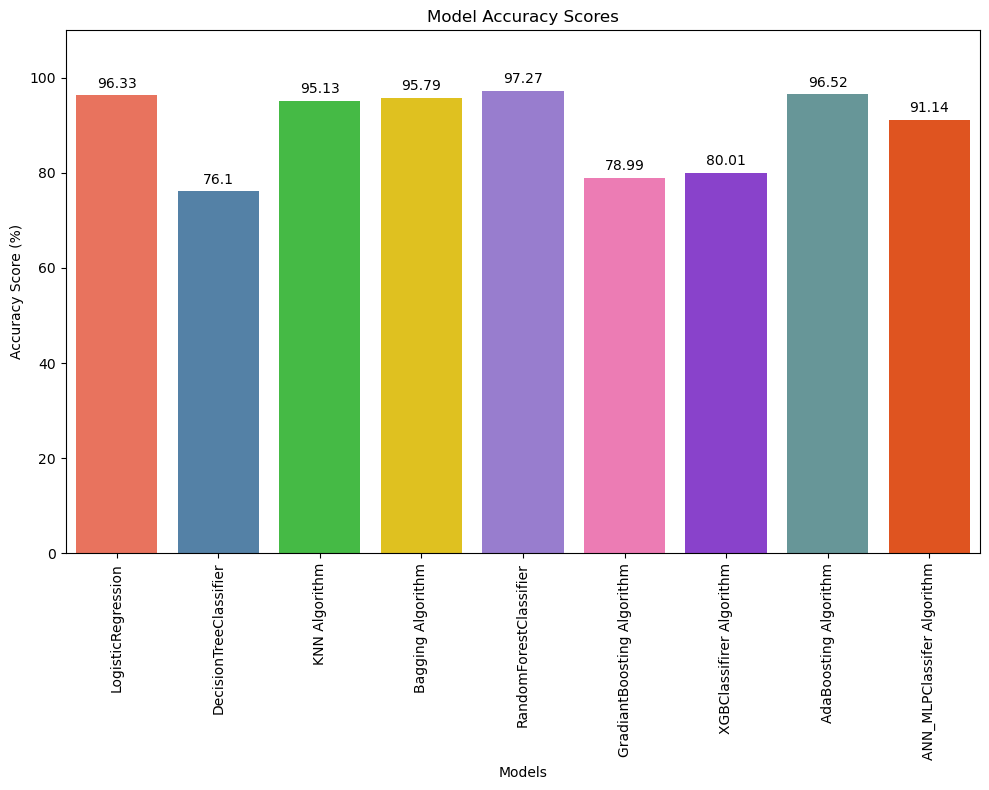

In [293]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score, palette=colors)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')
# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility
# Show the plot
plt.tight_layout()
plt.show()

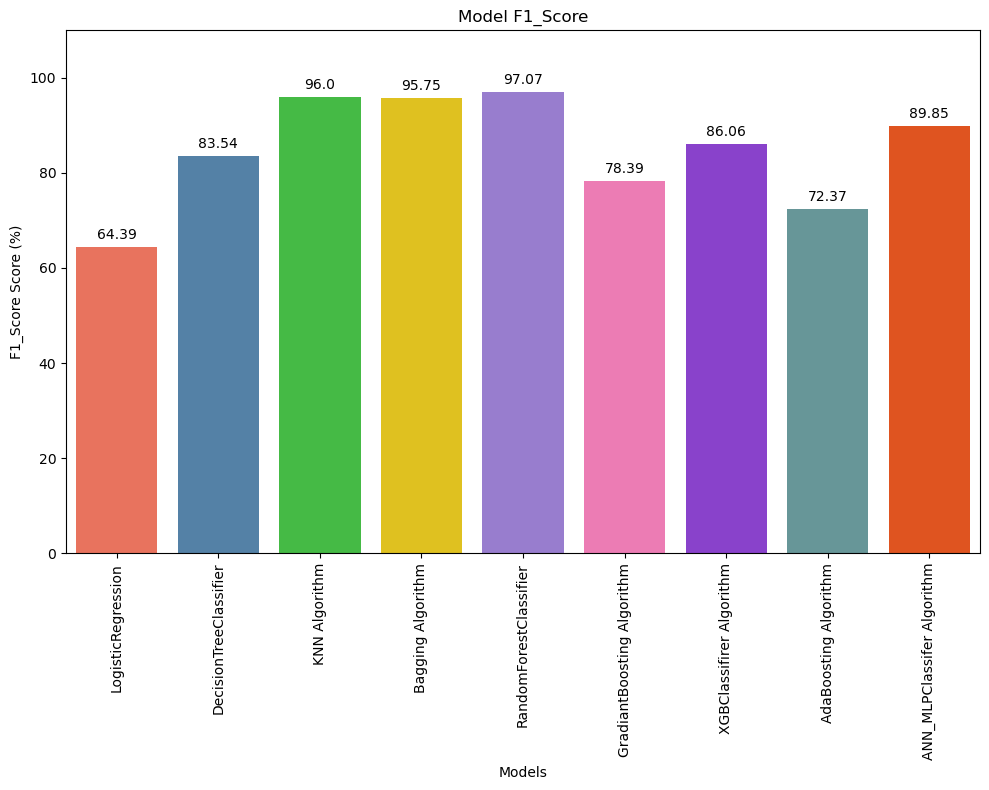

In [294]:
# Plotting the F1_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='F1_Score', data=score, palette=colors)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')
# Adding titles and labels
plt.title('Model F1_Score')
plt.xlabel('Models')
plt.ylabel('F1_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility
# Show the plot
plt.tight_layout()
plt.show()

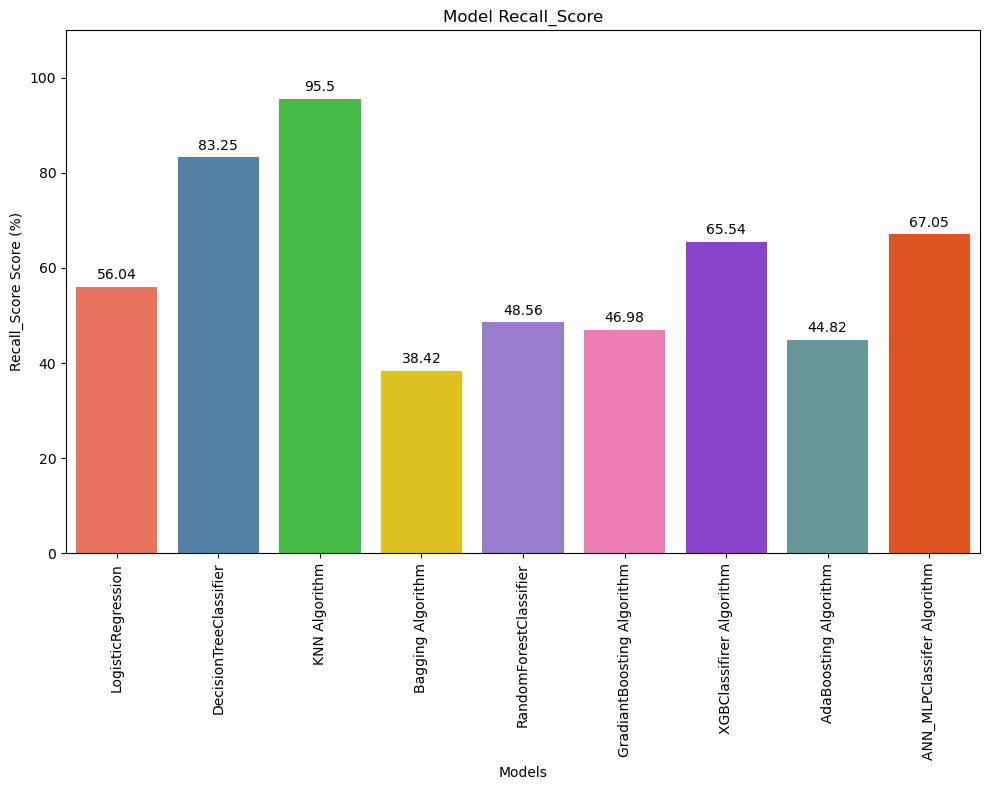

In [295]:
# Plotting the Recall_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Recall_Score', data=score, palette=colors)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')
# Adding titles and labels
plt.title('Model Recall_Score')
plt.xlabel('Models')
plt.ylabel('Recall_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility
# Show the plot
plt.tight_layout()
plt.show()

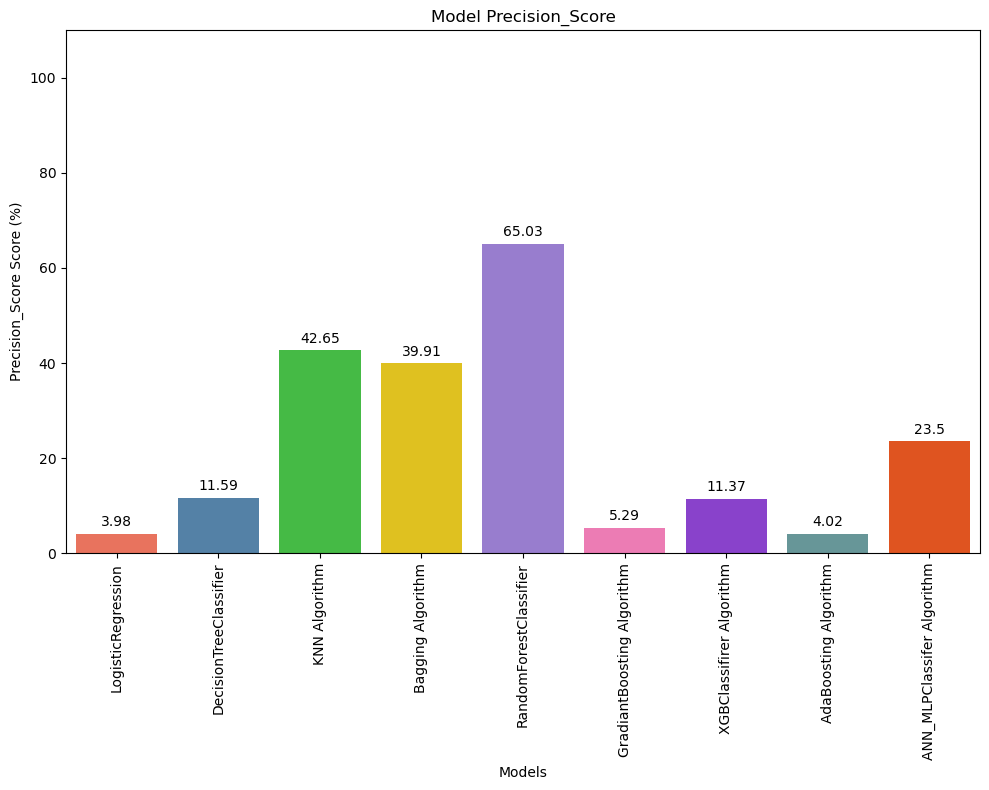

In [296]:
# Plotting the Precision_Score
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Precision_Score', data=score, palette=colors)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')
# Adding titles and labels
plt.title('Model Precision_Score')
plt.xlabel('Models')
plt.ylabel('Precision_Score Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility
# Show the plot
plt.tight_layout()
plt.show()

## Cross Validation
* Cross-validation is a model evaluation technique used to assess the performance and generalization ability of a machine learning model. It involves splitting the data into multiple subsets (folds), training the model on some folds while testing it on the remaining fold, and repeating this process several times. The final performance is averaged over all the folds, providing a more reliable estimate of how the model will perform on unseen data.

In [297]:
from sklearn.model_selection import cross_val_score # import the cross validation score model
score = cross_val_score(RM,x1,y1,scoring="accuracy",cv=5) # call the cross model report 
score

array([0.964425  , 0.96287137, 0.964425  , 0.96179334, 0.96442387])

* Average of Cross Validation Score is **0.9632** of Radom Forest Algorithm.

# Conclusion:

* **Logistic Regression:** This model performs similarly on both training and testing sets, indicating stability but struggles with distinguishing between positive and negative cases effectively. Its low precision suggests it may misclassify many negative cases as positives.

* **Decision Tree Classifier:** This model achieves high accuracy on the training data, but a slight drop in testing accuracy signals possible overfitting. It identifies positive cases well, though its precision isn’t ideal, meaning it could misclassify some negatives as positives.

* **K-Nearest Neighbors (KNN):** With strong accuracy in both training and testing, KNN effectively detects positive cases but has a lower precision, meaning it’s more suited when higher recall is desired, though some negative cases may be misclassified.

* **Bagging Algorithm:** Bagging shows consistently high accuracy in both sets. Its high precision and recall make it effective for identifying positives, though it could miss some cases, suggesting slight overfitting.

* **Random Forest Classifier:** This model is exceptionally balanced, achieving both high training and testing accuracy with strong precision and recall. Its reliability in identifying both positive and negative cases without overfitting makes it highly dependable.

* **Gradient Boosting Algorithm:** This model maintains consistent training and testing performance but has low precision and recall, indicating it may not be ideal for identifying positive cases.

* **XGBoost Classifier:** With high and balanced accuracy across training and testing, XGBoost demonstrates reliable precision and recall, making it well-suited for consistent positive and negative case identification.

* **AdaBoosting Algorithm:** This model’s moderate accuracy, along with lower precision and recall, suggests it may have limited effectiveness in distinguishing between cases accurately.

* **ANN MLP Classifier:** The MLP model provides stable and high accuracy across training and testing, with balanced precision and recall, making it a dependable option with minimal overfitting.
  
### Final Recommendation:

**The Random Forest Classifier is the top performer, with consistently high accuracy and a strong balance of precision and recall, making it the most reliable for general use. For applications where high recall is essential, KNN offers a good alternative, while ANN MLP Classifier provides balanced performance with low risk of overfitting.**

# Report on Challenges faced

* **Huge amount of data:** this dataset contains 3 tables after merging important tables rows goes to 1.9 lakhs and         columns goes to 105 which are huge because of this we faced more problem while doing work it was take more time for run     any cells.
  
* **Handling Missing Data:** Dealing with missing values across various features is critical to ensure that the dataset remains reliable and consistent, as gaps in data can undermine model accuracy
  
* **Selecting Relevant Features:** With numerous potential predictors, identifying the most informative features can be complex and essential for efficient model training. Removing irrelevant or redundant features without losing valuable information is a key step.
  
* **Addressing Class Imbalance:** In credit scoring, there’s often an imbalance between positive and negative classes. Without addressing this, the model could become biased toward predicting the majority class, leading to reduced accuracy for minority cases.
  
* **Multicollinearity:** Highly correlated features can complicate the model’s interpretability and reduce its effectiveness. Addressing these relationships is important to ensure the model remains stable and interpretable.
  
* **No EDA:** we can't do EDA in this dataset because 80% columns names are hide for security purposes and it's difficult   to get insights from data.because of this we got problem while doing EDA.


## Model Save

In [298]:
import pickle # use for save the model
with open("Credit_Card.pkl","wb") as f: # define the file save
    pickle.dump(RM,f) # call the rm model

In [299]:
with open("Credit_Card.pkl","rb") as f: # load the model file
    file = pickle.load(f) # call the file

In [300]:
x_train.tail() # show last 5 rows

Principle_components 1  Principle_components 2  \
70209                -0.153215               -0.824422   
91261                -0.133827               -0.824637   
5014                  0.122196                0.777764   
153656                0.049202                1.196676   
86364                -0.131942               -0.831465   

        Principle_components 3  Principle_components 4  \
70209                -0.174833               -0.439228   
91261                -0.374414               -0.242581   
5014                  0.147544               -0.051816   
153656               -0.896774               -0.601675   
86364                 2.618316                2.019925   

        Principle_components 5  Principle_components 6  \
70209                -0.723485                0.742260   
91261                -0.026743               -1.513711   
5014                  2.112735                0.528961   
153656                1.312601                0.429539   
86364                -0.049856               -1.244425   

        Principle_components 7  Principle_components 8  \
70209                 0.242878               -0.568119   
91261                 0.194291                0.457456   
5014                 -0.797858               -0.172982   
153656                2.875738                2.434007   
86364                 0.514732               -0.291890   

        Principle_components 9  Principle_components 10  \
70209                -0.080883                -0.046997   
91261                 0.704524                -0.667697   
5014                 -0.032172                 0.434725   
153656               -1.006894                 0.078049   
86364                 0.253858                -0.869625   

        Principle_components 11  Principle_components 12  \
70209                  0.368980                -0.409736   
91261                  0.373145                -0.310662   
5014                   0.816222                 1.162964   
153656                 0.337491                -1.102472   
86364                  0.595240                -0.879886   

        Principle_components 13  Principle_components 14  \
70209                  1.137130                 0.775748   
91261                 -0.889951                -1.000231   
5014                   0.488814                -1.785134   
153656                 0.847605                 0.674399   
86364                 -1.780929                -1.728997   

        Principle_components 15  Principle_components 16  \
70209                 -0.085651                 0.028127   
91261                 -0.140962                -0.198216   
5014                   0.654068                -0.595809   
153656                -1.865941                 1.262814   
86364                 -0.326817                -0.015400   

        Principle_components 17  Principle_components 18  \
70209                  0.382708                 0.473659   
91261                 -0.540888                 0.162890   
5014                  -1.214805                 1.007922   
153656                -0.761536                -1.636194   
86364                  1.090102                 0.341985   

        Principle_components 19  Principle_components 20  \
70209                  1.114199                -0.432290   
91261                  0.780214                -0.660039   
5014                  -0.081944                 0.659080   
153656                 0.921298                -0.498055   
86364                  0.258314                 1.821833   

        Principle_components 21  Principle_components 22  \
70209                  0.412601                 0.755937   
91261                 -0.115372                 0.077101   
5014                   0.849649                -0.008755   
153656                -0.043974                 0.440213   
86364                  0.890483                -0.127472   

        Principle_components 23  Principle_components 24  \
70209                 -0.881214

In [301]:
y_train.tail(5) # show last 5 rows

70209     0
91261     0
5014      0
153656    0
86364     0
Name: Bad_label, dtype: int32

In [302]:
# predict the data
file.predict([[0.400000	,0.000083,	0.317568,	1.0,	0.044371,	0.666667,	1.0,	0.630854,	0.023033,	0.0,	0.555556,	0.639344,	0.823529,	0.75,	1.000,	0.1,	0.178206,	0.997022,	0.083333,	0.636364,	0.623188,	0.0,	0.575758,	0.575758,	0.017566,	0.392605,	0.575758,	0.944444,	0.000000,	1.000000,	0.0,	0.0,	0.0	,0.0	,1.0,	0.0,	0.0]])

array(['0'], dtype=object)